#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Level</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [1]:
install.packages("Metrics")


Les packages binaires téléchargés sont dans
	/var/folders/hd/j35cgpld27n726tf6dxlhggm0000gn/T//RtmpcXOZco/downloaded_packages


In [2]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(MASS)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)
library(Metrics)
library(rpart)
library(rpart.plot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement du package : ‘reshape2’


L'objet sui

# Préparation de la Base

## Nature des variables

In [3]:

path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM Calories_Burned
1 56  Male   88.3        1.71       180     157     60          1313           
2 46  Female 74.9        1.53       179     151     66           883           
3 32  Female 68.1        1.66       167     122     54           677           
4 25  Male   53.2        1.70       190     164     56           532           
5 38  Male   46.1        1.79       188     158     68           556           
6 56  Female 58.0        1.68       168     156     74          1116           
  Workout_Type Fat_Percentage Experience_Level BMI   Workout_Frequency
1 Yoga         12.6           3                30.20 4                
2 HIIT         33.9           2                32.00 4                
3 Cardio       33.4           2                24.71 4                
4 Strength     28.8           1                18.41 3                
5 Strength     29.2           1                14.39 3                
6 HIIT         15.5           3                20.55 5                
  Session_Duration Water_Intake
1 1.69             3.5         
2 1.30             2.1         
3 1.11             2.3         
4 0.59             2.1         
5 0.64             2.8         
6 1.59             2.7

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. Pour traiter les données correctement nous avons passé les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

## Analyse unidimensionnelle des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


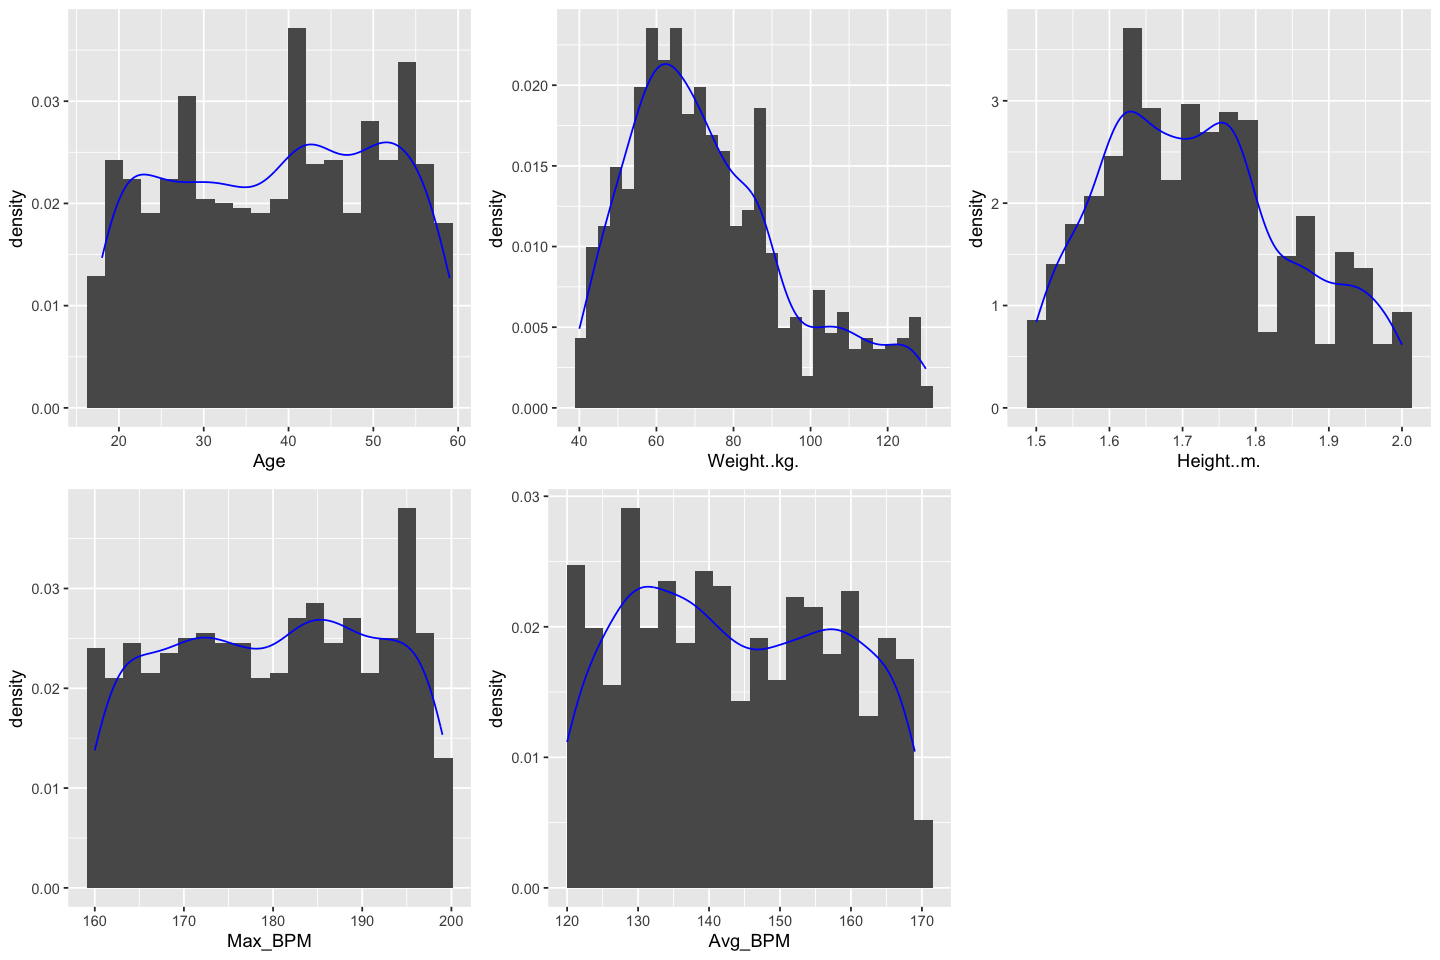

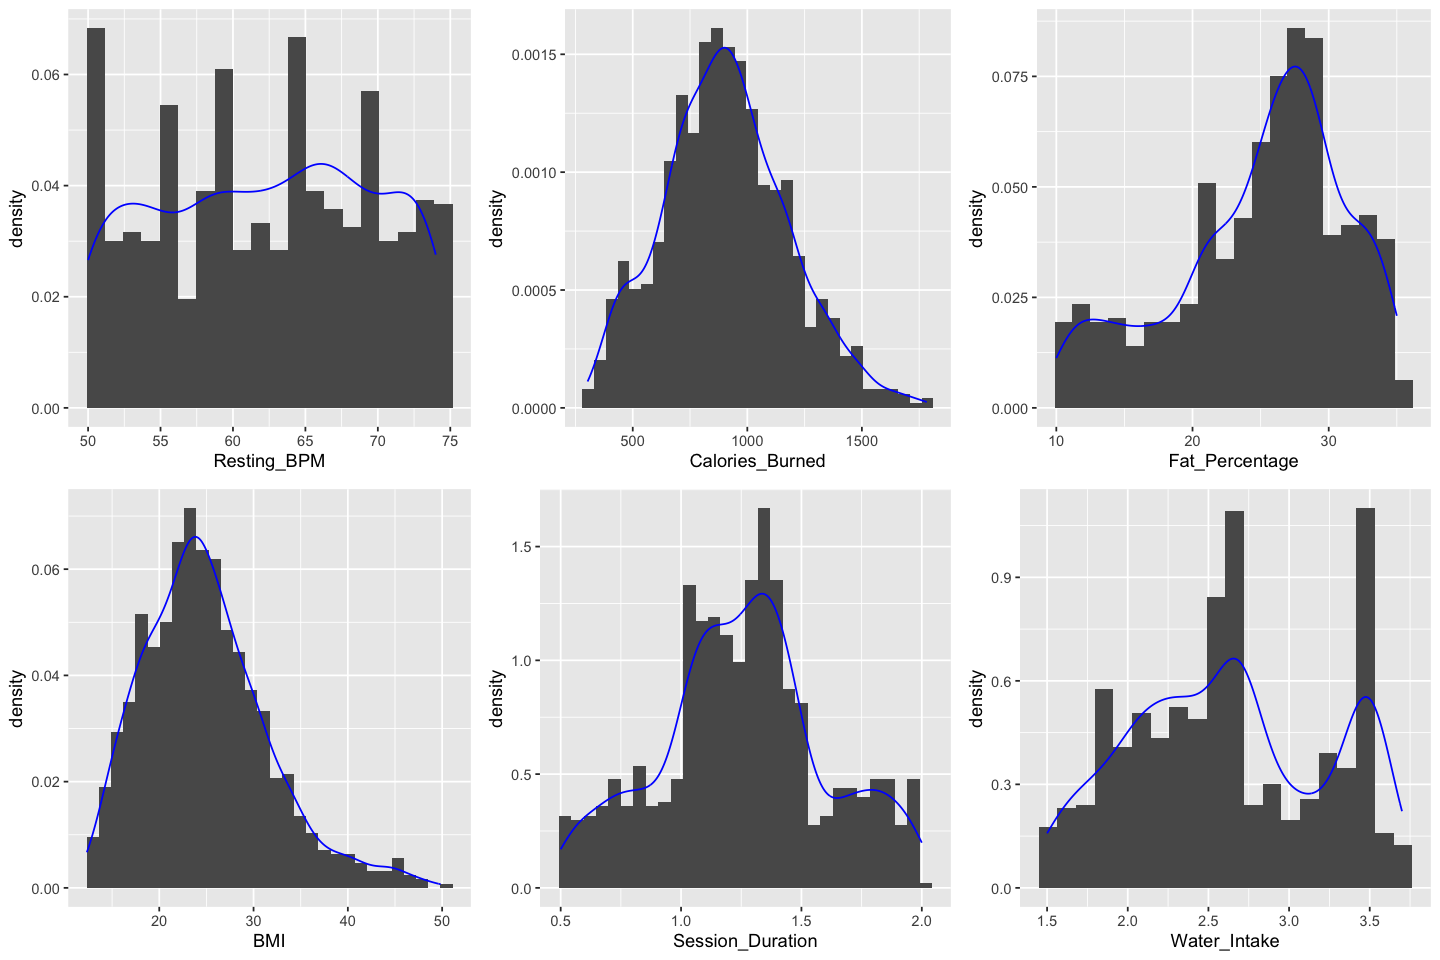

In [4]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

Ici, nous analysons la distribution des variables numériques du jeu de données Gym. Pour cela, nous avons généré des histogrammes avec superposition de courbes de densité . Ces visualisations permettent d’examiner la forme de chaque distribution (normalité, asymétrie, présence de modes, etc.) ainsi que d’identifier d’éventuelles anomalies ou valeurs extrêmes. Nous avons testé plusieurs types de transformations sur différentes variables 



liste des transformations possibles pour le pré-processing des données: \
Transformation logarithmique (si les données sont fortement asymétriques).

Transformation racine carrée (si les données ne sont pas aussi étendues).

Transformation Box-Cox (pour rechercher automatiquement la meilleure transformation).

Transformation de puissance inverse (si tu veux réduire l'impact des grandes valeurs).

Transformation quantile

Je vois pas de transformation très utile ici.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


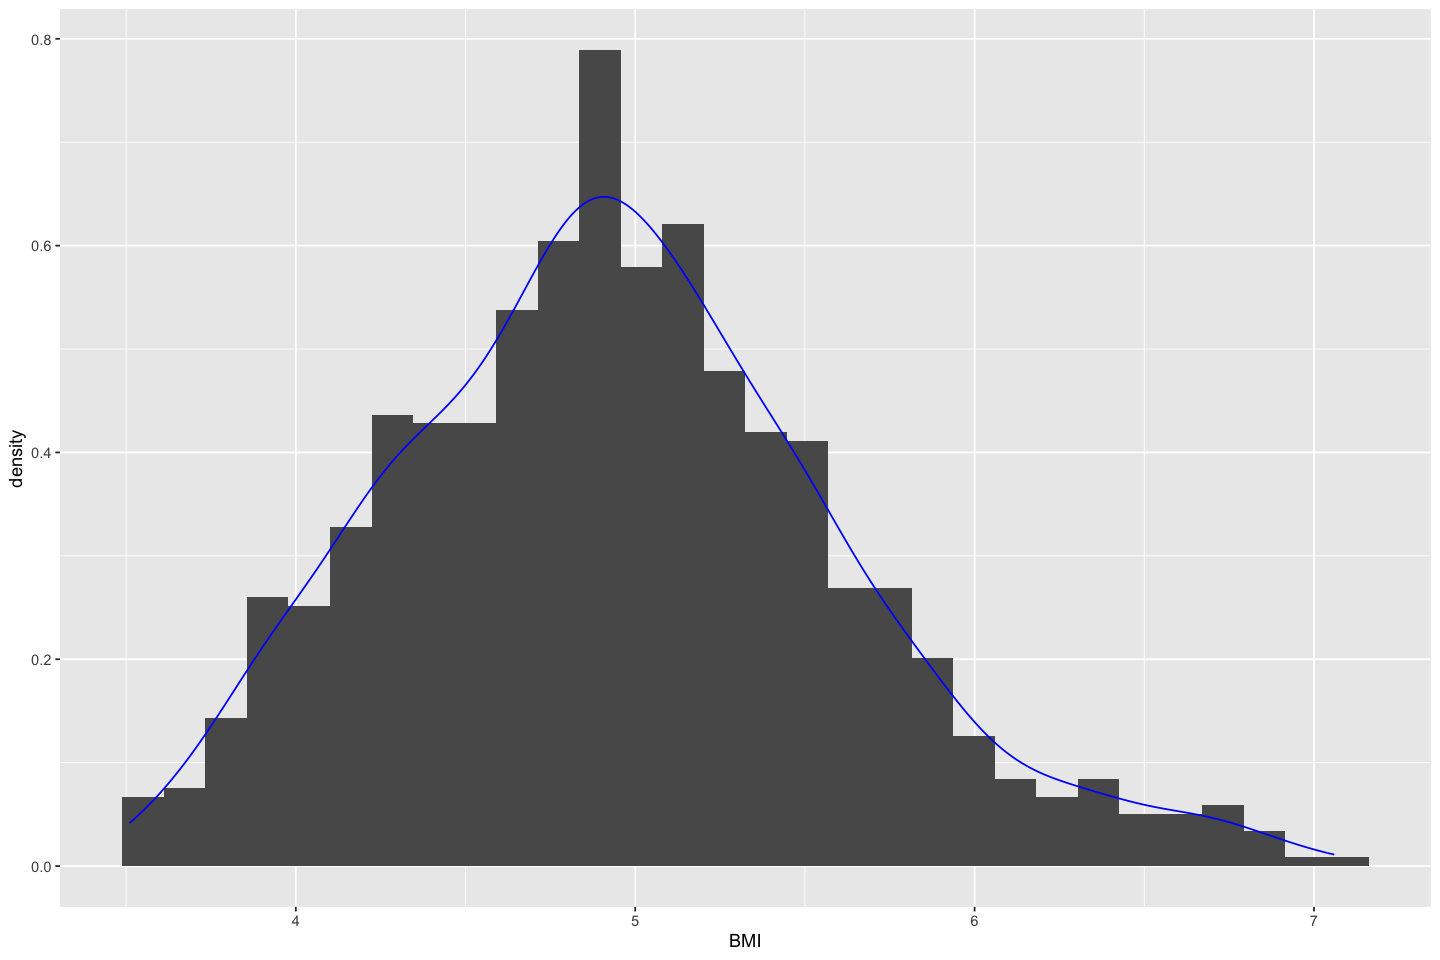

In [5]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément 

Pour mieux comprendre la composition de ce jeu de données nous allons représenter la distribution de toutes les modalités des variables qualitatives afin de mieux cerner de quels types d'individus est composée la base de données. 

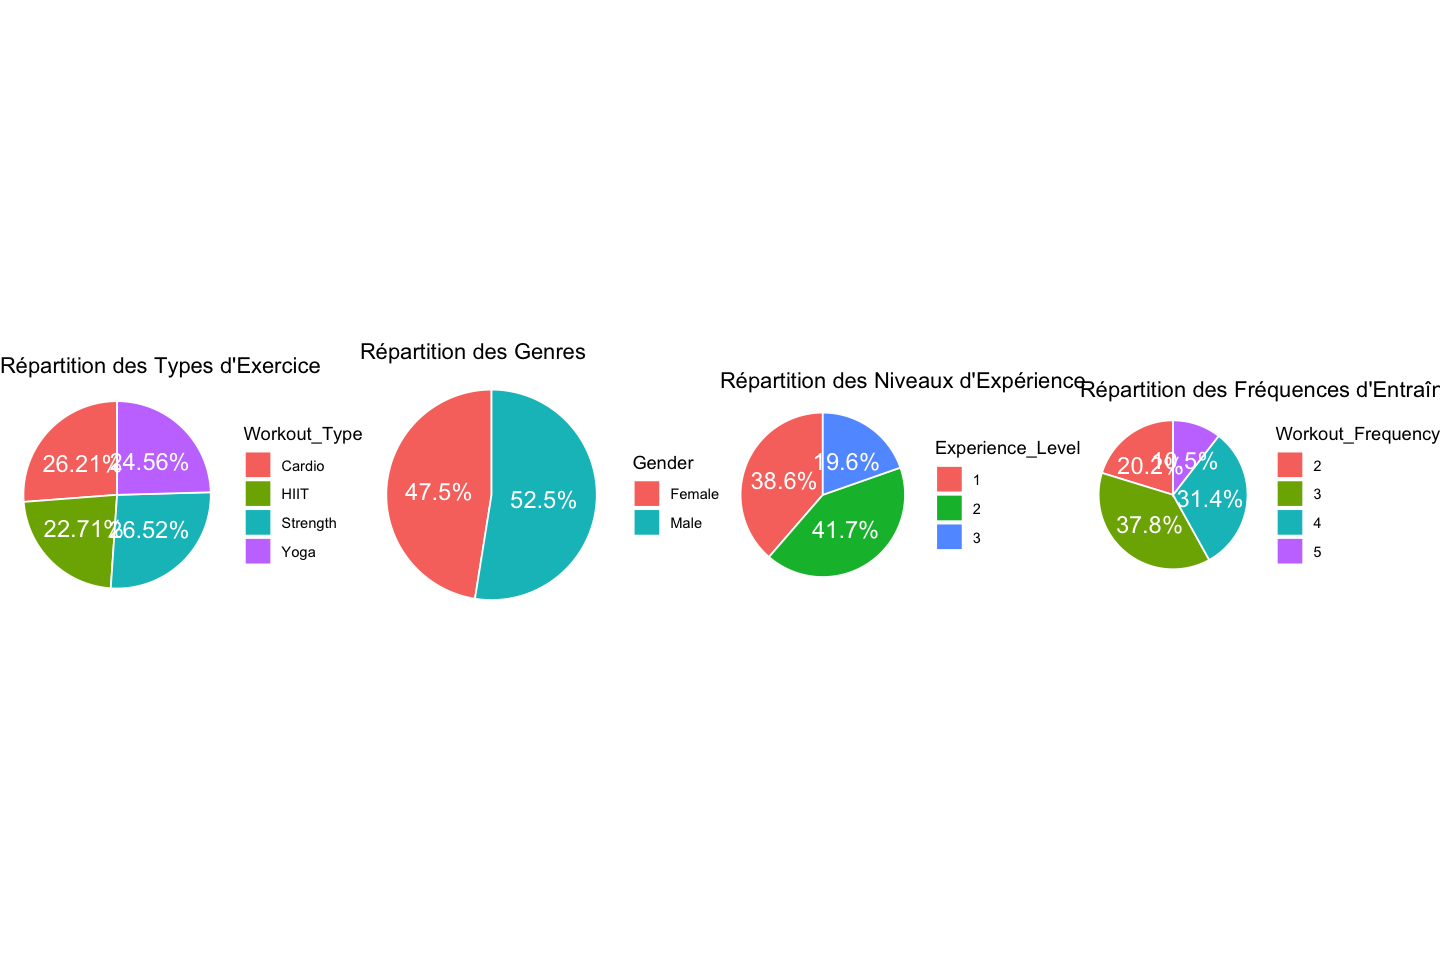

In [6]:
g1 <- ggplot(Gym, aes(x = "", fill = Workout_Type)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g2 <- ggplot(Gym, aes(x = "", fill = Gender)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Genres") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g3 <- ggplot(Gym, aes(x = "", fill = Experience_Level)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Niveaux d'Expérience") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g4 <- ggplot(Gym, aes(x = "", fill = Workout_Frequency)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Fréquences d'Entraînement") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

grid.arrange(g1,g2,g3,g4,ncol=4)

On remarque donc que les types d'entraînement et le genre sont des variables plutôt équilibrées, chaque moalités est représentées de façon assez équivalente. Pour les autres variables qualitatives on remarque que les individus plus expérimentés et dont la durée d'entrapinement est plus longue sont bien moins nombreux que les autres. 

## Analyse bidimensionnelle des variables
#### Corrélation

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

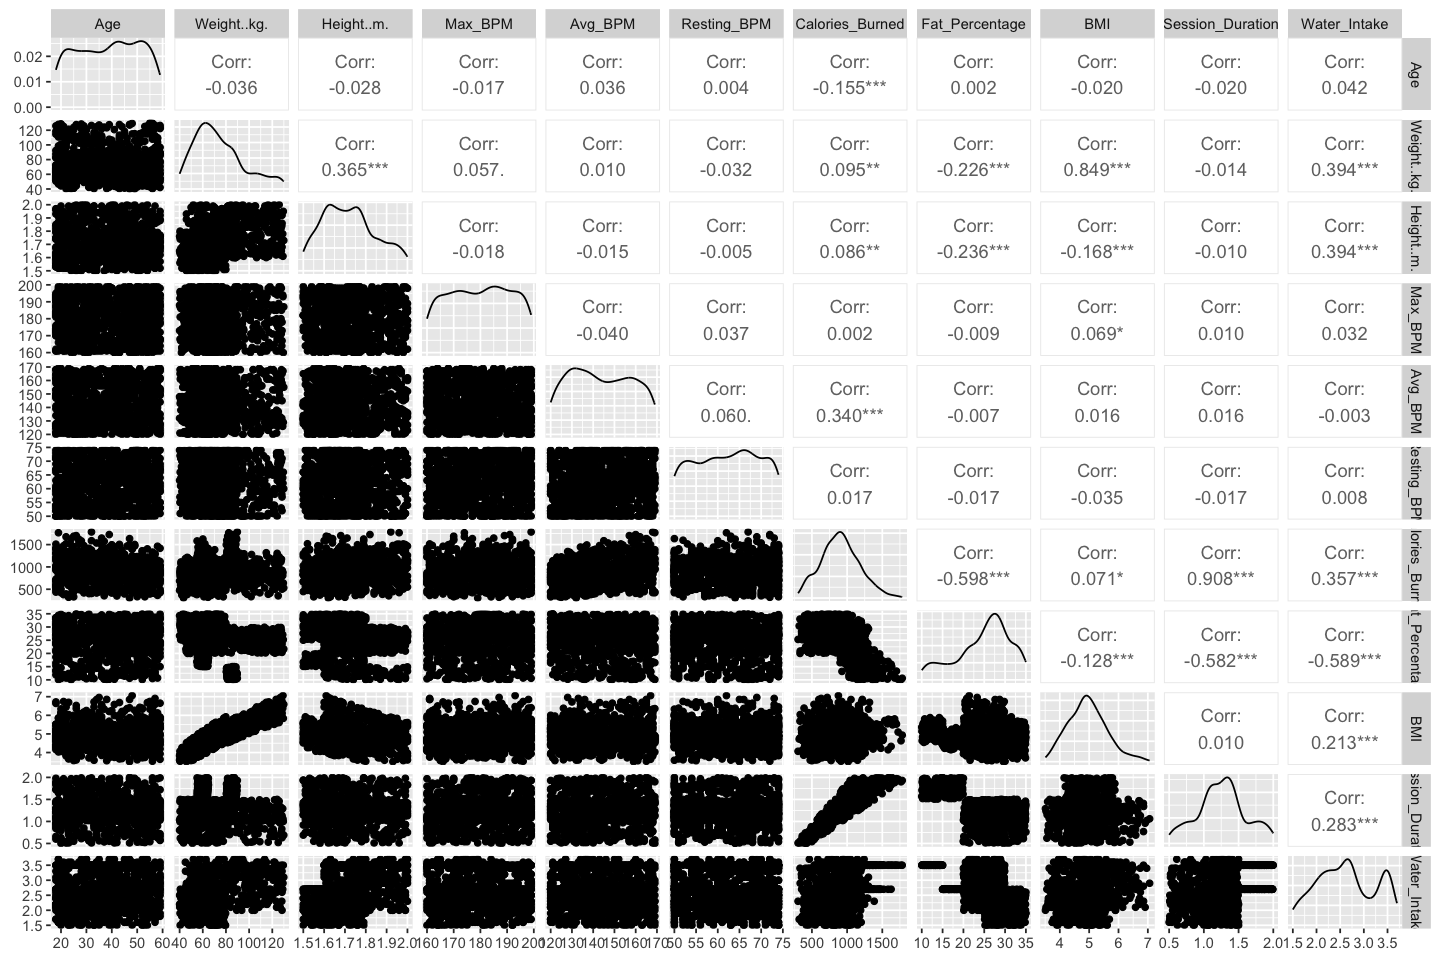

In [7]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 

A faire: Trouver la commande qui détermine l'indice des individus chelous dans fat percentage/ Water intake
Voir globalement si on peut analyser plus les pics de water intake?

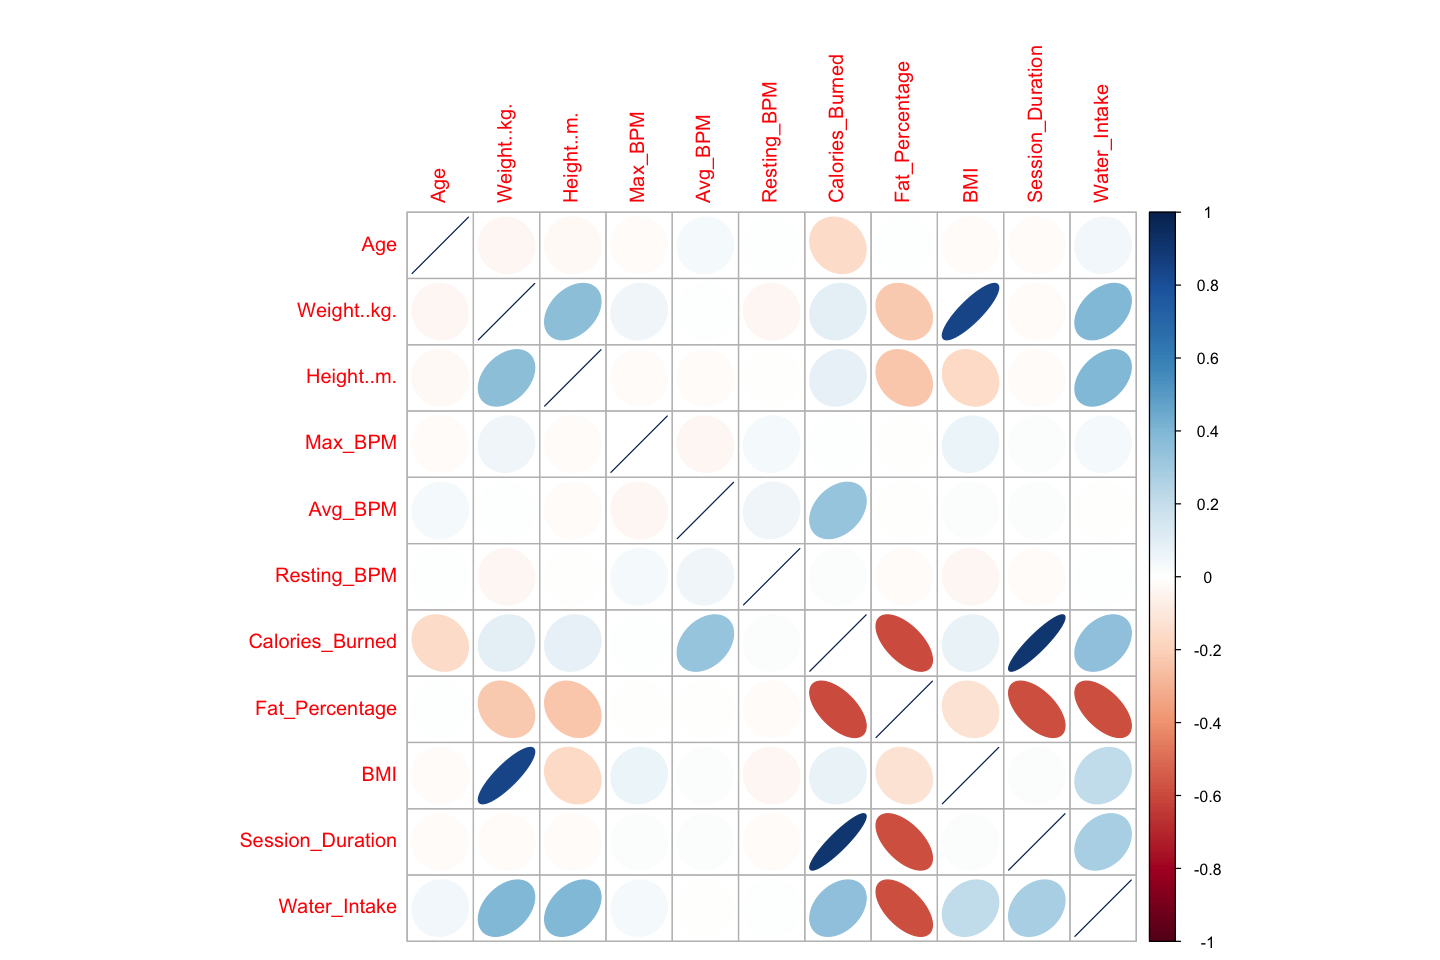

In [8]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

#### Quali/Quanti

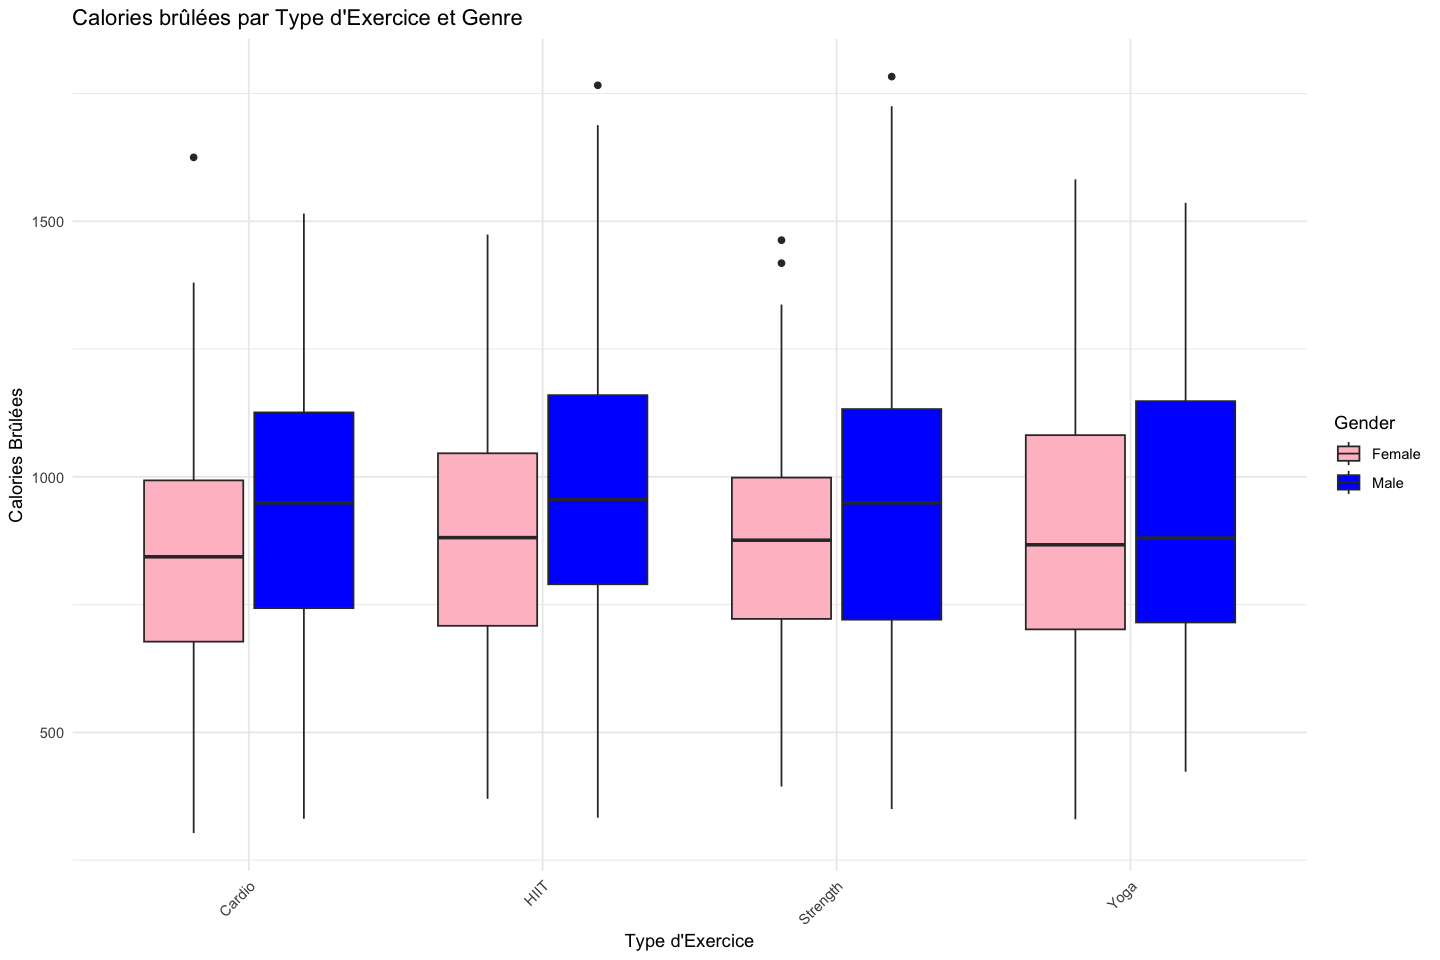

In [9]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Pour un même type d'entraînement, on remarque que les hommes dépensent en général plus de calories que les femmes. 

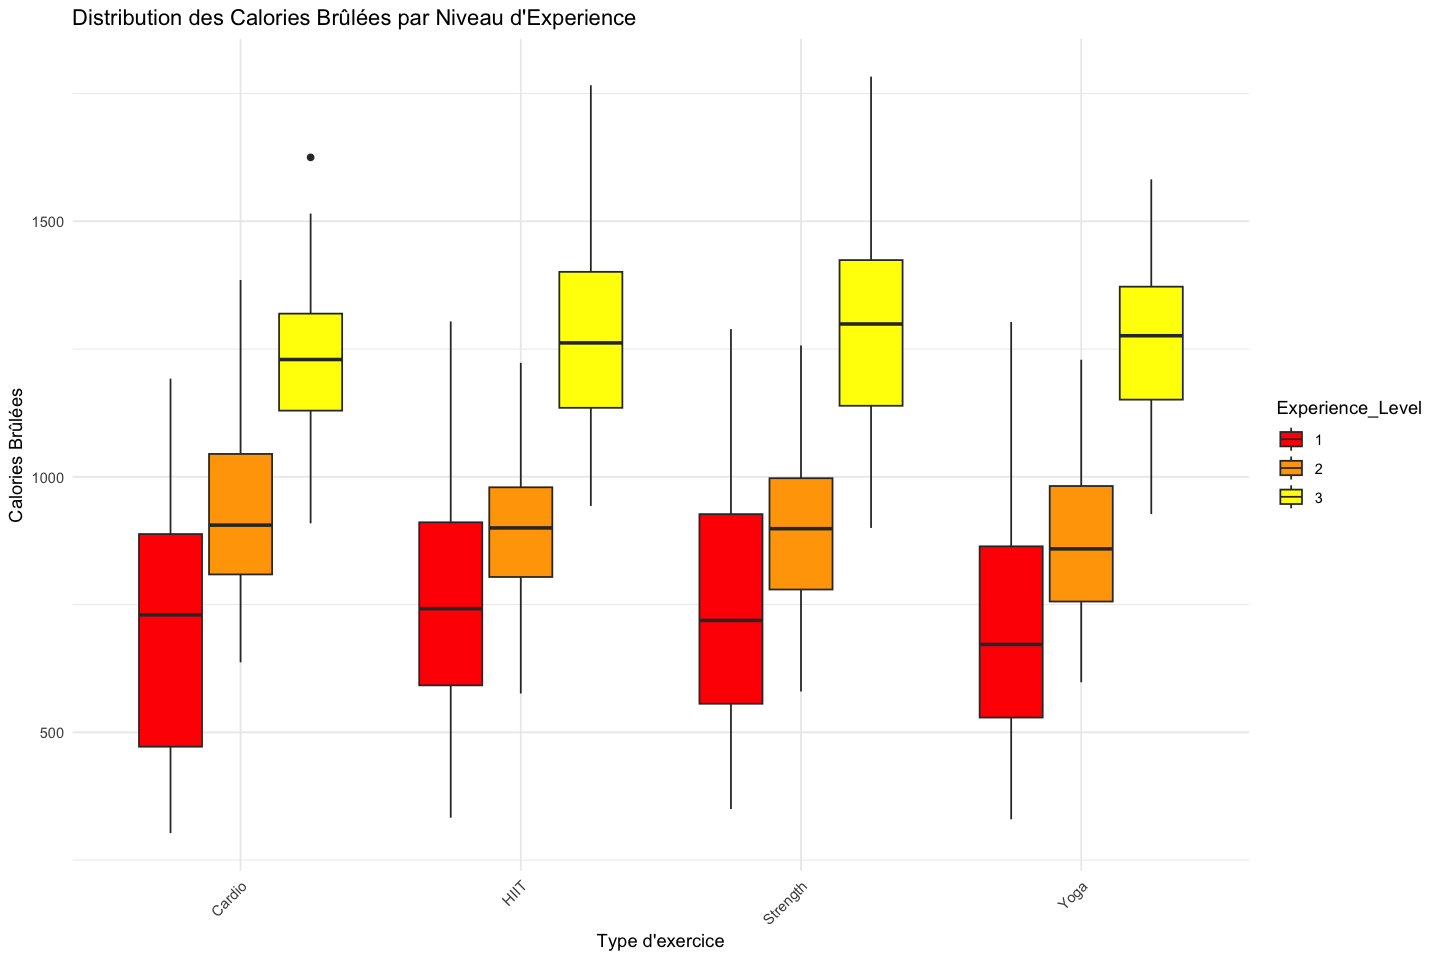

In [10]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Nous voyons de façon évidente qu'à un niveau d'experience plus élevée est souvent associées un plus grand nombre de calories brulées, cela est sûrement dû à l'intensité et à la durée d'exercice qui devrait augmenter avec l'expérience nous allons à présent le vérifier. 

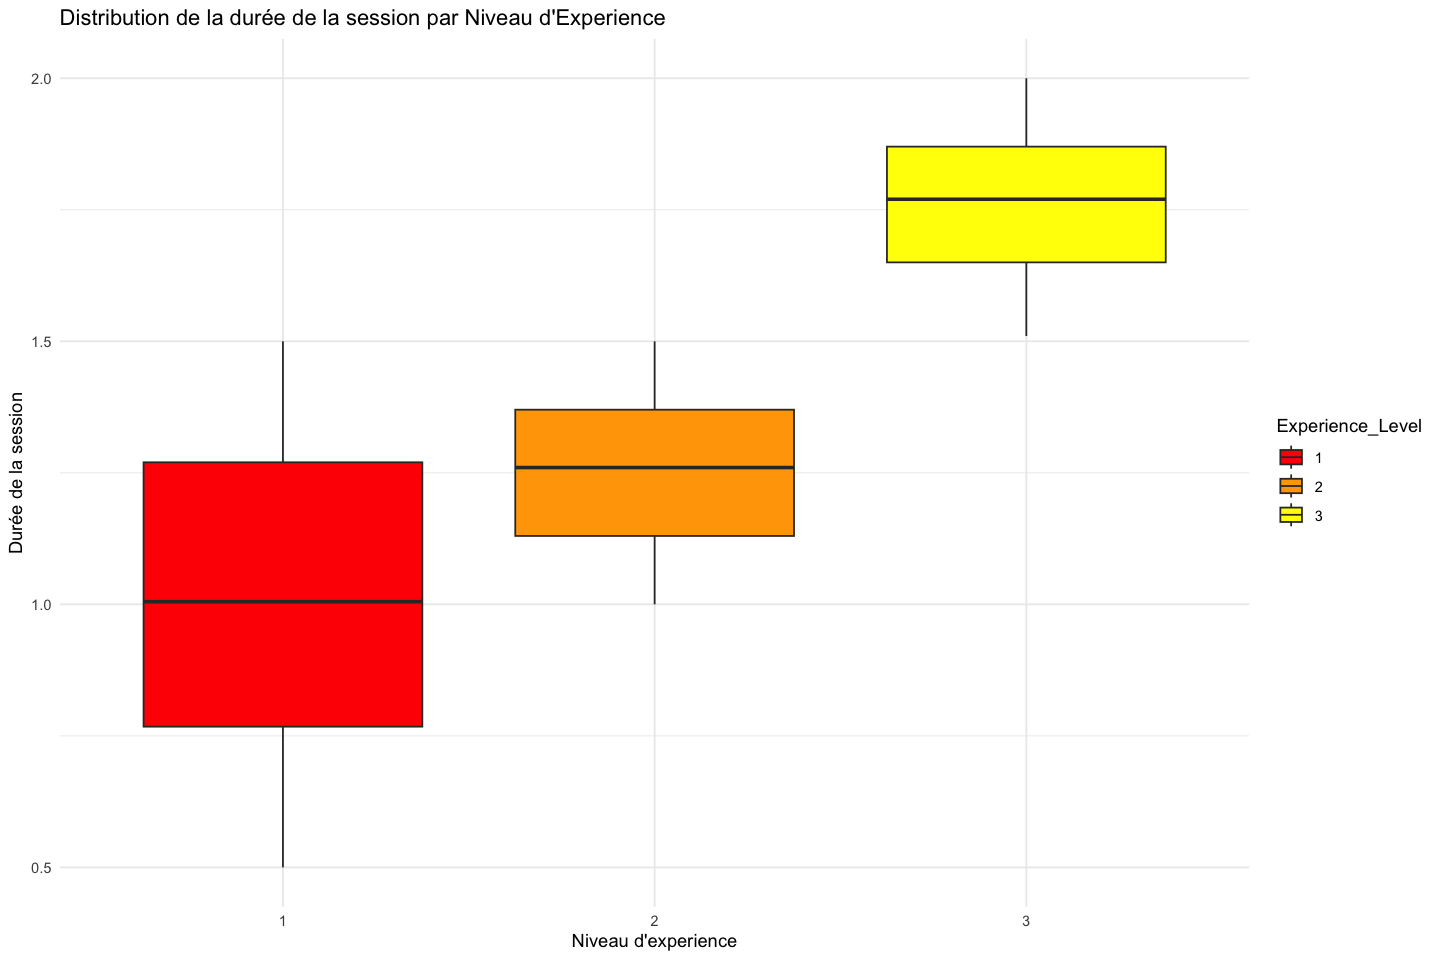

In [11]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

On comprend de façon logique que les individus avec le plus d'expérience font des séances plus longues, c'est une première explication de pourquoi les plus expérimentés dépenssent plus de calories.

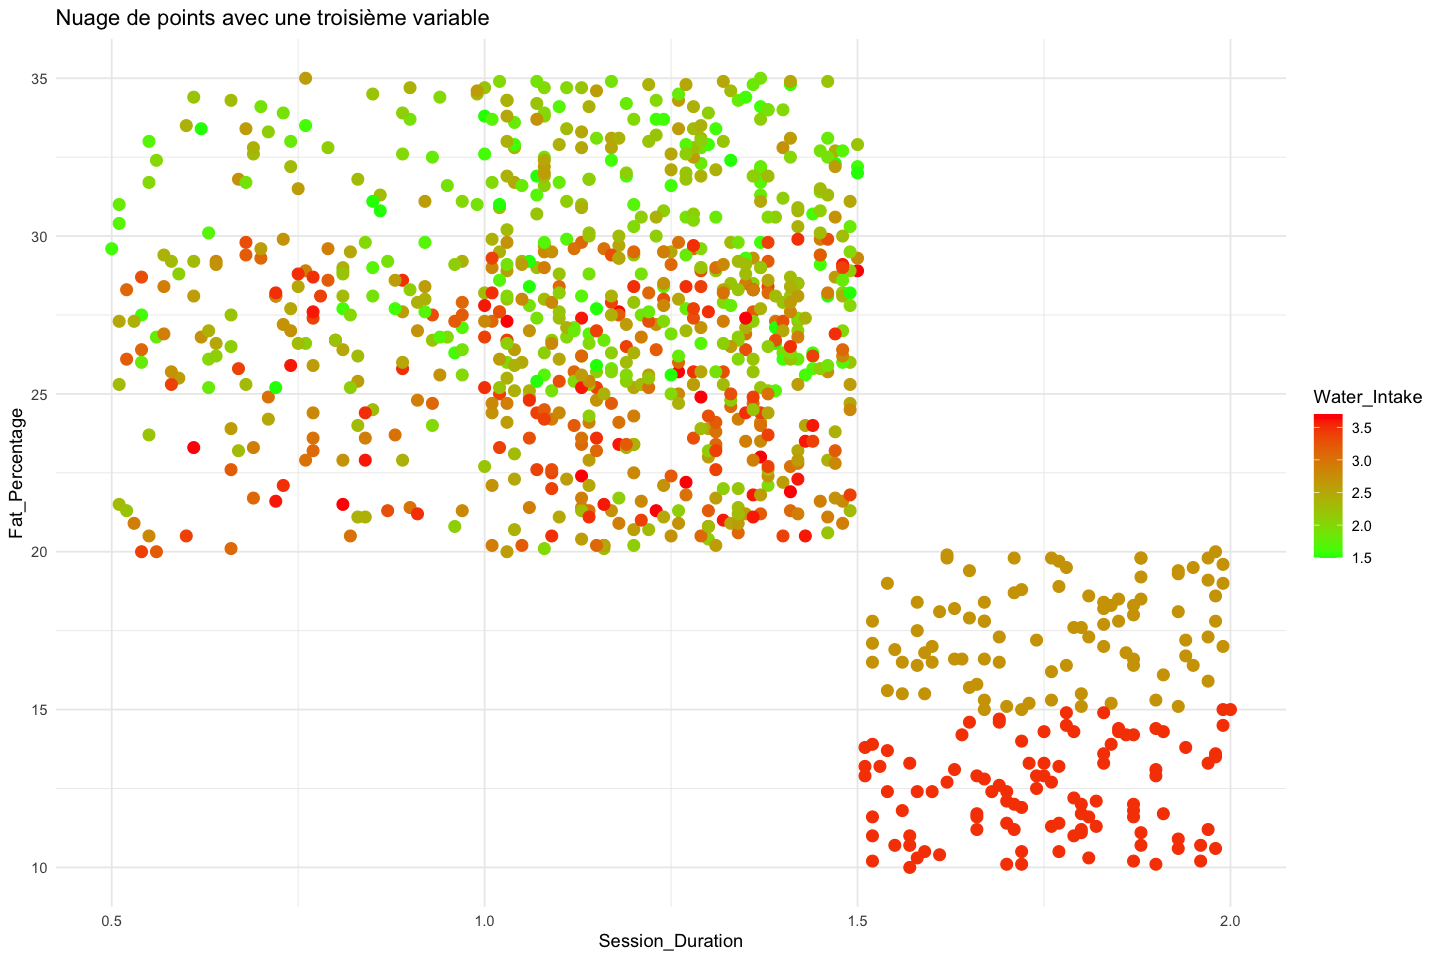

In [12]:
ggplot(Gym, aes(x=Session_Duration, y=Fat_Percentage, color=Water_Intake)) +
  geom_point(size=3) +  # Points colorés selon z
  scale_color_gradient(low="green", high="red") +  # Gradient de couleur
  labs(title="Nuage de points avec une troisième variable",
       x="Session_Duration", y="Fat_Percentage", color="Water_Intake") +
  theme_minimal()

Nous trouvons la présence d'un seuil assez étonnante mais cela peut-être lié à la manière dont les mesures ont été calculées. On a affiché les trois ensemble car elle présentent des corrélation négatives. Au vu de la répartion en seuil c'est encore une fois sûrement dû à la manières dont les données ont été collectées.

#### Quali/Quali

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


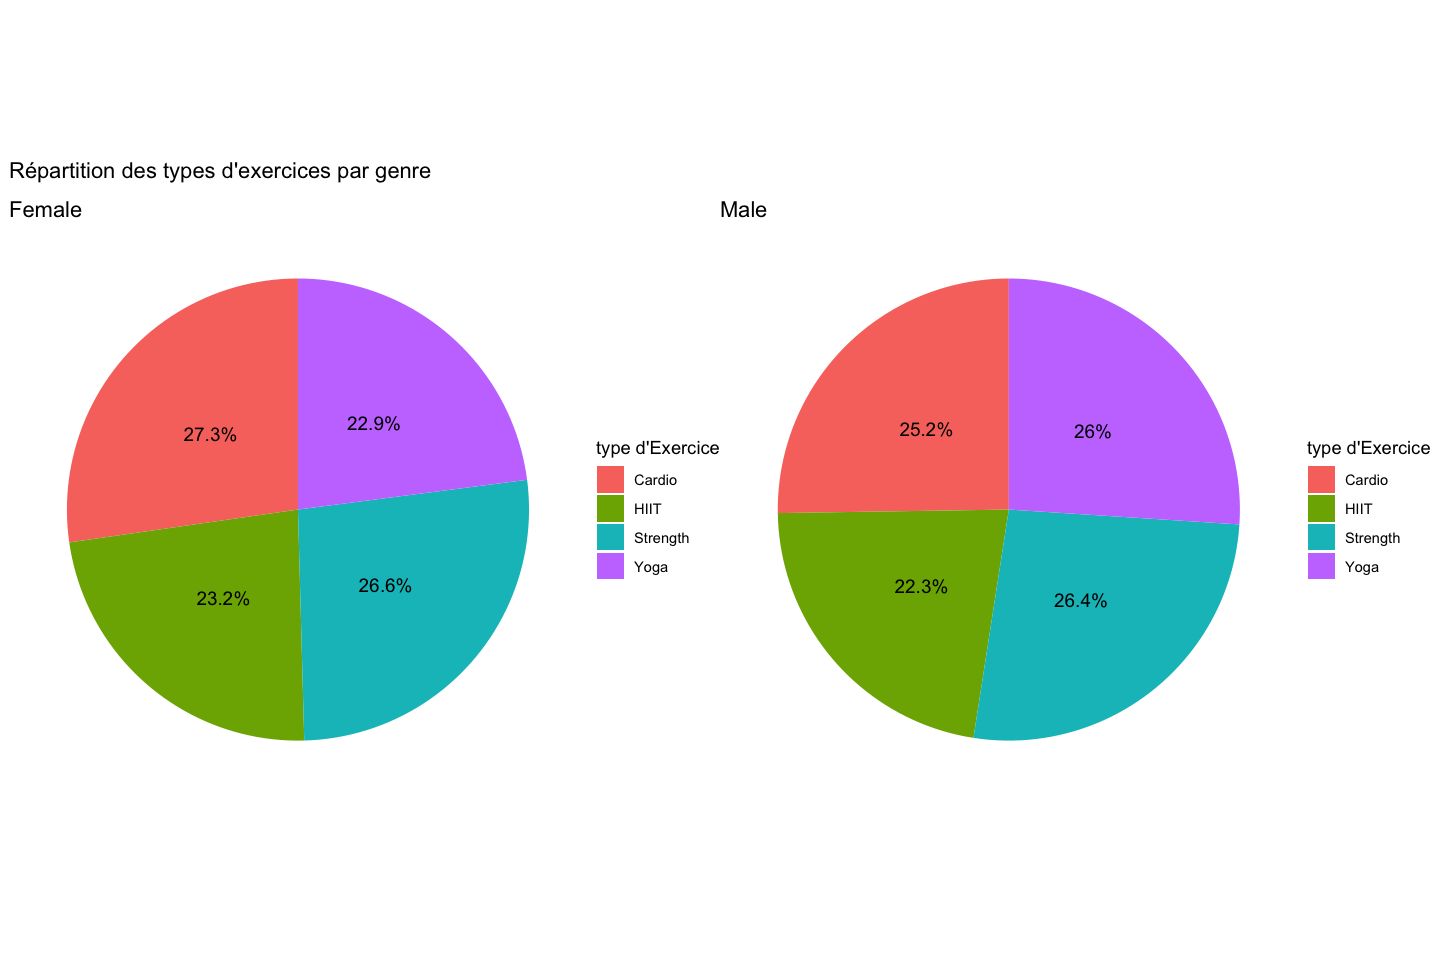

In [13]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


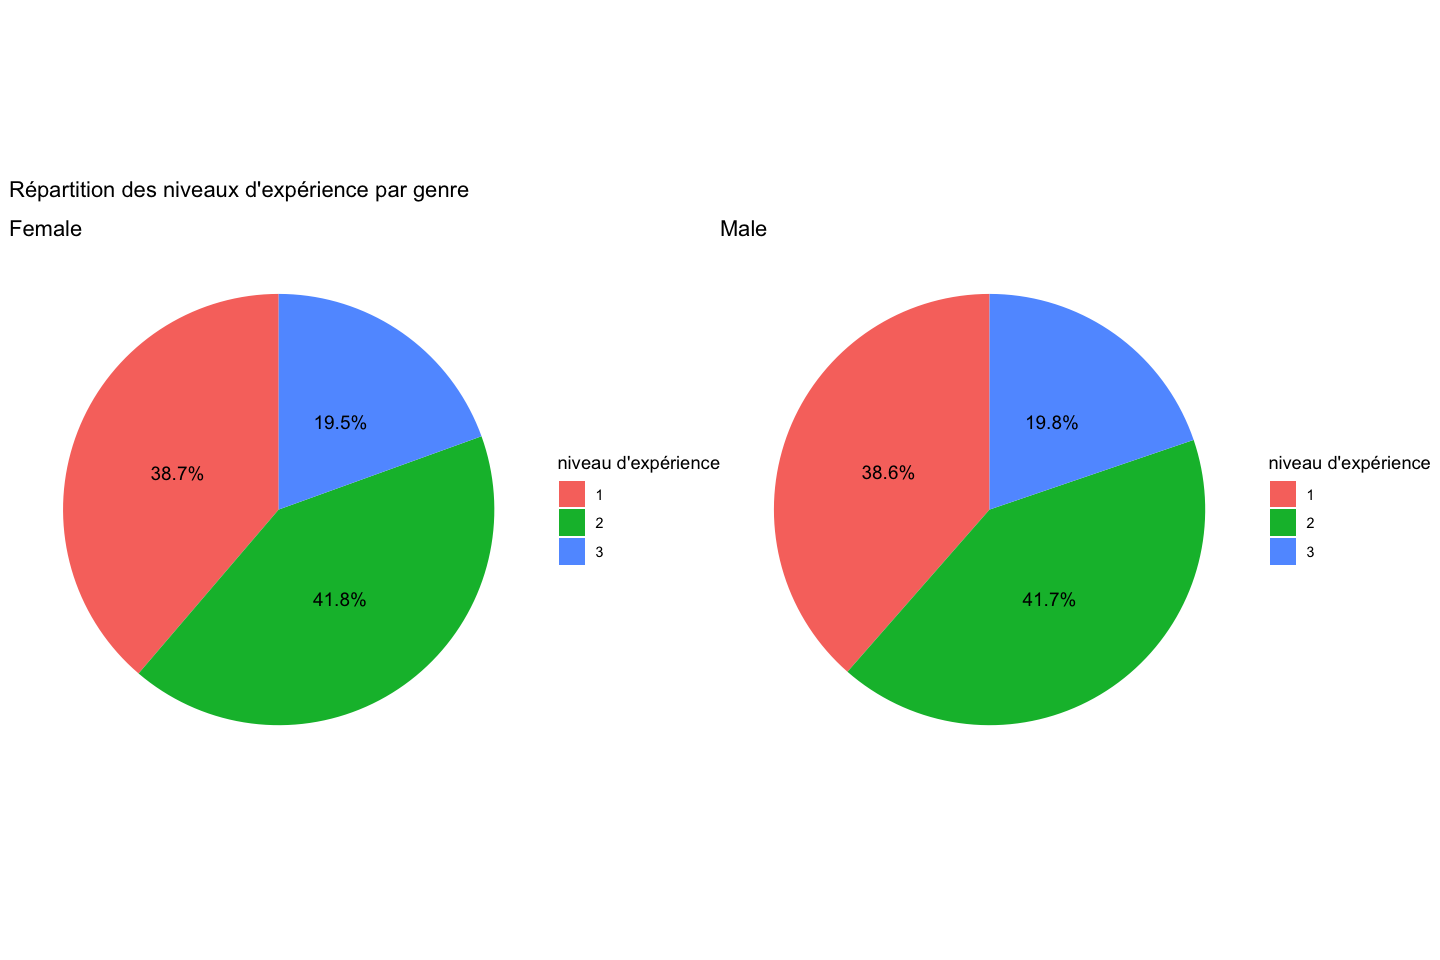

In [14]:
df_pie <- Gym %>%
  count(Gender, Experience_Level) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Experience_Level)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "niveau d'expérience") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des niveaux d'expérience par genre")

on voit que la répartition des niveaux d'expériences est similaire entre les hommes et les femmes. On ne peut donc pas expliquer la différence de calories brulées par une différence de niveau.

## Analyse en Composante Principale 

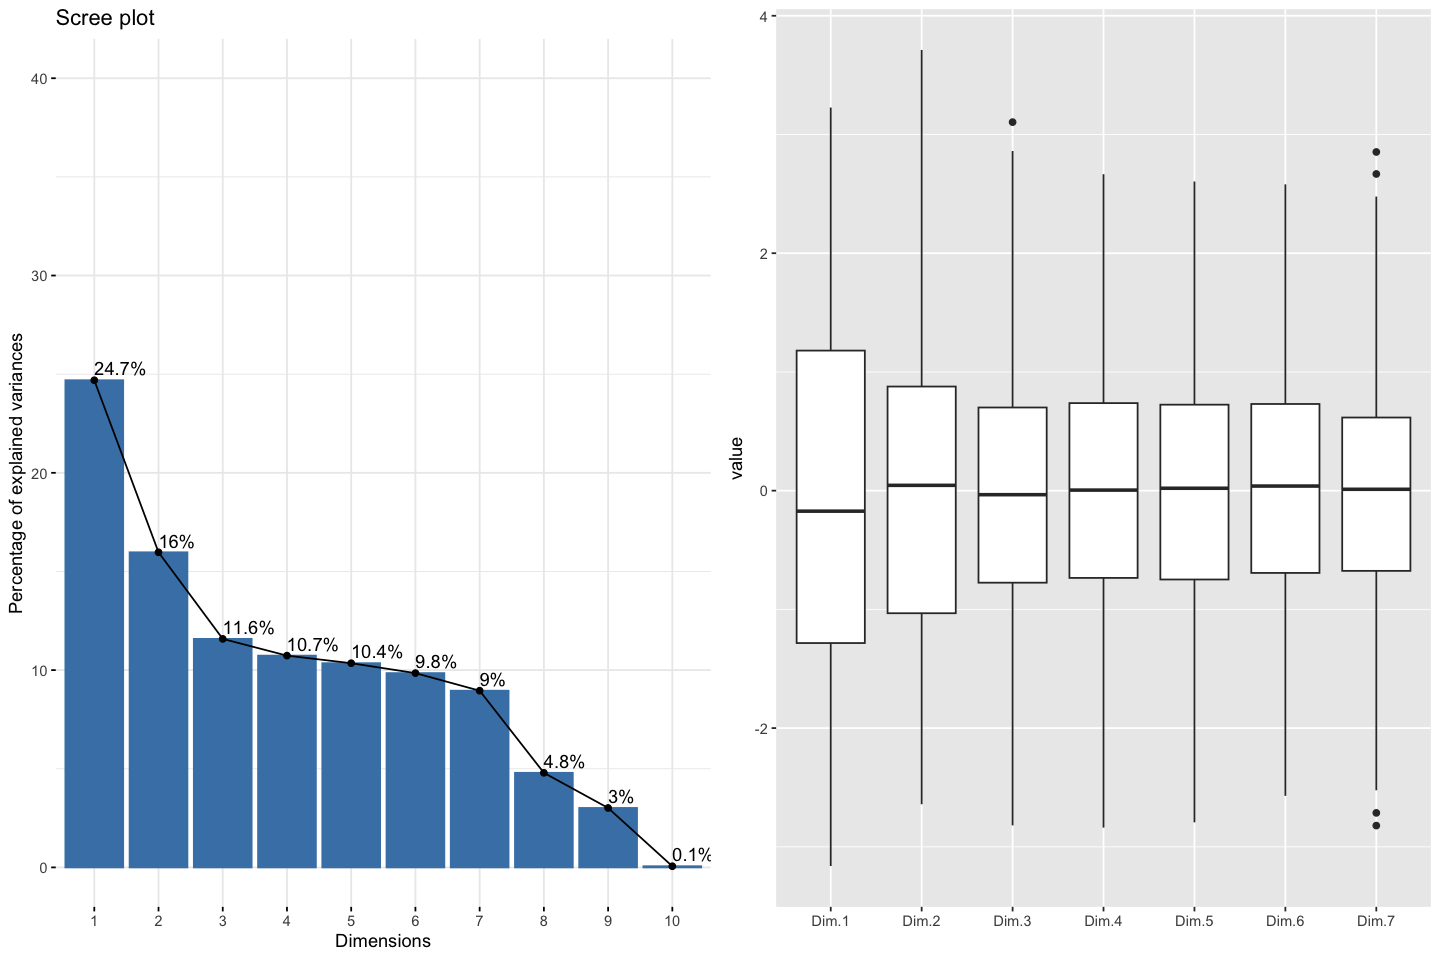

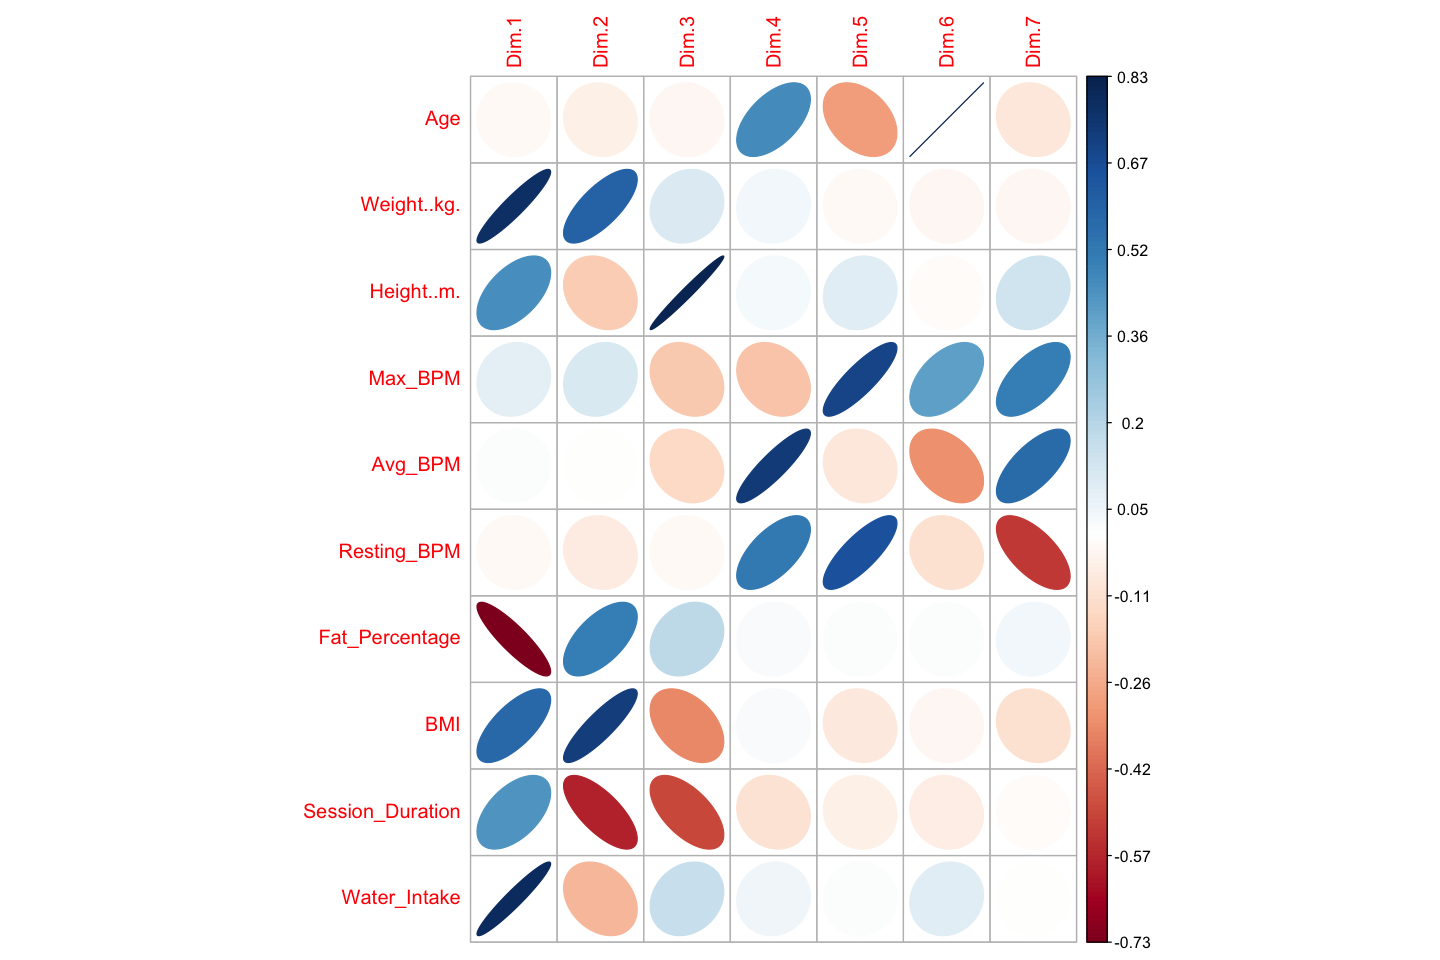

In [15]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 7)

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

Par ces graphiques on veut évaluer la pertinence d'une Analyse en composantes principales. On voit ici que pour avoir une variance cumulée supérieure à 80% il nous faudrait 6 dimensions. Ne pouvant pas faire de représentation en 6 dimensions il va être compliqué de faire une ACP très pertinente. Pour commencer une analyse nous avons décider de présenter des graphiques sur les 3 premières dimensions mais il faut prendre en compte que les représentations ne représenteront que peu d'information. 

In [16]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 6)

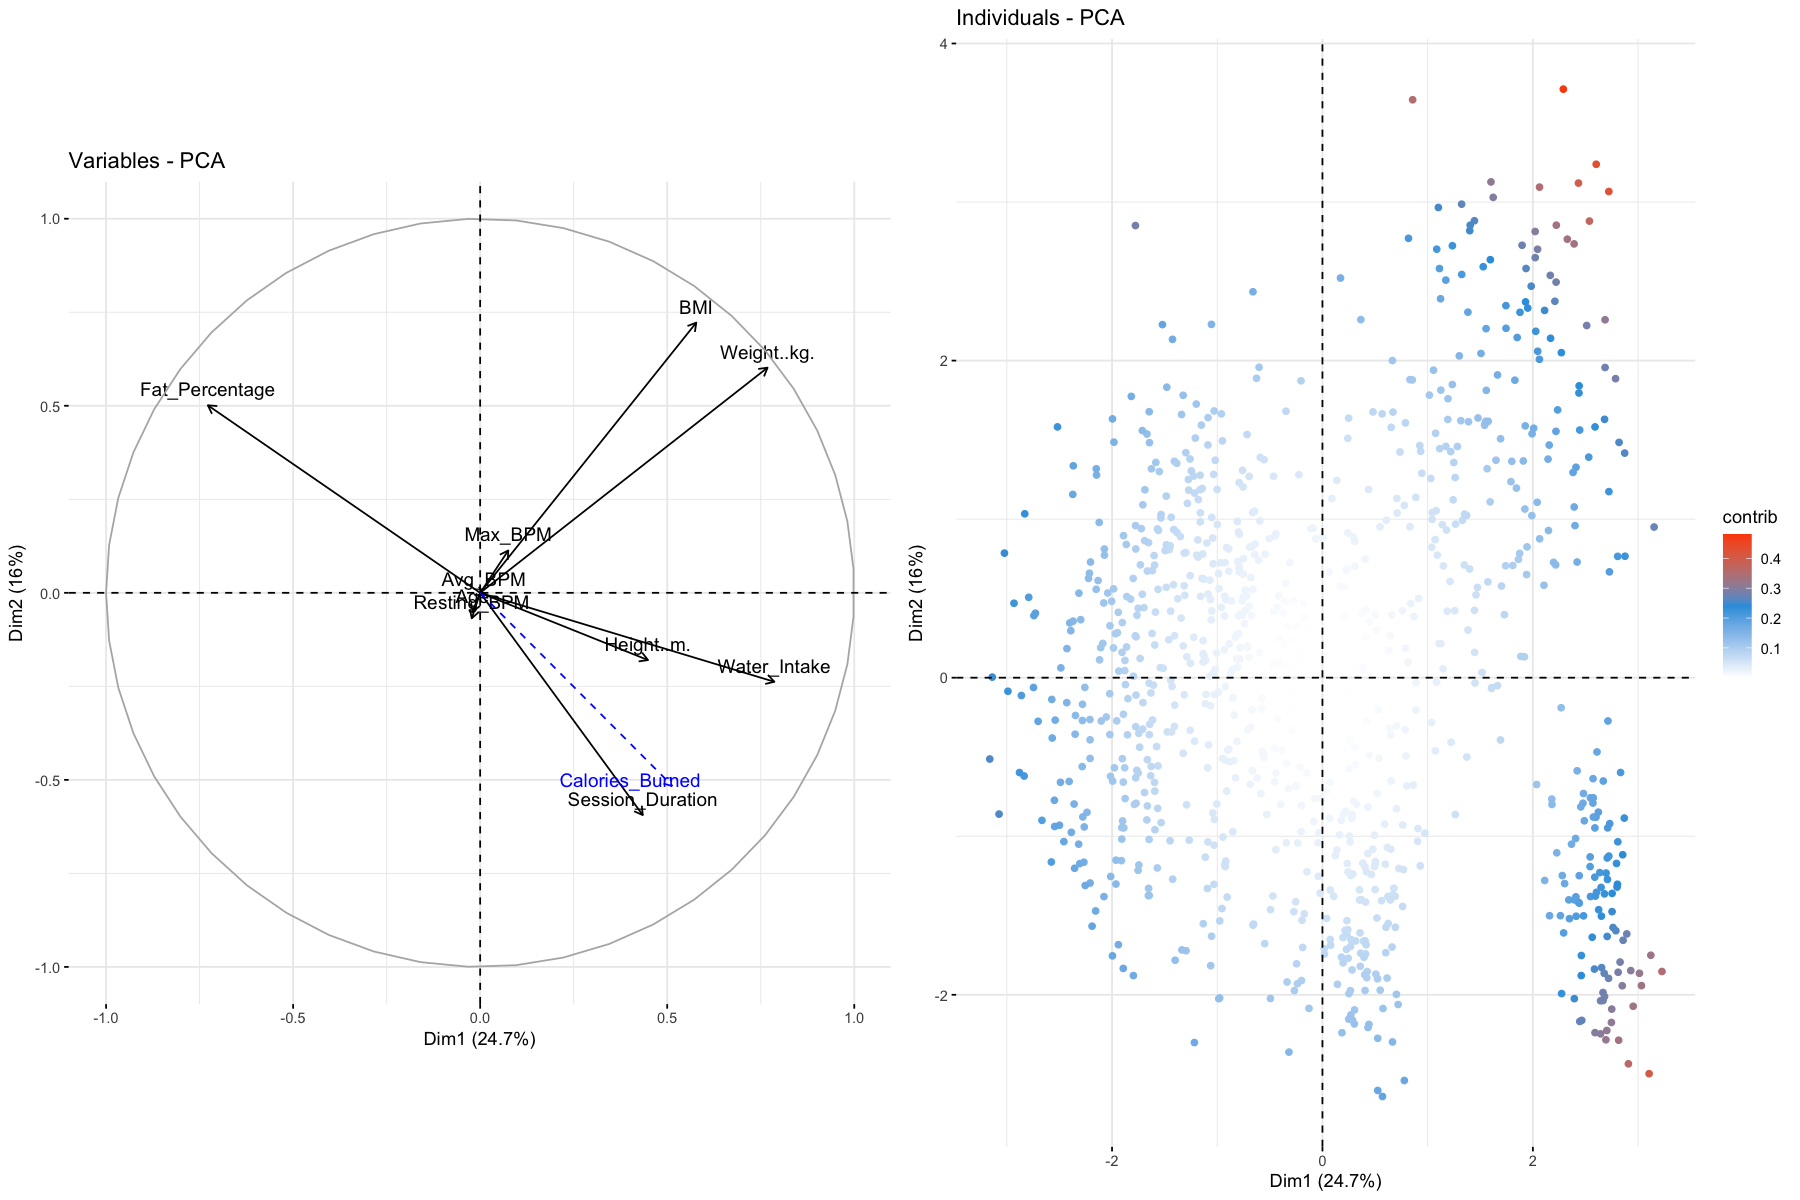

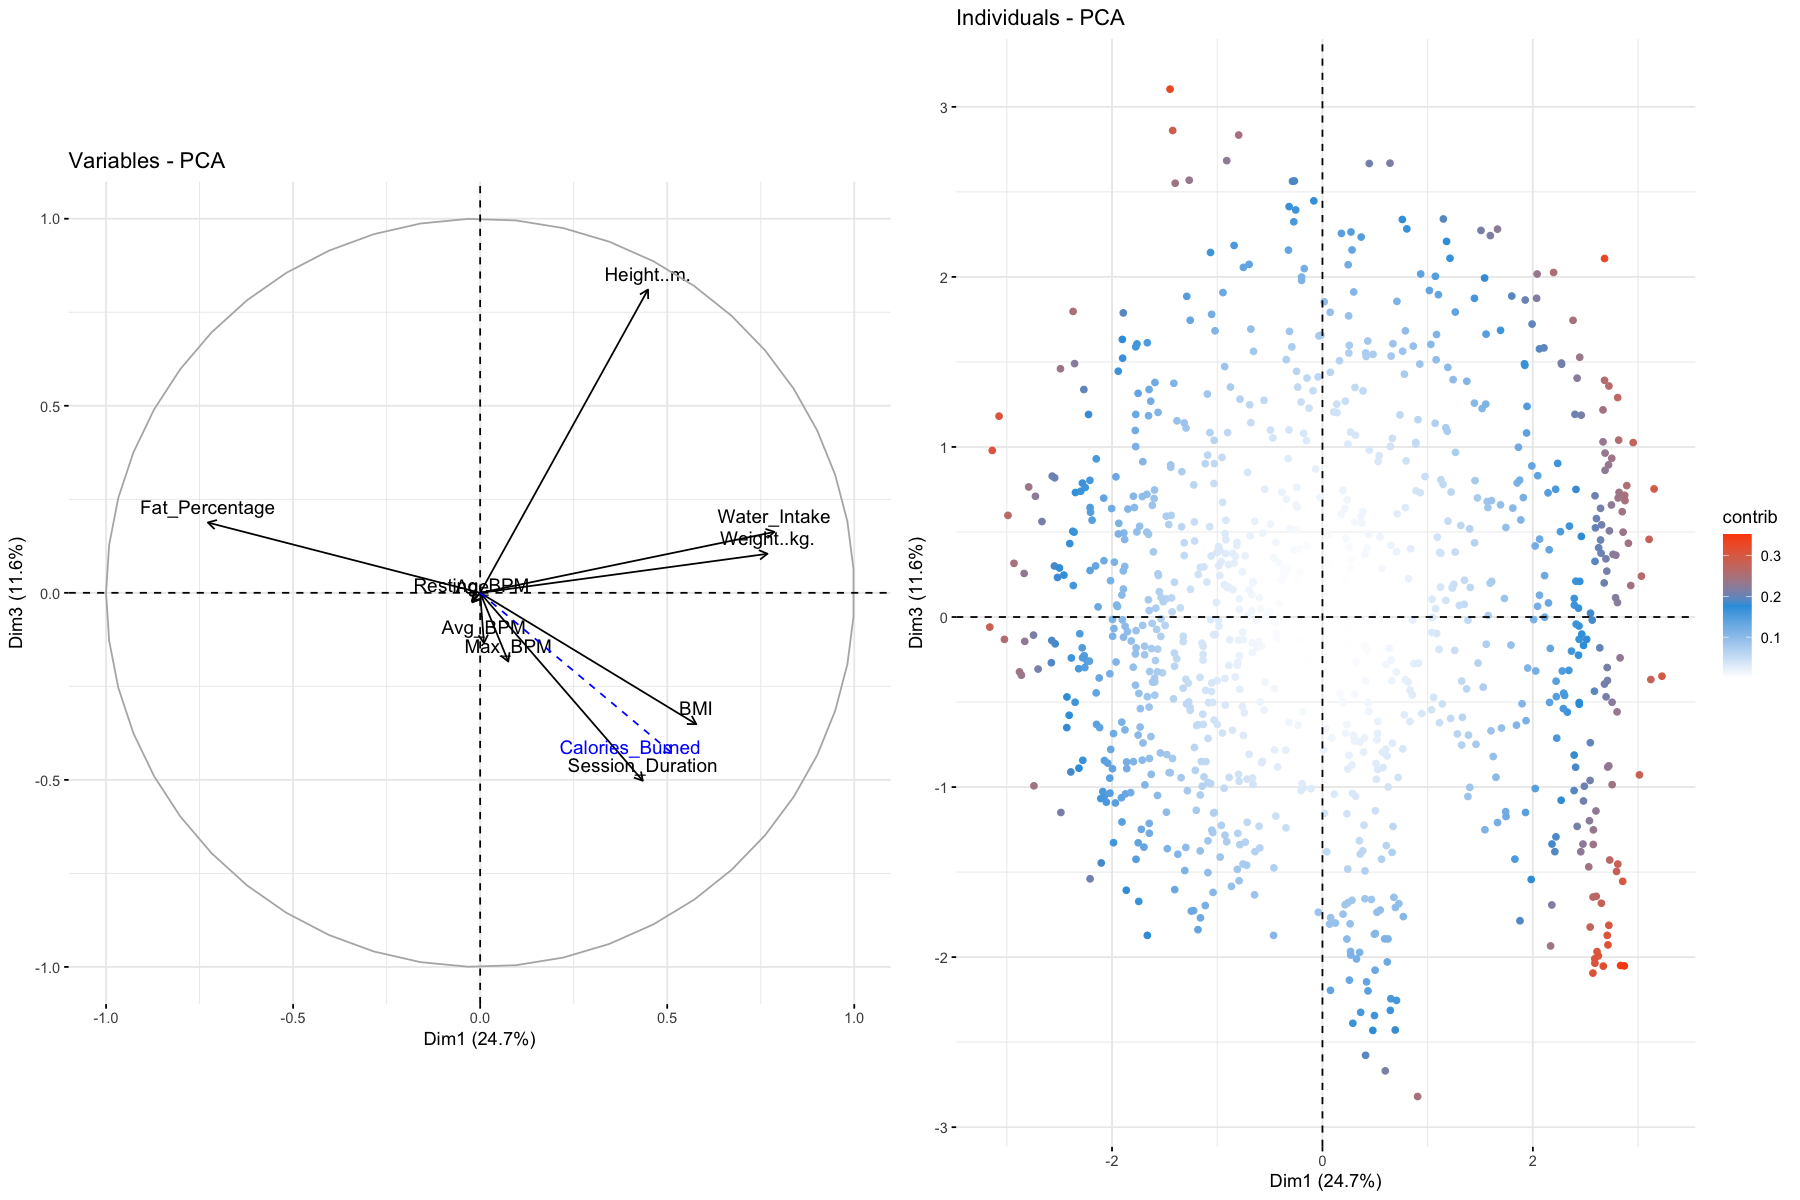

In [17]:
options(repr.plot.width=15, repr.plot.height=10)
p1 <- fviz_pca_var(acp)
p2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
grid.arrange(p1,p2, ncol=2)
p3 <-fviz_pca_var(acp,axes=c(1,3))
p4<- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
grid.arrange(p3,p4,ncol=2)

Grâce aux graphiques ci-dessus nous pouvons expliquer quelles dimensions sont portées par quelles variables et ainsi essayer de les expliquer. Ainsi on remarque assez facilement que la dimension 1, portée par des variables comme le poids, la consommation d'eau, l'IMC et le pourcentage de masse graisseuse, représente le corps de l'individu, son profil pûrement physique. 
De plus, la dimension 2, portée par les variables poids, IMC, calories brulées et durée de la séance, représente plus le profil de l'individu en tant que sportif. La dimension 3 quant à elle est plus difficile à interpréter. 

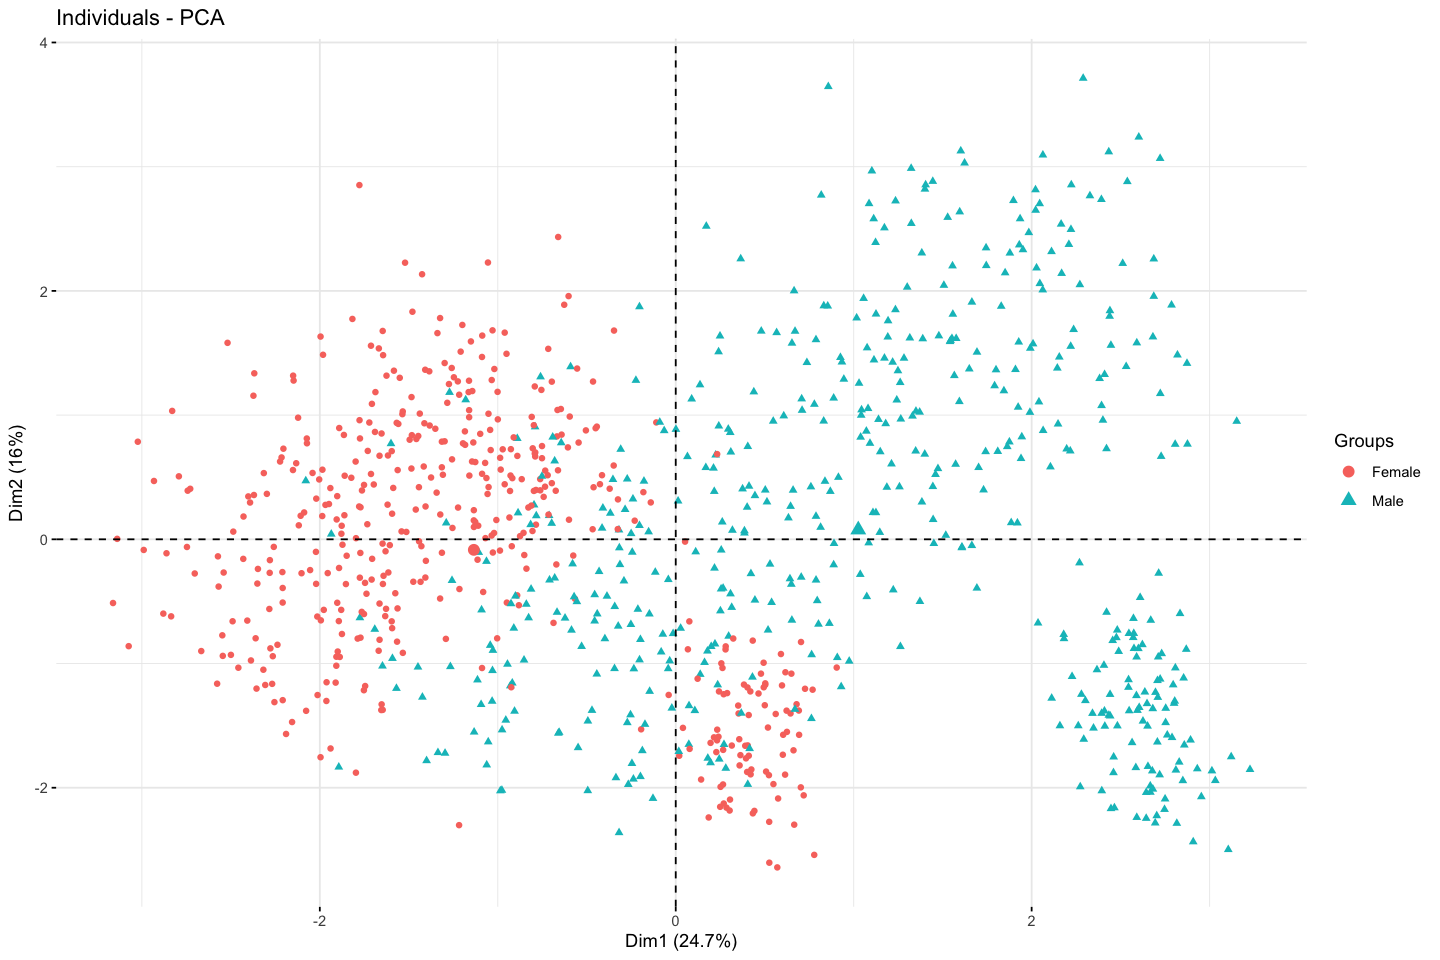

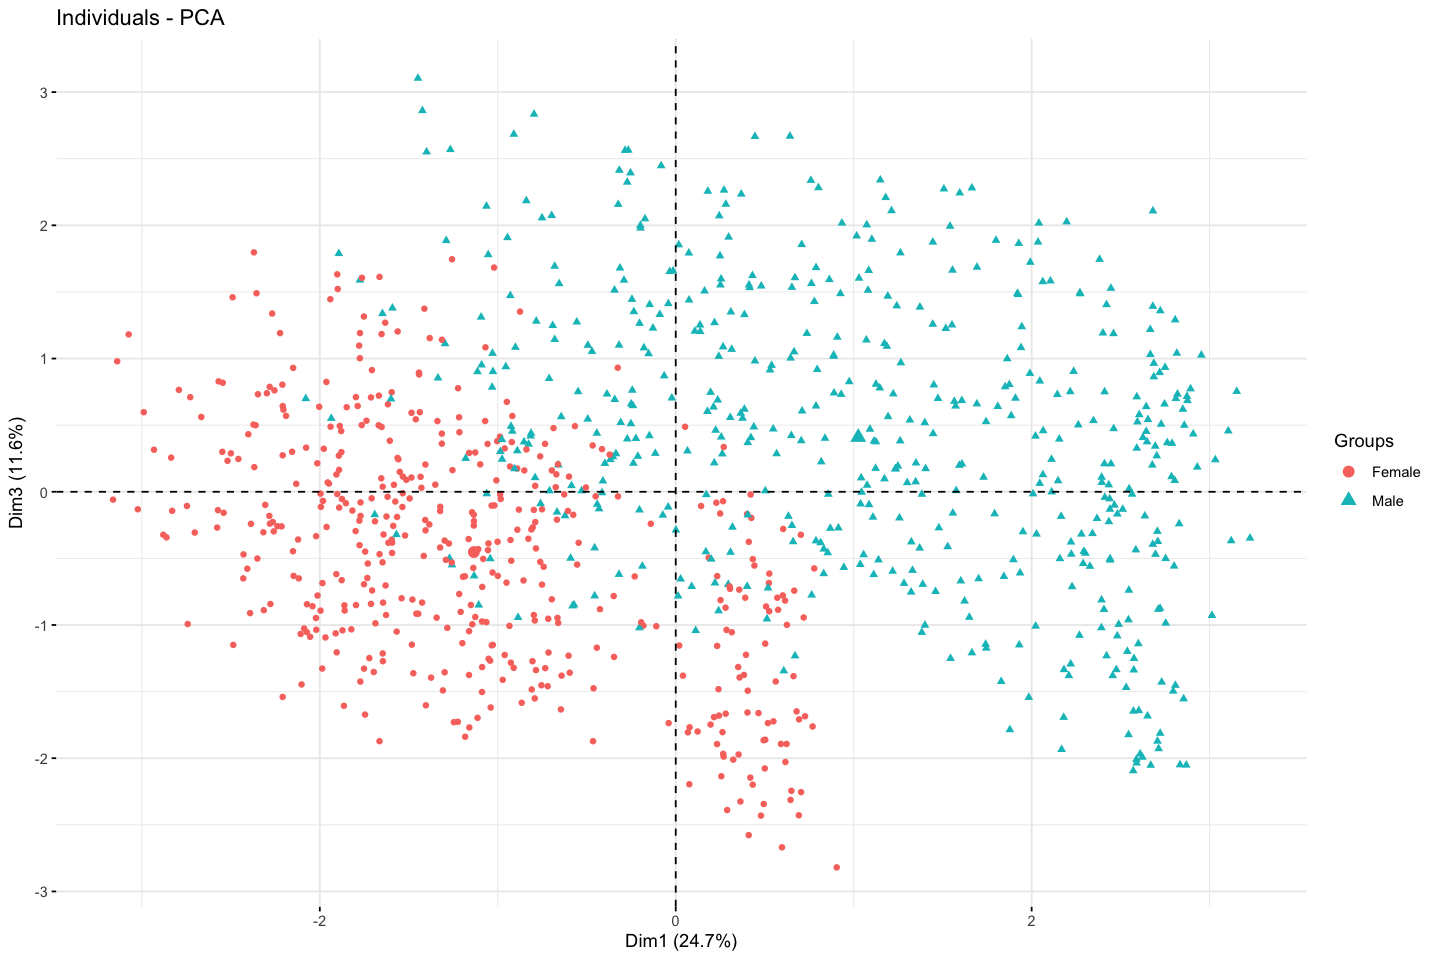

In [18]:
options(repr.plot.width=12, repr.plot.height=8)

fviz_pca_ind(acp, label="none", habillage=Gym$Gender)
fviz_pca_ind(acp, label="none", habillage=Gym$Gender, axes=c(1,3))

Dans ces projections en ACP des individus sur les dimensions 1 et 2 puis 1 et 3 certains groupes se distinguent. En effet, sur le premier graphique on distingu clairement 2 groupes se distingant du reste, ce sont un groupe de femme et un groupe d'homme que nous pourrions considérer comme les plus sportif, ce sont sûrement des individus qui brûlent le plus de calories parmi les femmes et les hommes. 

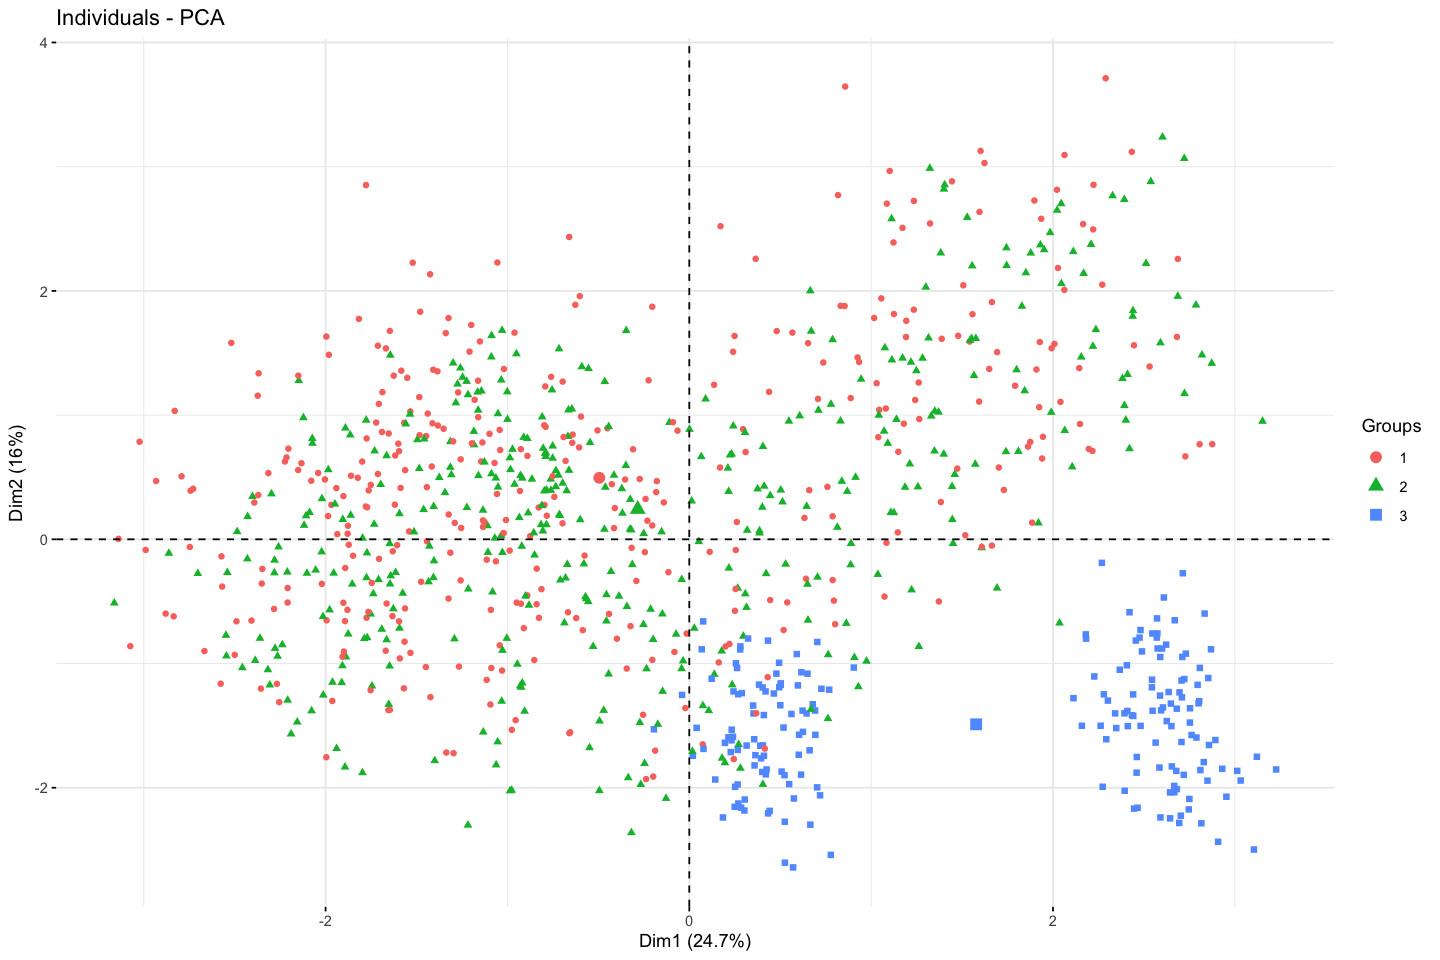

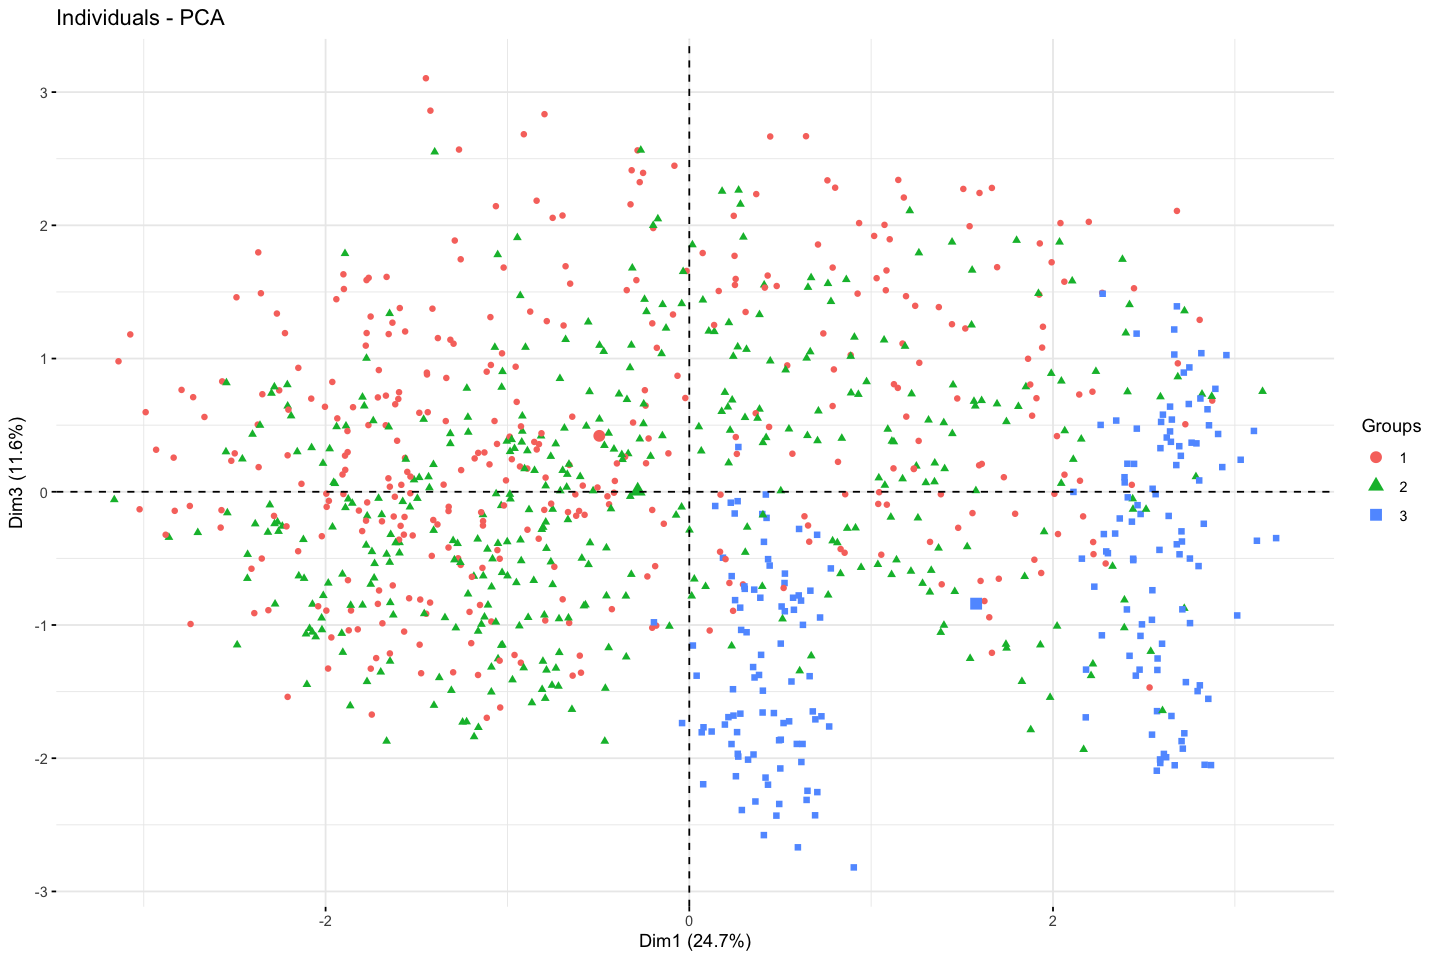

In [19]:
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level)
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level, axes=c(1,3))

Par ces représentations, nous avons confirmé notre intuition précédente, puisque les deux groupes qui se distinguaient
correspondent à deux groupes d'individus expérimentés

# Prévision des calories brulées

Dans cette partie, nous avons pour objectif de prédire la quantité de calories brûlées par rapport aux autres variables à notre disposition. Pour cela, nous allons tester plusieurs modèles et comparer leur éfficacité.

## Séparation de la base en train/test

Avant de pouvoir réaliser nos différents modèles de prédiction, il est d'abord nécessaire de séparer nos données en deux parties. La première partie correspond à 80% de la base initiale. Elle permet d'entraîner un modèle sur les données qui lui sont fournies. La seconde partie est celle de test. Elle permettra d'appliquer le modèle entraîné et de comparer les différentes méthodes entre elles.  

In [20]:
set.seed(150) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [21]:
# construction de l'échantillon d'apprentissage
datappr0 <- Gym[appri,] 
# construction de l'échantillon test
datestr0 <- Gym[testi,]

summary(datappr0)
summary(datestr0)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:374   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :404   1st Qu.: 58.02   1st Qu.:1.620   1st Qu.:170.0  
 Median :39.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.57                Mean   : 73.66   Mean   :1.723   Mean   :179.8  
 3rd Qu.:49.00                3rd Qu.: 85.60   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 303.0   Cardio  :201   Min.   :10.00  
 1st Qu.:132   1st Qu.:56.00   1st Qu.: 723.5   HIIT    :175   1st Qu.:21.20  
 Median :144   Median :62.00   Median : 895.0   Strength:203   Median :26.25  
 Mean   :144   Mean   :62.12   Mean   : 909.4   Yoga    :199   Mean   :24.93  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1089.8       

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female: 88   Min.   : 41.10   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :107   1st Qu.: 58.30   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.60   Median :1.700   Median :181.0  
 Mean   :39.15                Mean   : 74.62   Mean   :1.722   Mean   :180.3  
 3rd Qu.:51.00                3rd Qu.: 86.95   3rd Qu.:1.795   3rd Qu.:190.0  
 Max.   :59.00                Max.   :128.40   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 319.0   Cardio  :54   
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 711.0   HIIT    :46   
 Median :139.0   Median :64.00   Median : 882.0   Strength:55   
 Mean   :142.8   Mean   :62.63   Mean   : 889.7   Yoga    :40   
 3rd Qu.:156.0   3rd Qu.:68.50   3rd Qu.:1025.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1701.0          

Afin de rentre toutes les données comparables, on normalise l'échantillon de test et l'échantillon d'apprentissage exempté de la variable à prédire. 

In [22]:
# on normalise l'échantillon d'apprentissage
datappr=datappr0
datappr[,-c(2,8,9,11,13)]=scale(datappr0[,-c(2,8,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,11,13)]=scale(datestr0[,-c(2,8,9,11,13)],
                            center=sapply(datappr0[,-c(2,8,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,11,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.6719302   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-0.8360099   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-0.0000895   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.0000000   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 0.8358308   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.7414112   Max.   : 1.619

      Age              Gender     Weight..kg.         Height..m.       
 Min.   :-1.69638   Female: 88   Min.   :-1.53774   Min.   :-1.761001  
 1st Qu.:-0.87152   Male  :107   1st Qu.:-0.72548   1st Qu.:-0.812644  
 Median : 0.11832                Median :-0.14462   Median :-0.180407  
 Mean   : 0.04853                Mean   : 0.04532   Mean   :-0.009784  
 3rd Qu.: 1.02567                3rd Qu.: 0.62750   3rd Qu.: 0.570375  
 Max.   : 1.68557                Max.   : 2.58496   Max.   : 2.190483  
    Max_BPM            Avg_BPM          Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.67193   Min.   :-1.65238   Min.   : 319.0  
 1st Qu.:-0.84614   1st Qu.:-0.90567   1st Qu.:-0.83442   1st Qu.: 711.0  
 Median : 0.10653   Median :-0.34839   Median : 0.25618   Median : 882.0  
 Mean   : 0.04924   Mean   :-0.08154   Mean   : 0.06952   Mean   : 889.7  
 3rd Qu.: 0.88599   3rd Qu.: 0.83583   3rd Qu.: 0.86965   3rd Qu.:1025.0  
 Max.   : 1.66546   Max.   : 1.74141   Max.   

In [23]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(200,2000)+ylim(-150,200)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Modèle linéaires

On s'intéresse d'abord aux modèles de type linéaire. Ceux-ci sont vastement utilisés pour leur simplicité et leur interprétabilité.

### Sans pénalisation et sans sélection de variables

La variable à expliquer étant quantitative, on utilise un de régression linéaire de type ANCOVA sans intéractions.

In [24]:
options(repr.plot.width=8, repr.plot.height=6)

# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
summary(reg.lm)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

                   Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                 1  1370418  1370418   846.877  < 2e-16 ***
Gender              1  1258021  1258021   777.419  < 2e-16 ***
Weight..kg.         1    19288    19288    11.919 0.000586 ***
Height..m.          1      898      898     0.555 0.456480    
Max_BPM             1    13399    13399     8.280 0.004120 ** 
Avg_BPM             1  6693583  6693583  4136.433  < 2e-16 ***
Resting_BPM         1        5        5     0.003 0.955216    
Workout_Type        3   502697   167566   103.550  < 2e-16 ***
Fat_Percentage      1 19926671 19926671 12314.081  < 2e-16 ***
Experience_Level    2  9695358  4847679  2995.719  < 2e-16 ***
BMI                 1     3602     3602     2.226 0.136125    
Workout_Frequency   3    29856     9952     6.150 0.000392 ***
Session_Duration    1 17829857 17829857 11018.314  < 2e-16 ***
Water_Intake        1       33       33     0.020 0.886265    
Residuals         758  1226597     1618                

Nous allons calculer le R2 et l'erreur moyenne du modèle afin d'avoir des données comparables que nous recalculerons par la suite pour les autres modèles.

In [25]:
summary_lm <- summary.lm(reg.lm) 

R2 <- 1 - sum(summary_lm$residuals^2) / sum((datappr$Calories_Burned - mean(datappr$Calories_Burned))^2)

n <- nrow(datappr)
p <- length(coef(summary_lm)) - 1  
R2_adj <- 1 - ((1 - R2) * (n - 1)) / (n - p - 1)

# Affichage
cat("R² classique :", round(R2, 4), "\n")
cat("R² ajusté     :", round(R2_adj, 4), "\n")
MSE <- mean(summary_lm$residuals^2)
cat("MSE :", MSE, "\n")

R² classique : 0.9791 
R² ajusté     : 0.9767 
MSE : 1576.603 


Le R2 classique étant fortement élevé, on en déduit que ce modèle a un biais très faible. Cependant,sans pénalisation les modèles linéaires ont tendance à faire de l'overfitting pour un nombre de paramètres important. On se retrouve donc avec des modèles trop complexes. Cela se traduit par un R2 ajusté plus faible bien que très satisfaisant. Par la suite, on utilisera principalement la MSE, étant une valeur sûre pour comparer nos méthodes.

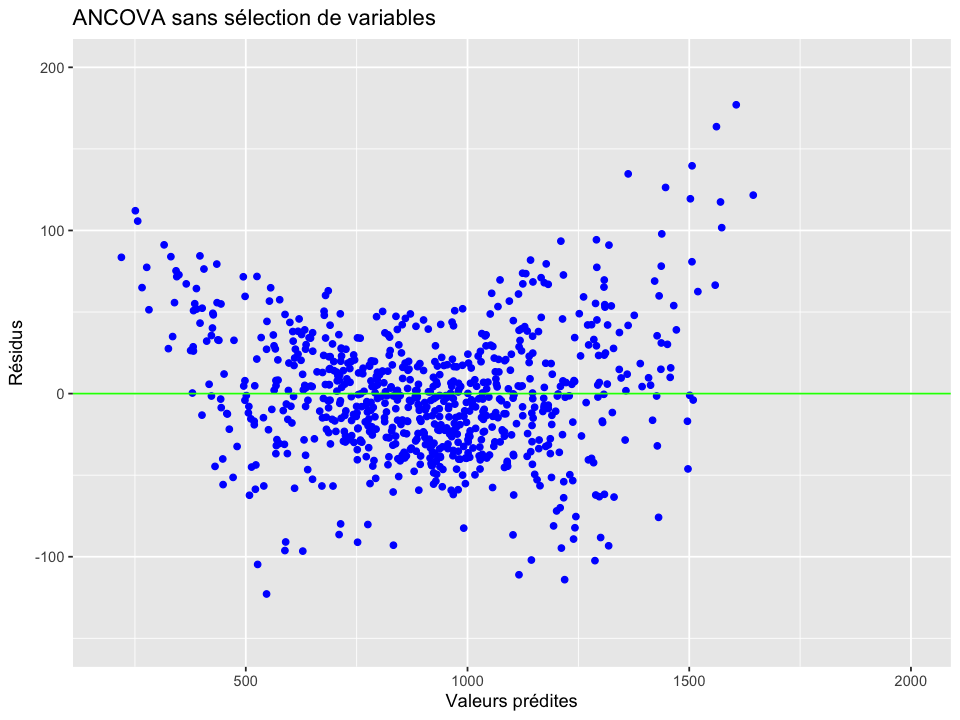

In [26]:
options(repr.plot.width=8, repr.plot.height=6)
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

En affichant le graphique des résidus on remarque une forme "en banane" synonyme d'un modèle peu fiable. En effet, si le modèle était bon nous observerions une ligne droit proche de la ligne y=0. Cela confirme que le modèle de régression linéaire sans pénalisation ni sélection de variable n'est pas très efficace pour la prédiction des calories brulées.

### Avec pénalisation

Il est nécessaire de trouver un équilibre entre le biais et la variance. En effet, dans certaines situations, il est préférable de choisir un modèle biaisé, qui permet de réduire de manière importante que de choisir un modèle à R2 élevé. A cet effet, nous allons utiliser différents critères de pénalisation sur les modèles trop complexes. 

#### Sans sélection de variables (Ridge)

In [27]:
lambdas <- seq(0.01, 10, length.out = 100)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

# Entraînement du modèle avec validation croisée
regRidgeCV <- cv.glmnet(x = x.mat, 
                        y = datappr[, 8], 
                        alpha = 0,                  # alpha = 0 => Ridge
                        lambda = lambdas, 
                        nfolds = 5,
                        standardize = TRUE)

# Meilleur paramètre lambda
lambda_opt <- regRidgeCV$lambda.min
cat("Meilleur paramètre = ", lambda_opt, "\n")

Meilleur paramètre =  0.2118182 


Ridge avec lambda.1se - MSE : 1642.8 


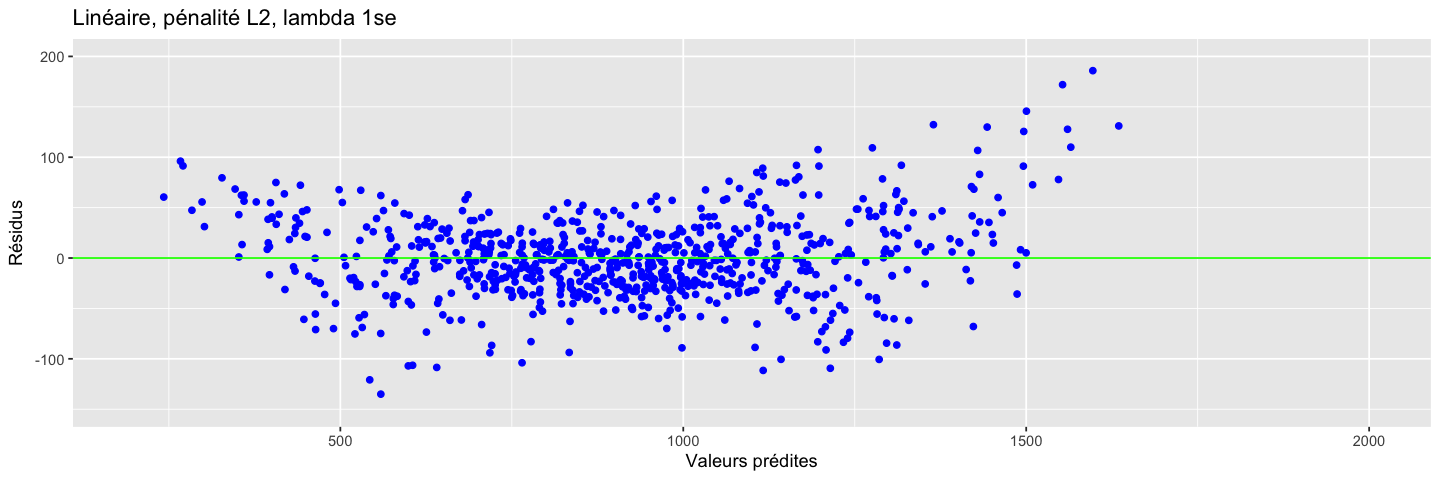

In [28]:
fit.ridge <- predict(regRidgeCV, s = "lambda.1se", newx = x.mat)

# Résidus
res.ridge <- datappr$Calories_Burned - fit.ridge

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.ridge, res.ridge, "Linéaire, pénalité L2, lambda 1se")

mse_ridge <- mean(res.ridge^2)
cat("Ridge avec lambda.1se - MSE :", round(mse_ridge, 2), "\n")




#### Avec sélection de variables (Cp/AIC/BIC et Lasso)

##### **LASSO**

Afin de simplifier le modèle nous allons effectuer une sélection de variables à l'aide de la méthode LASSO.

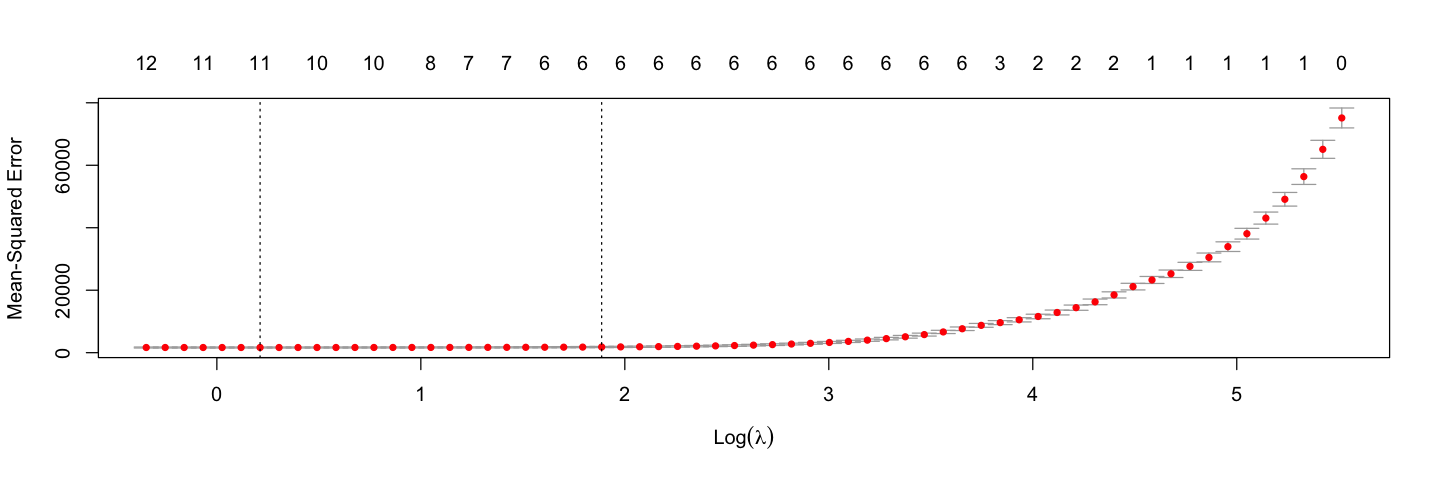

[1] "CV estimate of lambda : 6.596"

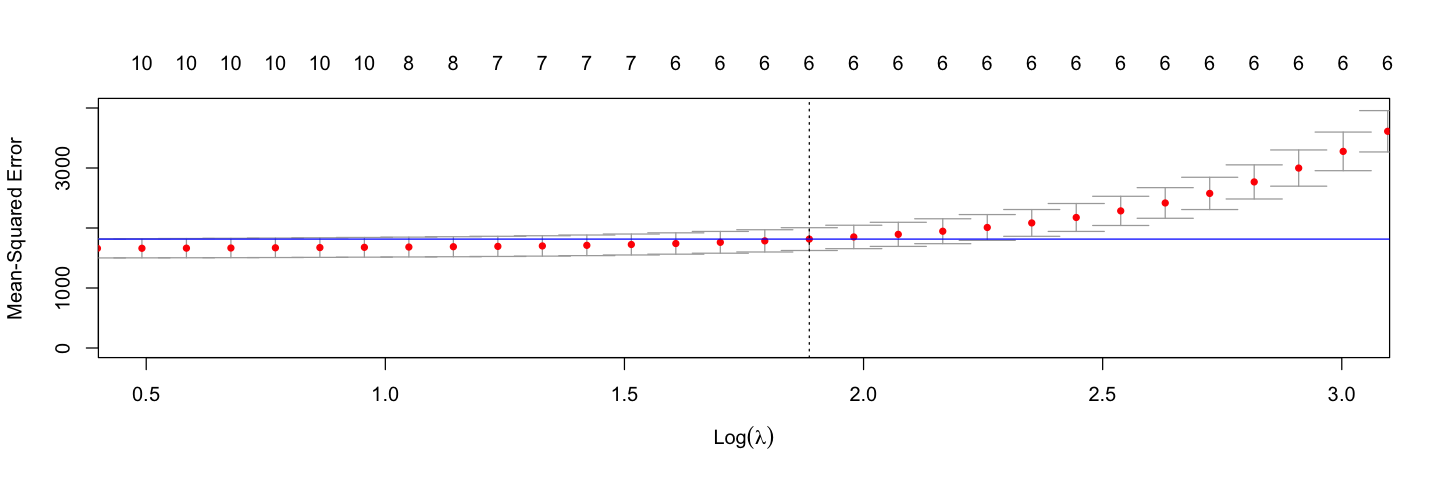

In [29]:

# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)
plot(reg.lasso.cv,xlim=c(0.5,3),ylim=c(0,4000))
abline(h=reg.lasso.cv$cvm[c(reg.lasso.cv$index)[2]],col="blue")

paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))

Comme expliqué précemment grâce à ce graphique on peut comparer l'évolution de l'erreur moyenne en fonction de l'évolution du log du paramètre de pénalisation. Ainsi, un lambda plus petit va créer un modle plus complexe mais plus fiable tandis qu'un lambda plus grand va simplifier le modèle mais augmenter l'erreur. Ici, afin de simplifier le modèle au maximum sans trop augmenter l'erreur nous allons choisir un log de lambda environ égal à 1.7, qui nous donne un modèle à 6 variables. Ainsi le log de lambda choisi a une erreur moyenne compris dans l'intervalle d'erreur minimal du modèle.

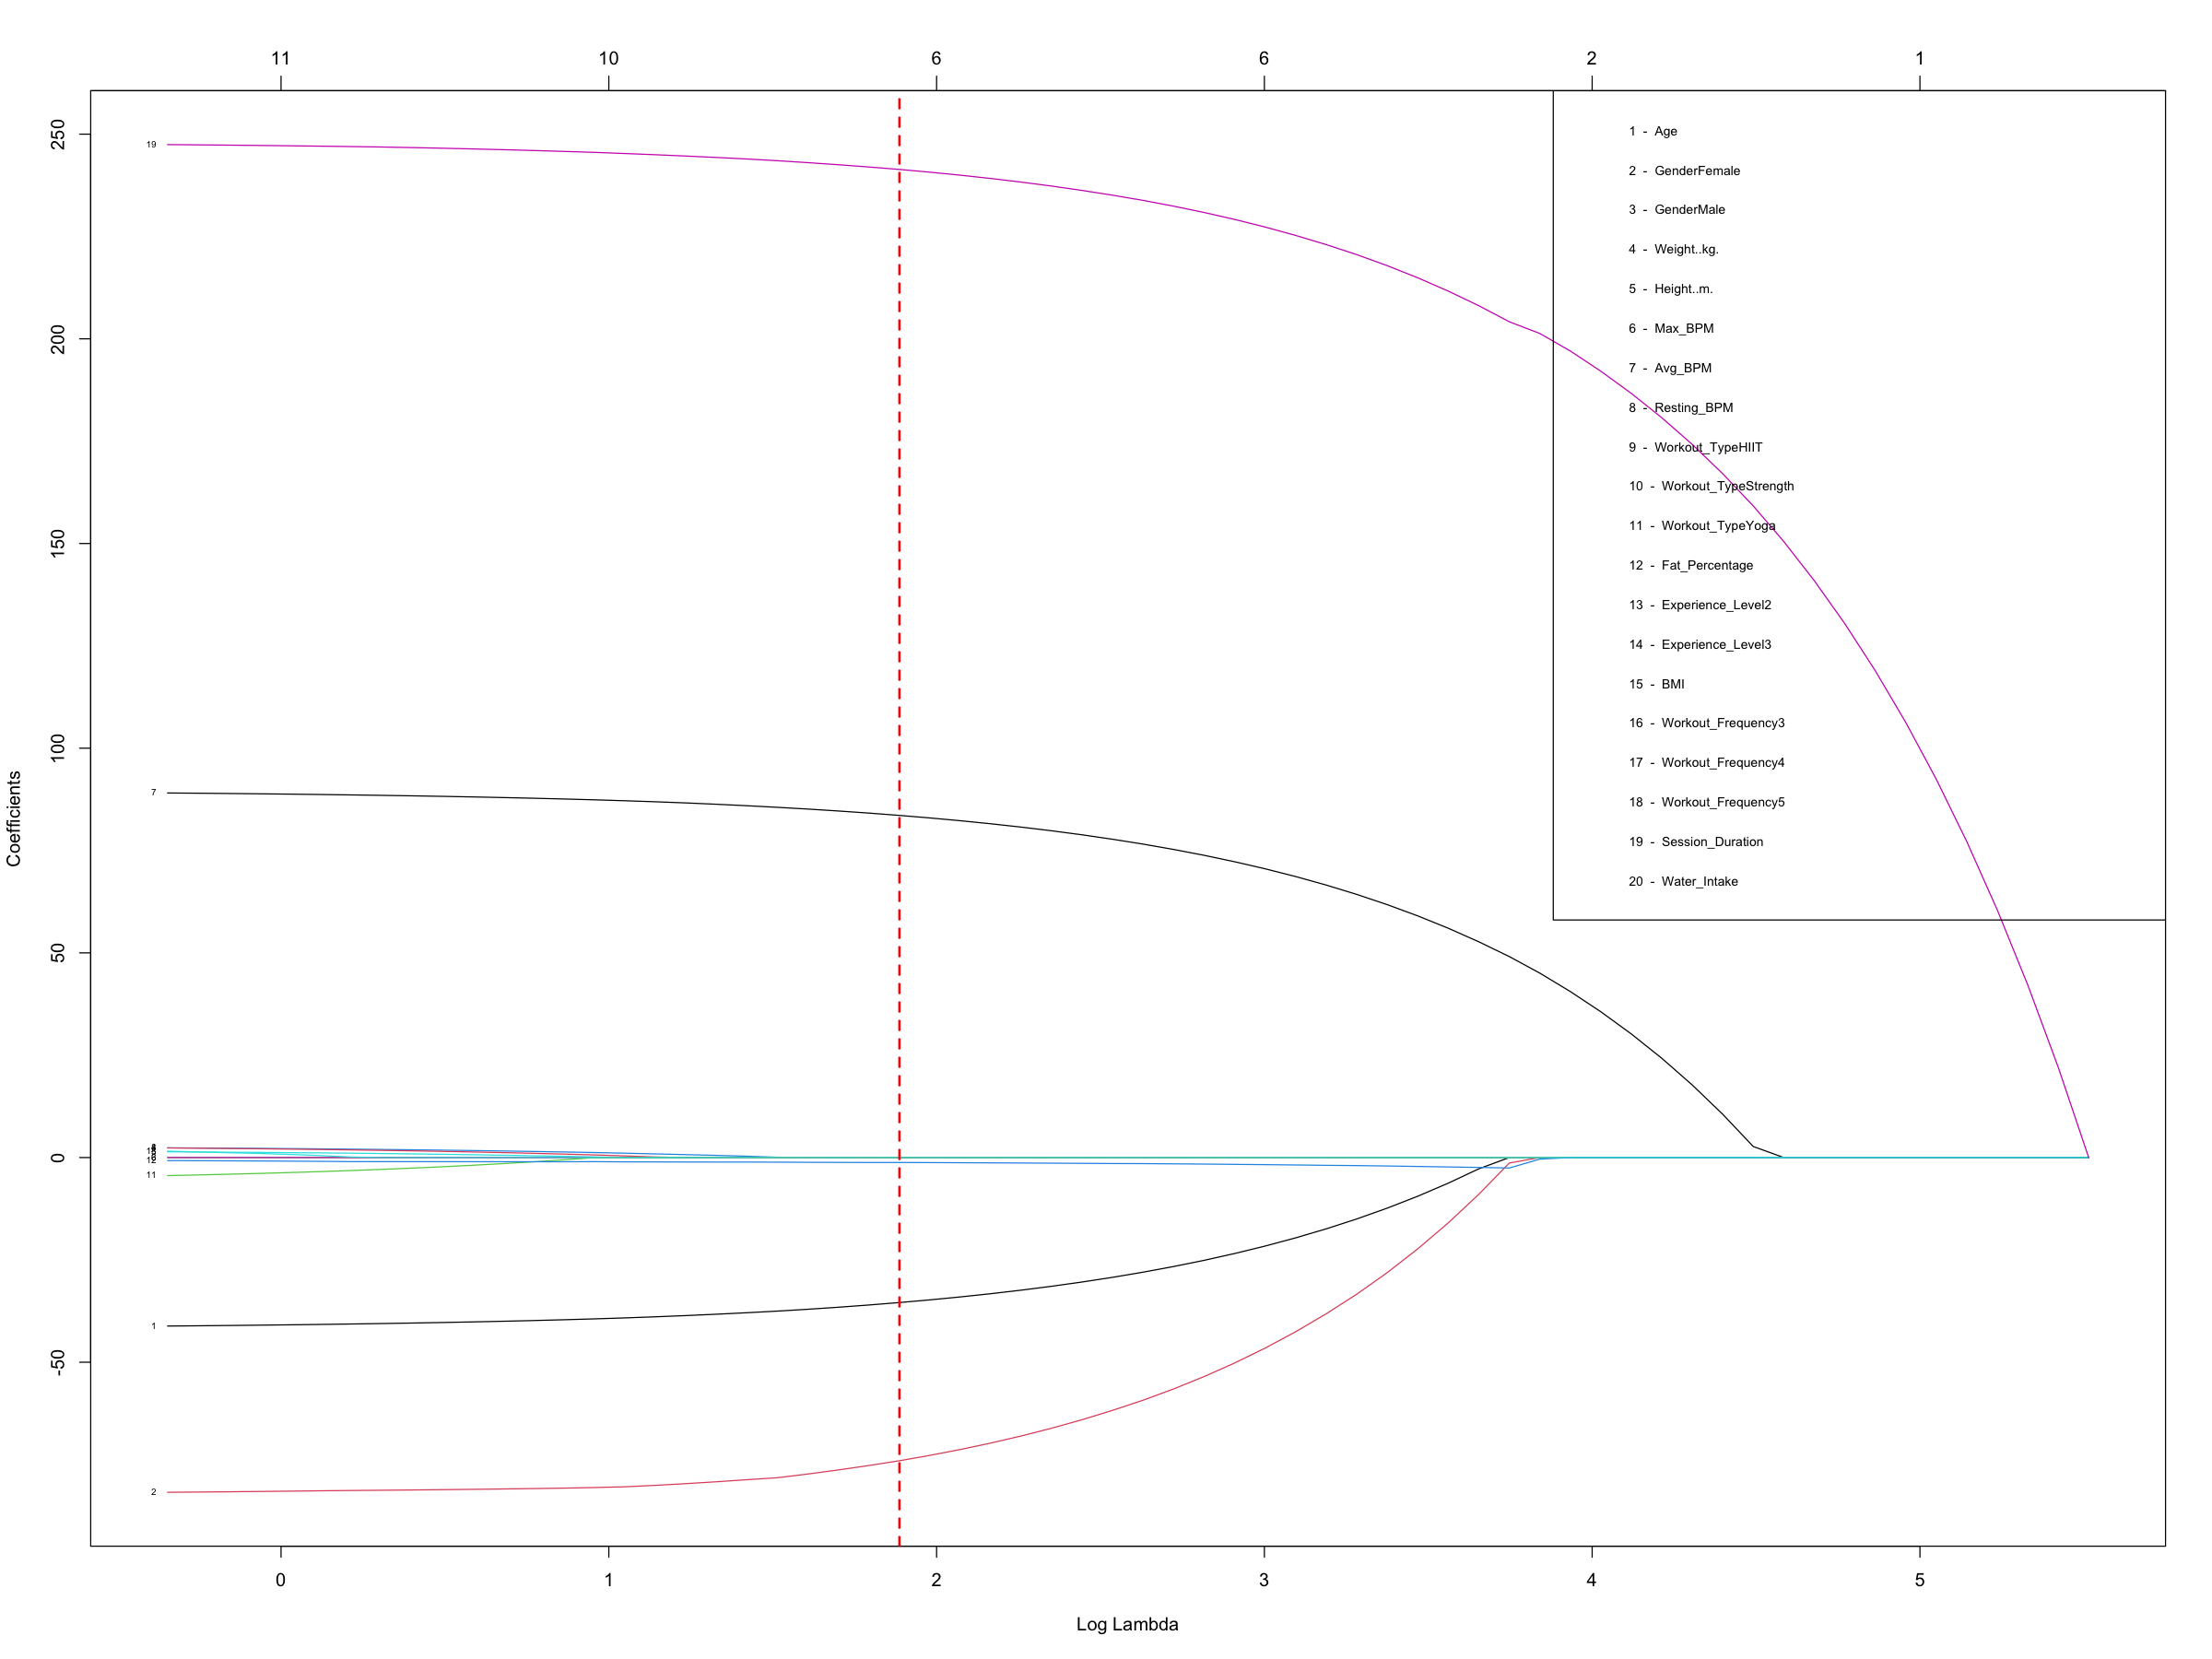

In [30]:

reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)


abline(v = log(reg.lasso.cv$lambda.1se), col = "red", lty = 2, lwd = 2)

legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)), cex = 0.7)



Le graphique ci-dessus représente l'évolution des coefficients associés à chaque variable en fonction du log du paramètre de pénalisation $\lambda$. A l'aide de ce graphique, nous pouvons visualiser le svariables conservées par le lasso pour le lambda optimal (ligne rouge verticale).
Le lambda trouvé en R pourra être relativement différent de celui trouvé en python car on observe un "plateau" des coéfficient qui s'étale sur une grande plage de log(lambda). La sélection des variables ne sera donc pas affectée par cette différence. 

In [31]:
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

21 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.449802e+02
Age                  -3.542280e+01
GenderFemale         -7.406577e+01
GenderMale            1.481748e-11
Weight..kg.           .           
Height..m.            .           
Max_BPM               .           
Avg_BPM               8.358138e+01
Resting_BPM           .           
Workout_TypeHIIT      .           
Workout_TypeStrength  .           
Workout_TypeYoga      .           
Fat_Percentage       -1.203725e+00
Experience_Level2     .           
Experience_Level3     .           
BMI                   .           
Workout_Frequency3    .           
Workout_Frequency4    .           
Workout_Frequency5    .           
Session_Duration      2.413843e+02
Water_Intake          .           

D'après ce critère, les variables les plus intéressantes pour prédire les calories brulées sont: la durée de la session, le BPM moyen, le genre (pour éviter les redondances, la modalité principales gardée est le sexe féminin) et l'age. 

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


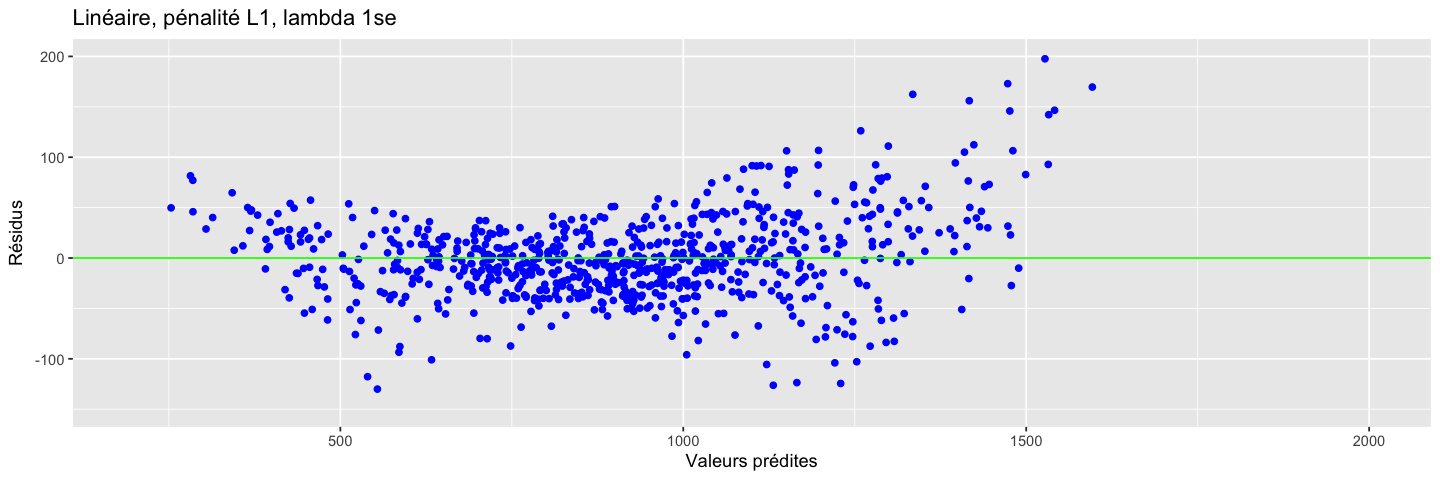

In [32]:
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda 1se") 

In [33]:
mse_lasso <- mean(res.lasso^2)
cat("LASSO avec lambda.1se - MSE :", round(mse_lasso, 2), "\n")


LASSO avec lambda.1se - MSE : 1788.99 


 BIZARRE QUE MSE SI DIFFÉRENTE AVEC PYTHON (DEMANDER MERCREDI)

##### **AIC**

In [34]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Calories_Burned ~ . , data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.aic <- step(reg.glm, direction = "backward")

y_pred <- predict(reg.glm.aic, newdata = datappr)
y_true <- datappr$Calories_Burned
res.aic <- y_true - y_pred

Start:  AIC=7978.3
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  7974.0
- Workout_Type       3  1232565  7976.1
- Water_Intake       1  1226630  7976.3
- Max_BPM            1  1226900  7976.5
- Experience_Level   2  1231522  7977.4
- Fat_Percentage     1  1229290  7978.0
<none>                  1226597  7978.3
- Weight..kg.        1  1230436  7978.7
- BMI                1  1231660  7979.5
- Height..m.         1  1232970  7980.3
- Resting_BPM        1  1234421  7981.3
- Gender             1  1505702  8135.8
- Age                1  2560041  8548.7
- Avg_BPM            1  7311728  9365.2
- Session_Duration   1 19056374 10110.5

Step:  AIC=7974.04
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

##### **BIC**

In [35]:
n <- nrow(datappr)
reg.glm <- glm(Calories_Burned ~ . , data = datappr)

# Sélection descendante selon le BIC
reg.glm.bic <- step(reg.glm, direction = "backward", k = log(n))


y_pred <- predict(reg.glm.bic, newdata = datappr)
y_true <- datappr$Calories_Burned
res.bic <- y_true - y_pred

Start:  AIC=8071.44
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  8053.2
- Workout_Type       3  1232565  8055.2
- Experience_Level   2  1231522  8061.2
- Water_Intake       1  1226630  8064.8
- Max_BPM            1  1226900  8065.0
- Fat_Percentage     1  1229290  8066.5
- Weight..kg.        1  1230436  8067.2
- BMI                1  1231660  8068.0
- Height..m.         1  1232970  8068.8
- Resting_BPM        1  1234421  8069.7
<none>                  1226597  8071.4
- Gender             1  1505702  8224.3
- Age                1  2560041  8637.2
- Avg_BPM            1  7311728  9453.7
- Session_Duration   1 19056374 10199.0

Step:  AIC=8053.2
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

#### Comparaison des modèles

In [36]:
# Matrice des variables explicatives pour le test
x_test <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Prédiction sur l'échantillon de test
pred_lm_t <- predict(reg.lm, newdata = datestr)
pred_aic_t <- predict(reg.glm.aic, newdata = datestr)
pred_bic_t <- predict(reg.glm.bic, newdata = datestr)
pred_lasso_t <- predict(reg.lasso.cv, newx = x_test, s = "lambda.1se")
pred_ridge_t <- predict(regRidgeCV, newx = x_test, s = lambda_opt)

# Variable cible
y_test <- datestr$Calories_Burned
denom <- sum(y_test^2)  # La  moyenne de y_test est zéro

# Q2 sur test
Q2_lm <- 1 - sum((y_test - pred_lm_t)^2) / denom
Q2_aic <- 1 - sum((y_test - pred_aic_t)^2) / denom
Q2_bic <- 1 - sum((y_test - pred_bic_t)^2) / denom
Q2_lasso <- 1 - sum((y_test - pred_lasso_t)^2) / denom
Q2_ridge <- 1 - sum((y_test - pred_ridge_t)^2) / denom

n <- length(y_test)


p_lm<- length(coef(reg.lm)) - 1      
p_aic <- length(coef(reg.glm.aic)) - 1    
p_bic <- length(coef(reg.glm.bic)) - 1    
coef_lasso <- coef(reg.lasso.cv, s = "lambda.1se")
p_lasso <- sum(coef_lasso != 0) - 1
coef_ridge <- coef(regRidgeCV, s =lambda_opt)
p_ridge <- sum(coef_ridge != 0) - 1 

# Q² ajustés
Q2adj_lm <- 1 - ((1 - Q2_lm) * (n - 1)) / (n - p_lm - 1)
Q2adj_aic <- 1 - ((1 - Q2_aic) * (n - 1)) / (n - p_aic - 1)
Q2adj_bic <- 1 - ((1 - Q2_bic) * (n - 1)) / (n - p_bic - 1)
Q2adj_lasso <- 1 - ((1 - Q2_lasso) * (n - 1)) / (n - p_lasso - 1)
Q2adj_ridge <- 1 - ((1 - Q2_ridge) * (n - 1)) / (n - p_ridge - 1)

# MSE des modèles
mse.lm <- mean((res.lm)^2)
mse.aic <- mean((res.aic)^2)
mse.bic <- mean((res.bic)^2)
mse.lasso <- mean((res.lasso)^2)
mse.ridge <- mean((res.ridge)^2)

In [37]:
results <- data.frame(
  Modèle = c("Régression LM", "AIC", "BIC", "Lasso", "Ridge"),
  Q2_Ajusté = c(Q2adj_lm, Q2adj_aic, Q2adj_bic, Q2adj_lasso, Q2adj_ridge),
  Q2=  c(Q2_lm, Q2_aic, Q2_bic, Q2_lasso, Q2_ridge),
  MSE = c(mse.lm, mse.aic, mse.bic, mse.lasso, mse.ridge)
)

# Appliquer round uniquement aux colonnes numériques
results_rounded <- results
results_rounded[, 2:3] <- round(results[, 2:3], 5)

print(results_rounded)

         Modèle Q2_Ajusté      Q2      MSE
1 Régression LM   0.99822 0.99840 1576.603
2           AIC   0.99836 0.99843 1592.910
3           BIC   0.99838 0.99841 1615.410
4         Lasso   0.99827 0.99833 1788.988
5         Ridge   0.99821 0.99840 1642.801


## Performance d'un SVM 

Nous allons à présent utiliser un algorithme d’apprentissage supervisé appelé SVM (Support Vector Machine) pour analyser les calories brûlées en fonction des autres variables, ainsi que les prédire. Le SVM est un algorithme de classification qui cherche à trouver l’hyperplan optimal séparant les différentes classes de données avec la marge la plus grande possible.

Nos données étant déjà normalisées, nous allons les séparer en quatres variables différentes x_train, y_train, x_test et y_test, afin d'y appliquer l'algorithme svm pour différents kernels puis évaluer nos résultats, afin de voir à quel moment nos prédictions sont le plus optimisées. Nous sommes ici dans le cas d'un problème de régression (même si ces méthodes sont initialement prévues pour des variables binaires), nous cherchons donc à optimiser au mieux notre coefficient de pénalisation.


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  335






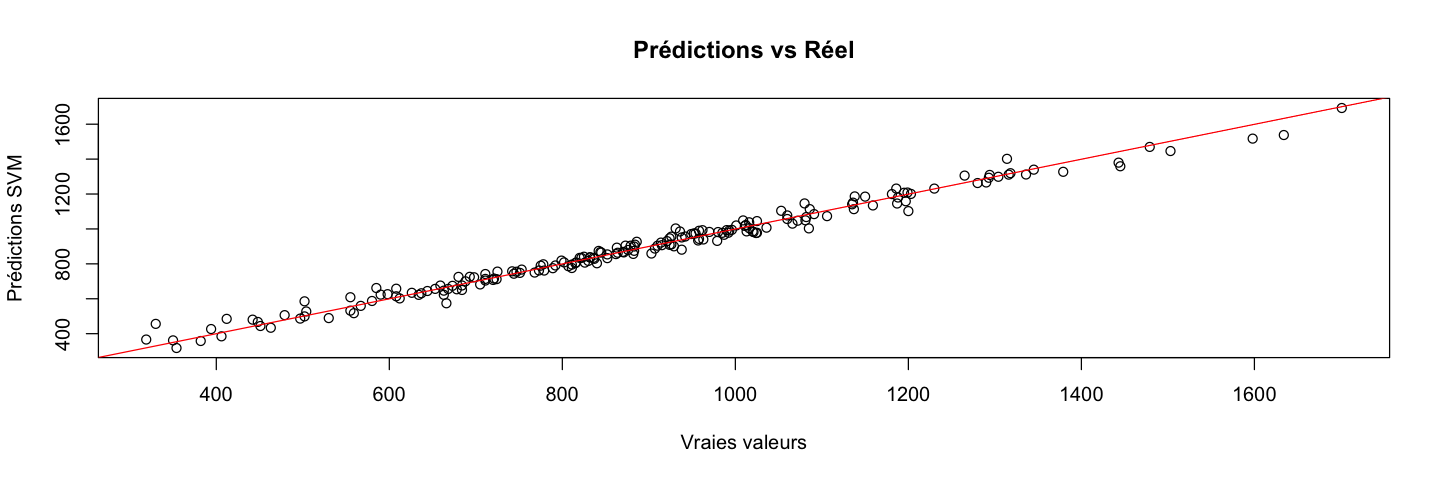

In [38]:
#install.packages("e1071")
library(e1071)
svm.reg0 = svm(Calories_Burned~., data = datappr)
summary(svm.reg0)

pred <- predict(svm.reg0, newdata = datestr)
plot(datestr$Calories_Burned, pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel")
abline(0, 1, col = "red")  # ligne y=x
plot(svm.reg0, data = datappr)

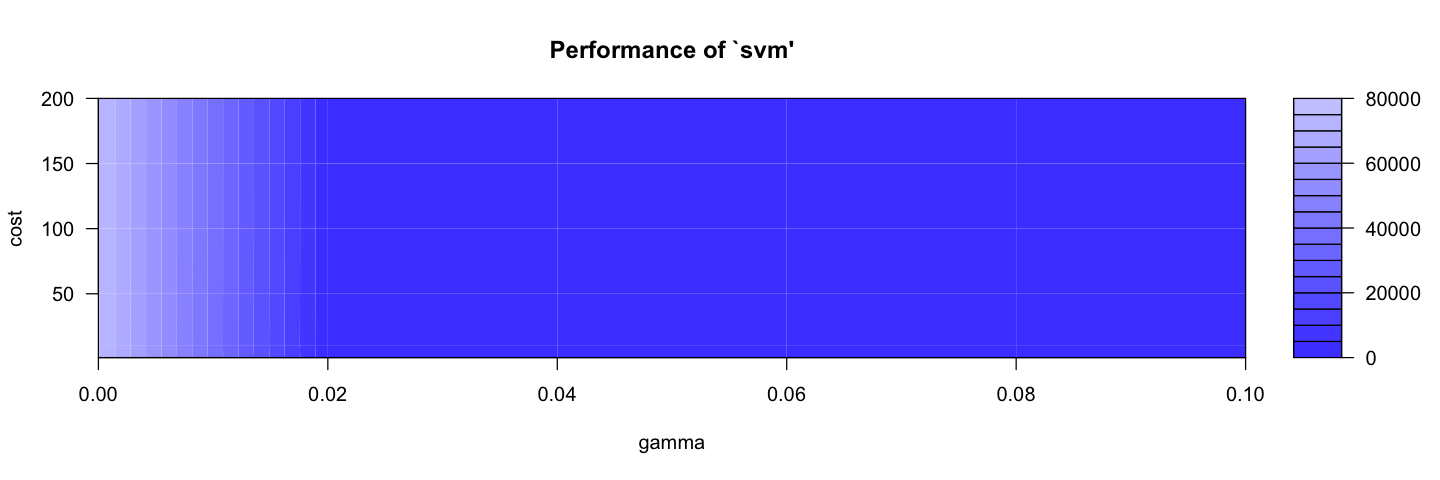

In [39]:
#set.seed(2021)
svm.reg.tune = tune.svm(Calories_Burned ~ ., data = datappr, type = "eps-regression", cost = c(1, 10, 50, 100, 150, 200), gamma = seq(0, 0.1, by = 0.02))
#traceback()
plot(svm.reg.tune)

Le plot que nous rend svm.reg.tune nous montre graphiquement pour quelles valeurs de cost et gamma on obtient les meilleurs résultats. On peut également directement récuperer ces valeurs grâce à l'option "$parameters" de svm.reg.tune, ce que nous allons faire dans la suite. 


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  269






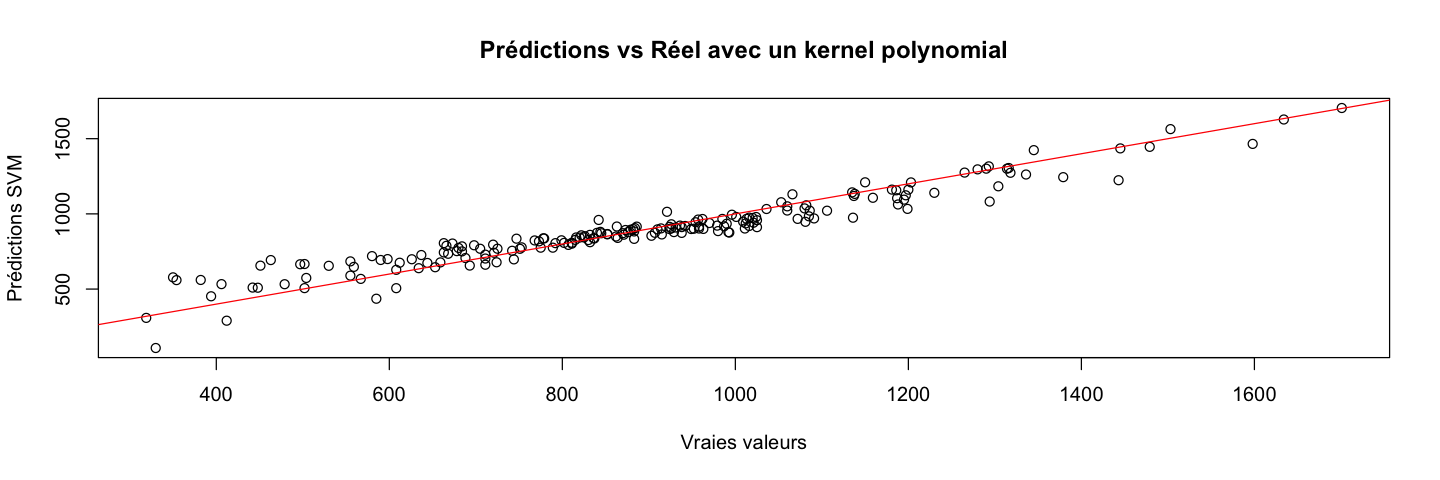

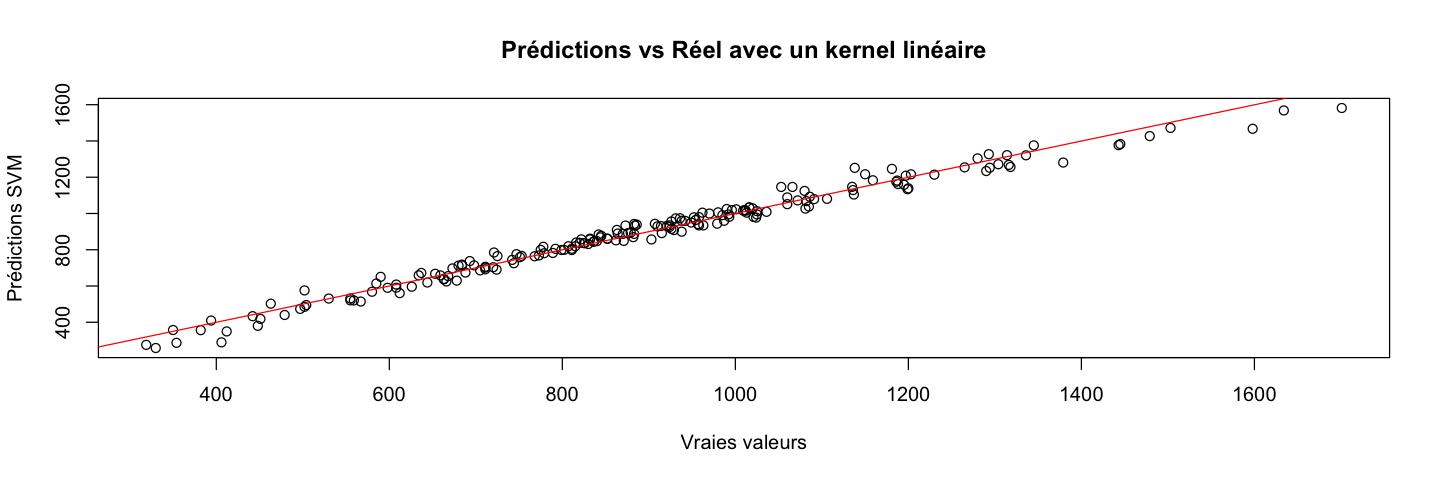

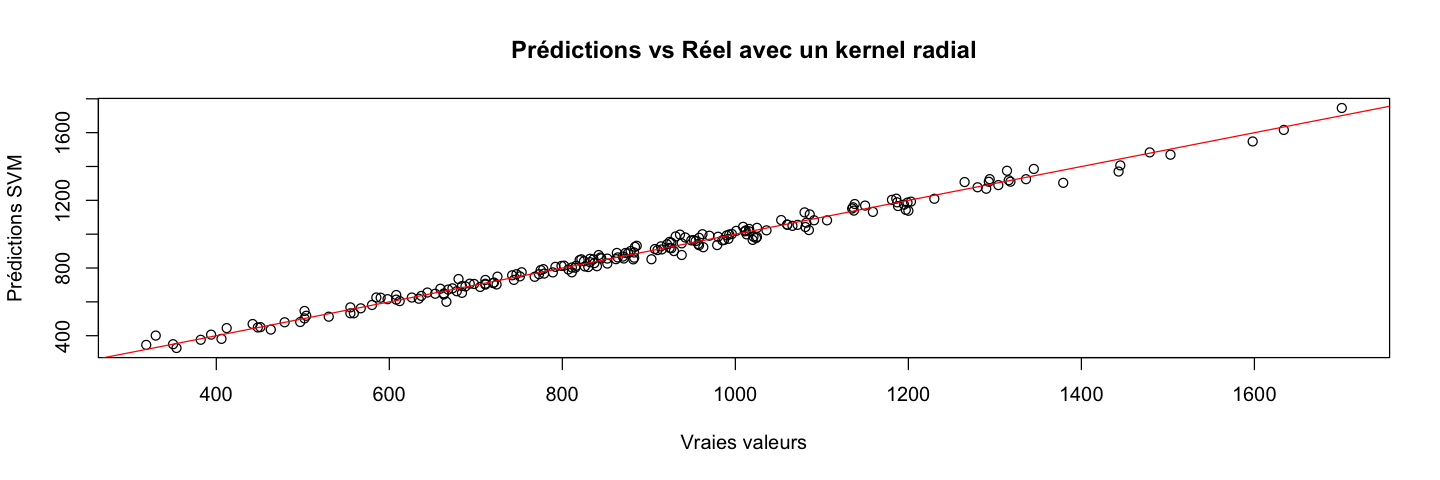

In [40]:
svm.reg = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)
summary(svm.reg)

# On récupère les meilleurs paramètres
best_cost <- svm.reg.tune$best.parameters$cost
best_gamma <- svm.reg.tune$best.parameters$gamma
# Entraînement du modèle final avec ces paramètres
final_model <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "polynomial",     
  cost = best_cost,
  gamma = best_gamma
)

final_model2 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "linear",     
  cost = best_cost,
  gamma = best_gamma
)

final_model3 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "radial",     
  cost = best_cost,
  gamma = best_gamma
)

#svm.reg.tune = tune.svm(Calories_Burned~., data = datappr, kernel = c("linear","polynomial", "radial"), cost=svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)
#best_ker <- svm.reg.tune$best.parameters$kernel
# Prédiction sur le jeu de test
y_pred <- predict(final_model, newdata = datestr)
y_pred2 <- predict(final_model2, newdata = datestr)
y_pred3 <- predict(final_model3, newdata = datestr)
plot(datestr$Calories_Burned, y_pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel polynomial")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred2,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel linéaire")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred3,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel radial")
abline(0, 1, col = "red")

#rmse_val <- rmse(datestr$Calories_Burned, y_pred)
#cat("RMSE sur test final :", rmse_val, "\n")

On remarque ici que les meilleurs résultats obtenus sont pour un kernel radial. On sélectionne ainsi le modèle avec les paramètres optimisés : n 
 SVM-Kernel:  radial 
       cost:  3.5 
      gamma:  0.02 
    epsilon:  0.1 


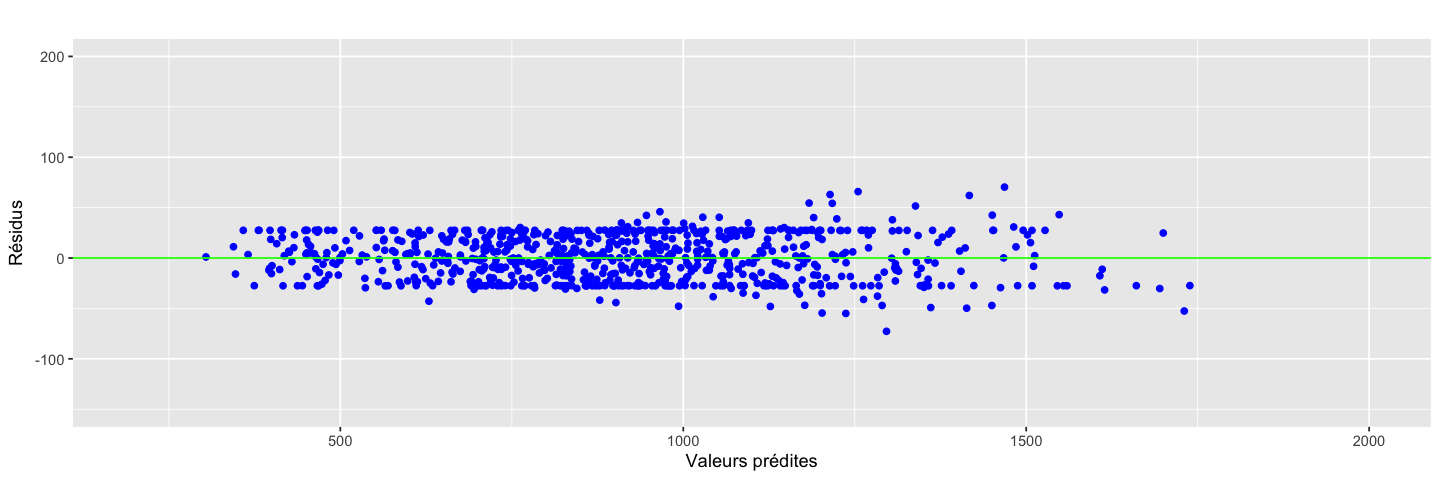

In [41]:
#calcul puis graphe des résidus
fit.svmr=fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"Calories_Burned"]
gplot.res(fit.svmr,res.svmr,titre="")

On observe bien ici un "effet couloir" sur les résidus de notre modèle SVM, ce qui signifie que les valeurs restent plus ou moins bien (à quelques valeurs près sur les bords) dans le couloir imposé par $\epsilon$.

In [42]:
cv_radial <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "radial",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_linear <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "linear",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_poly <- svm(Calories_Burned ~ ., data = datappr,
               type = "eps-regression", kernel = "polynomial",
               cost = best_cost, gamma = best_gamma, cross = 10)

# Voir les performances
summary(cv_radial)
summary(cv_linear)
summary(cv_poly)

Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”



Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "radial", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  269



10-fold cross-validation on training data:

Total Mean Squared Error: 929.0109 
Squared Correlation Coefficient: 0.9877146 
Mean Squared Errors:
 944.5171 791.2338 628.1257 1144.647 929.5019 955.391 929.0771 979.1218 999.8039 989.2272 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "linear", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  362



10-fold cross-validation on training data:

Total Mean Squared Error: 1680.304 
Squared Correlation Coefficient: 0.9777668 
Mean Squared Errors:
 1283.023 1705.686 1520.646 1799.505 1393.476 2047.977 1992.428 1998.937 1356.297 1704.692 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "polynomial", cost = best_cost, gamma = best_gamma, 
    cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.02 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  524



10-fold cross-validation on training data:

Total Mean Squared Error: 6698.671 
Squared Correlation Coefficient: 0.916809 
Mean Squared Errors:
 6586.752 6950.445 5060.454 7412.418 6086.738 7109.458 6246.146 7122.211 8210.233 6205.683 




On valide notre modèle par validation croisée, avec k=10. On obtient que le kernel radial a une bien meilleure performance avec une erreur quadratique moyenne totale de 914,51 (soit un équivalent calorique d'environ 6 cacahuètes, ce qui est une erreur raisonnable). En revanche, le kernel polynomial a une erreur quadratique moyenne totale de 12 844 (soit 113 cacahuètes!). Cela vient confirmer le fait que notre meilleur modèle découle d'un kernel radial. 

## Arbre optimal

### Arbre de régression

In [43]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001))

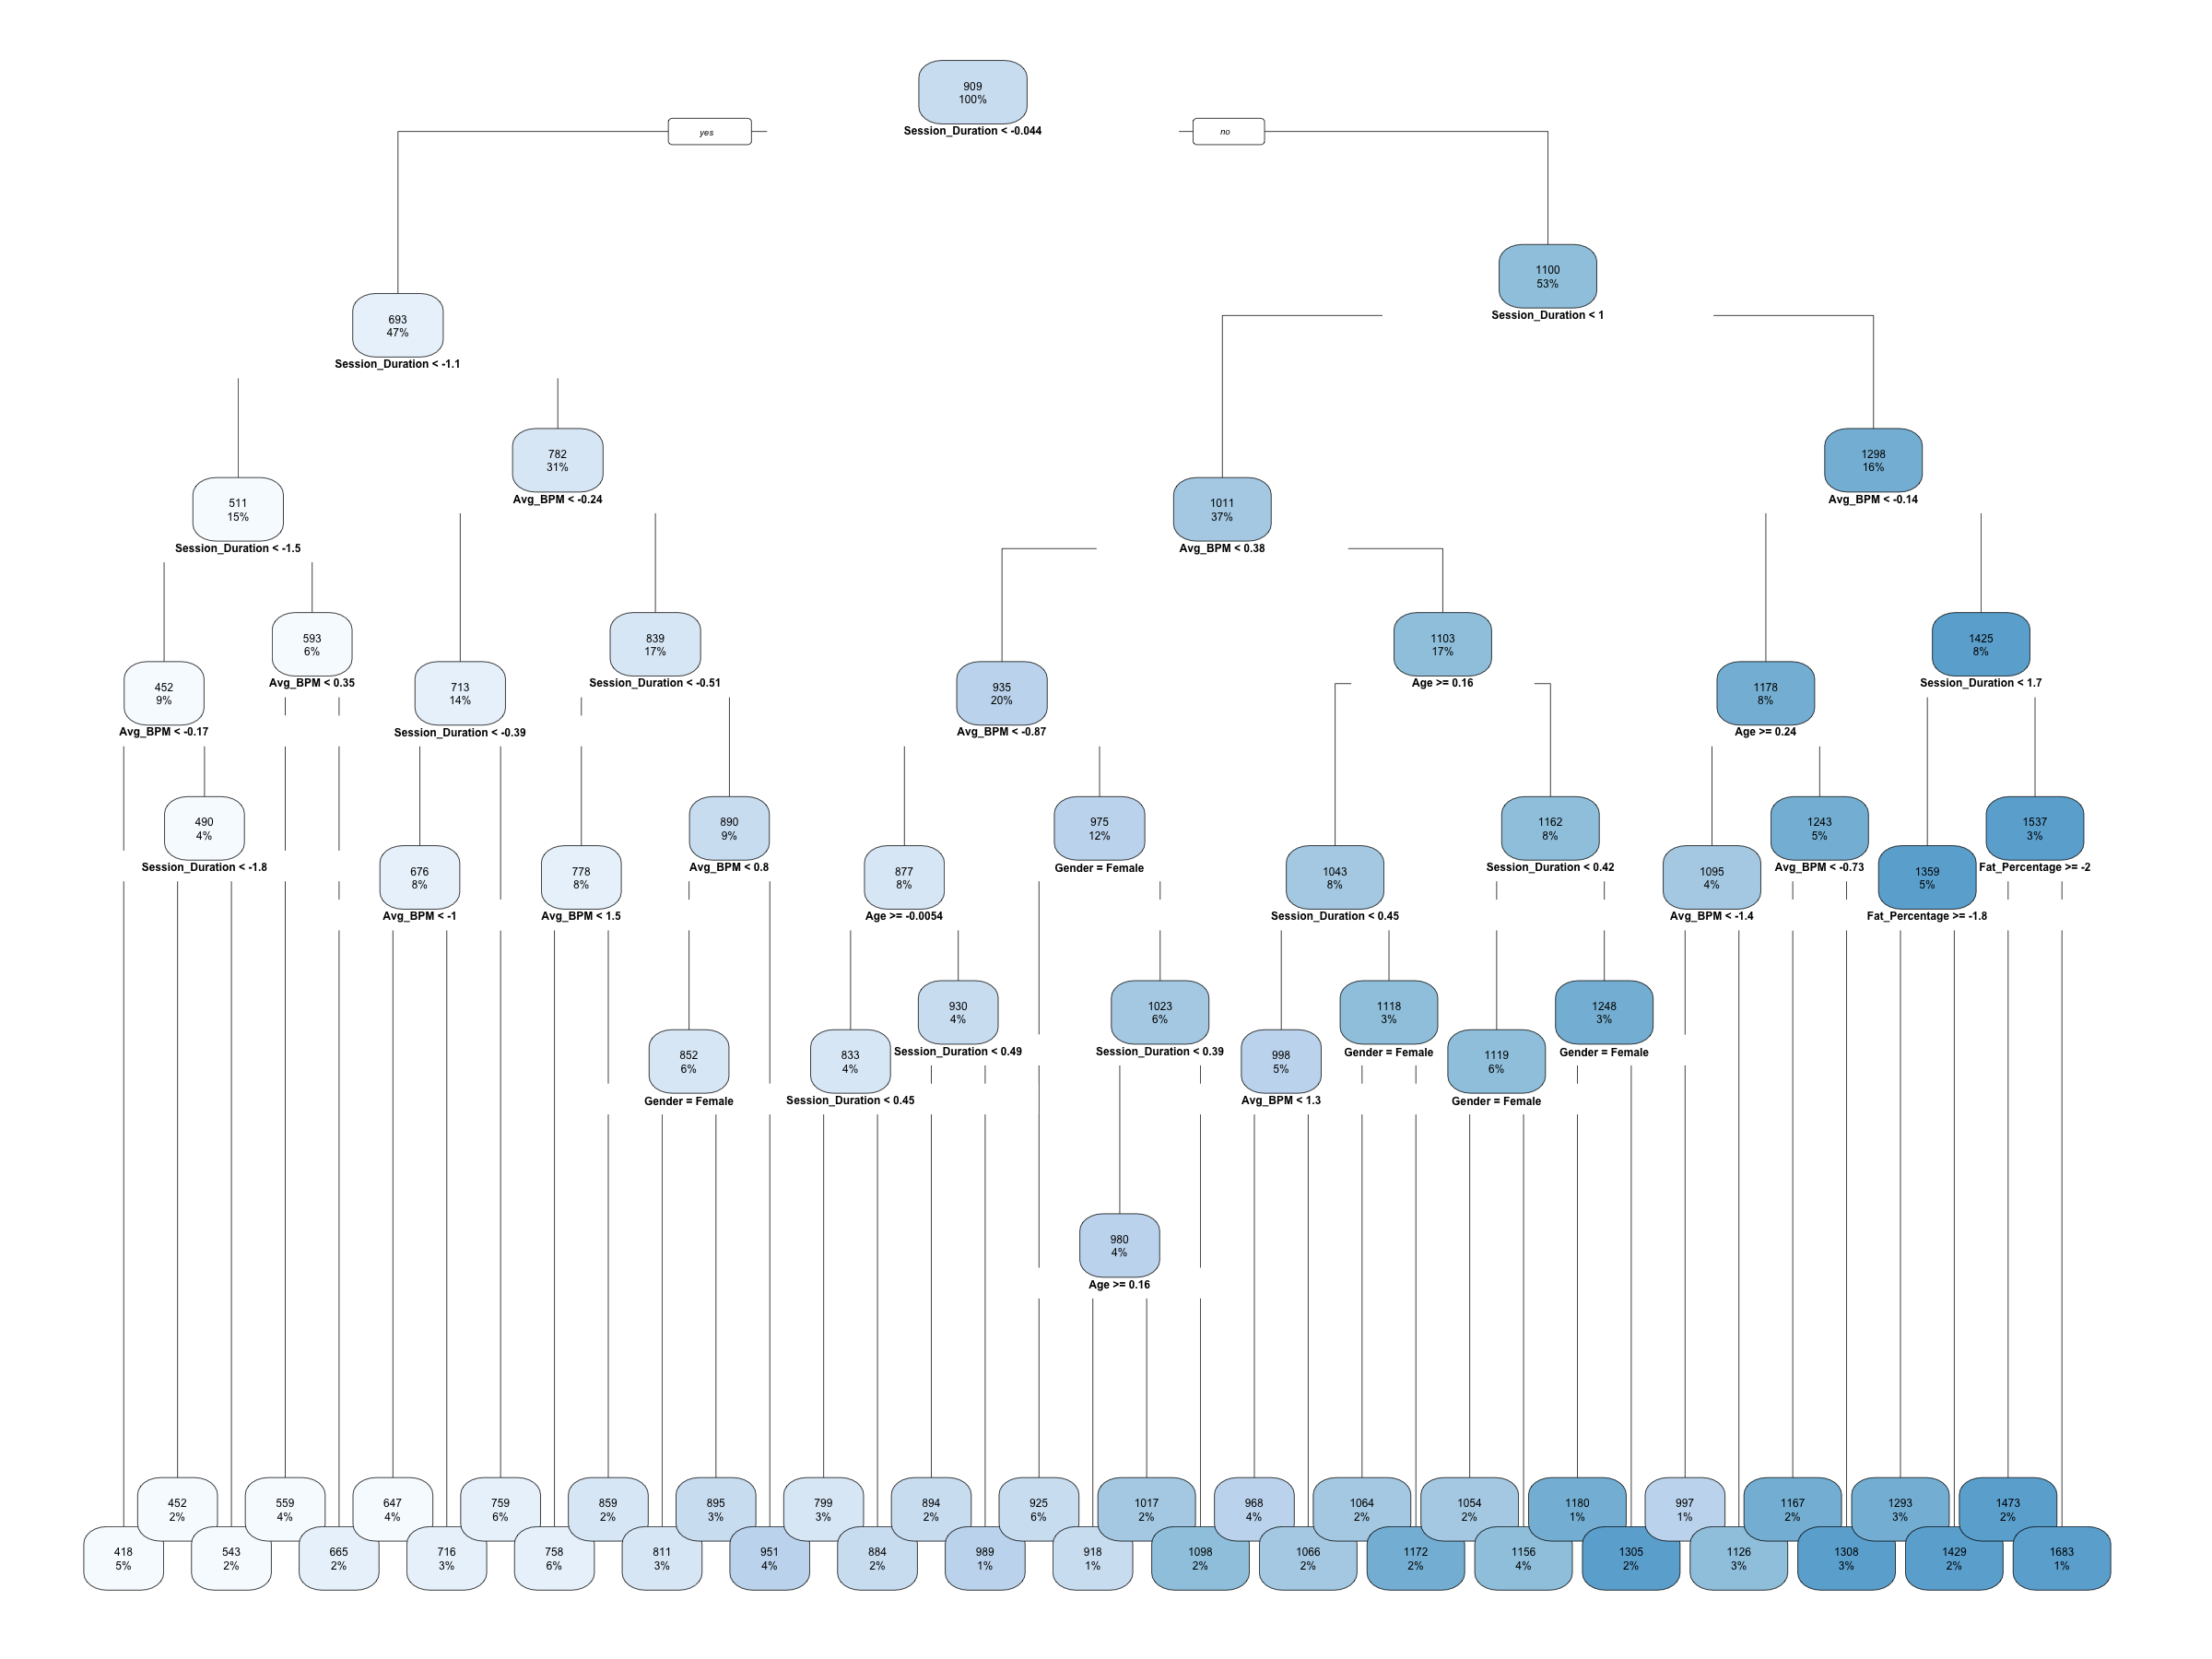

In [44]:
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree.reg, cex = 0.6)

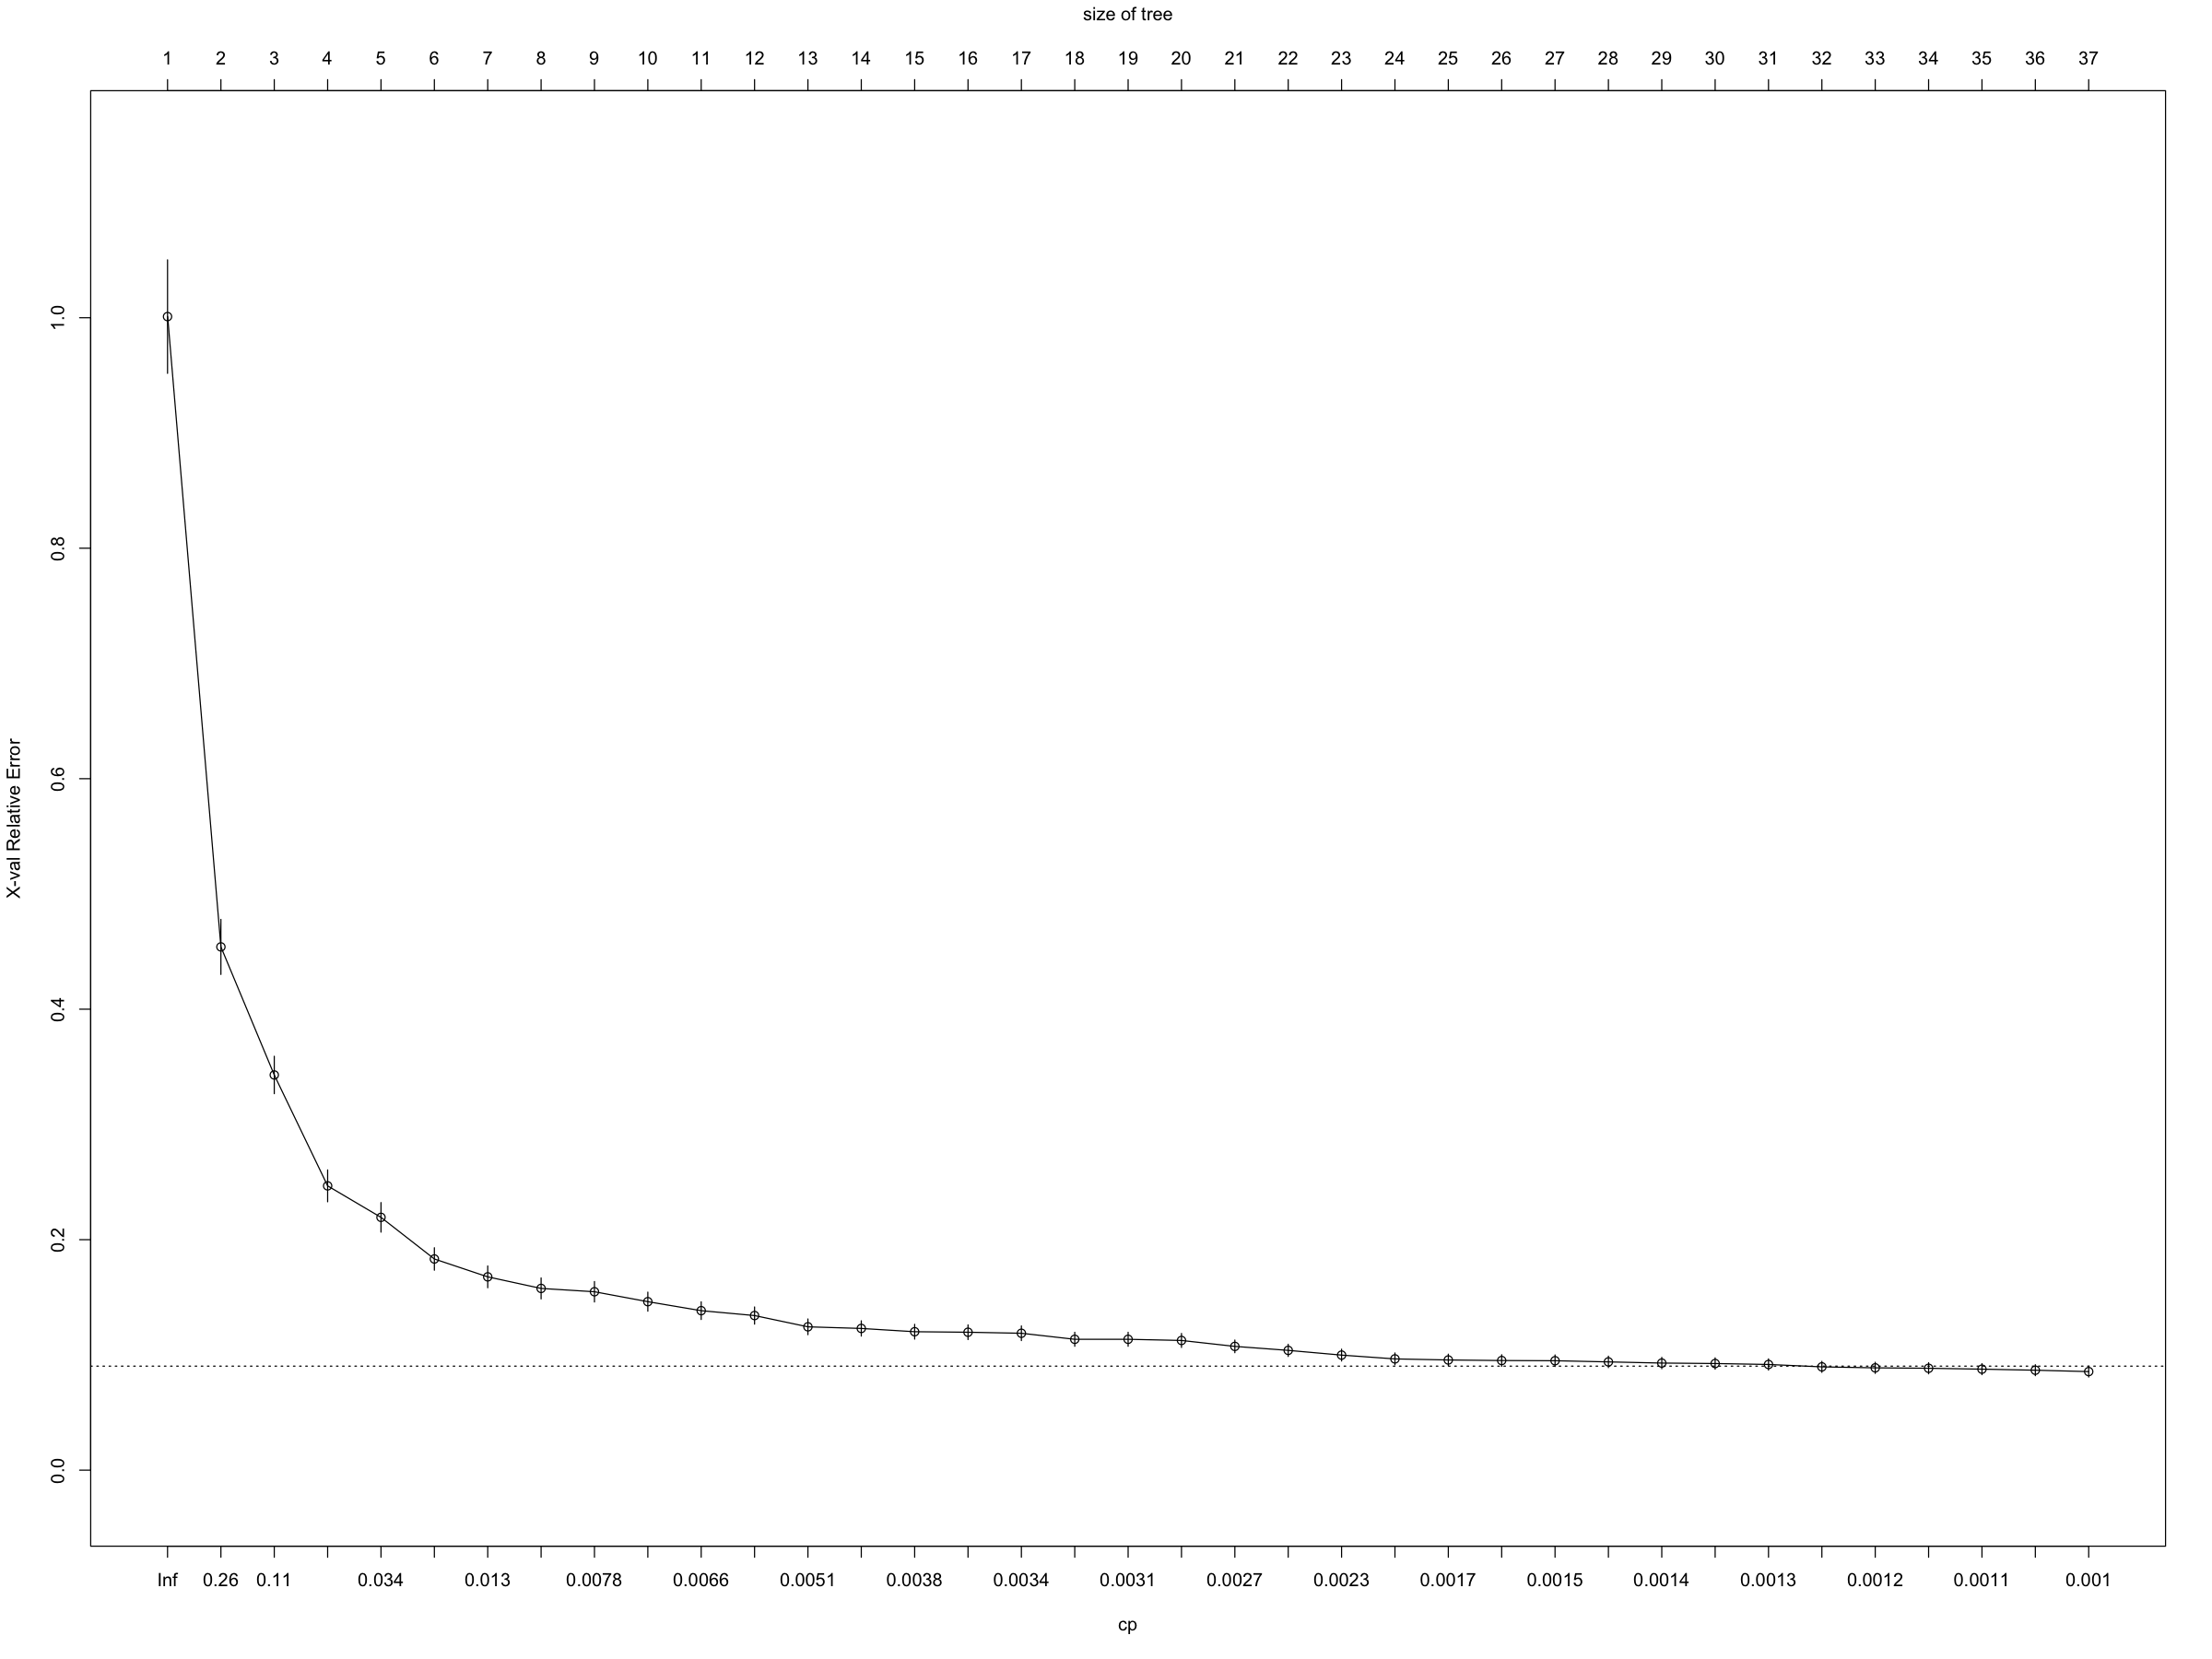

In [45]:
xmat<-xpred.rpart(tree.reg,xval=5)

CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

En fait on sait pas à quel point on doit simplifier, si on ne simplifie pas la MSE est la meilleure mais on doit quand même élaguer donc j'ai essayé de combiner les deux mais en gros je sais pas trop dans quel sens on est sensé optimiser.

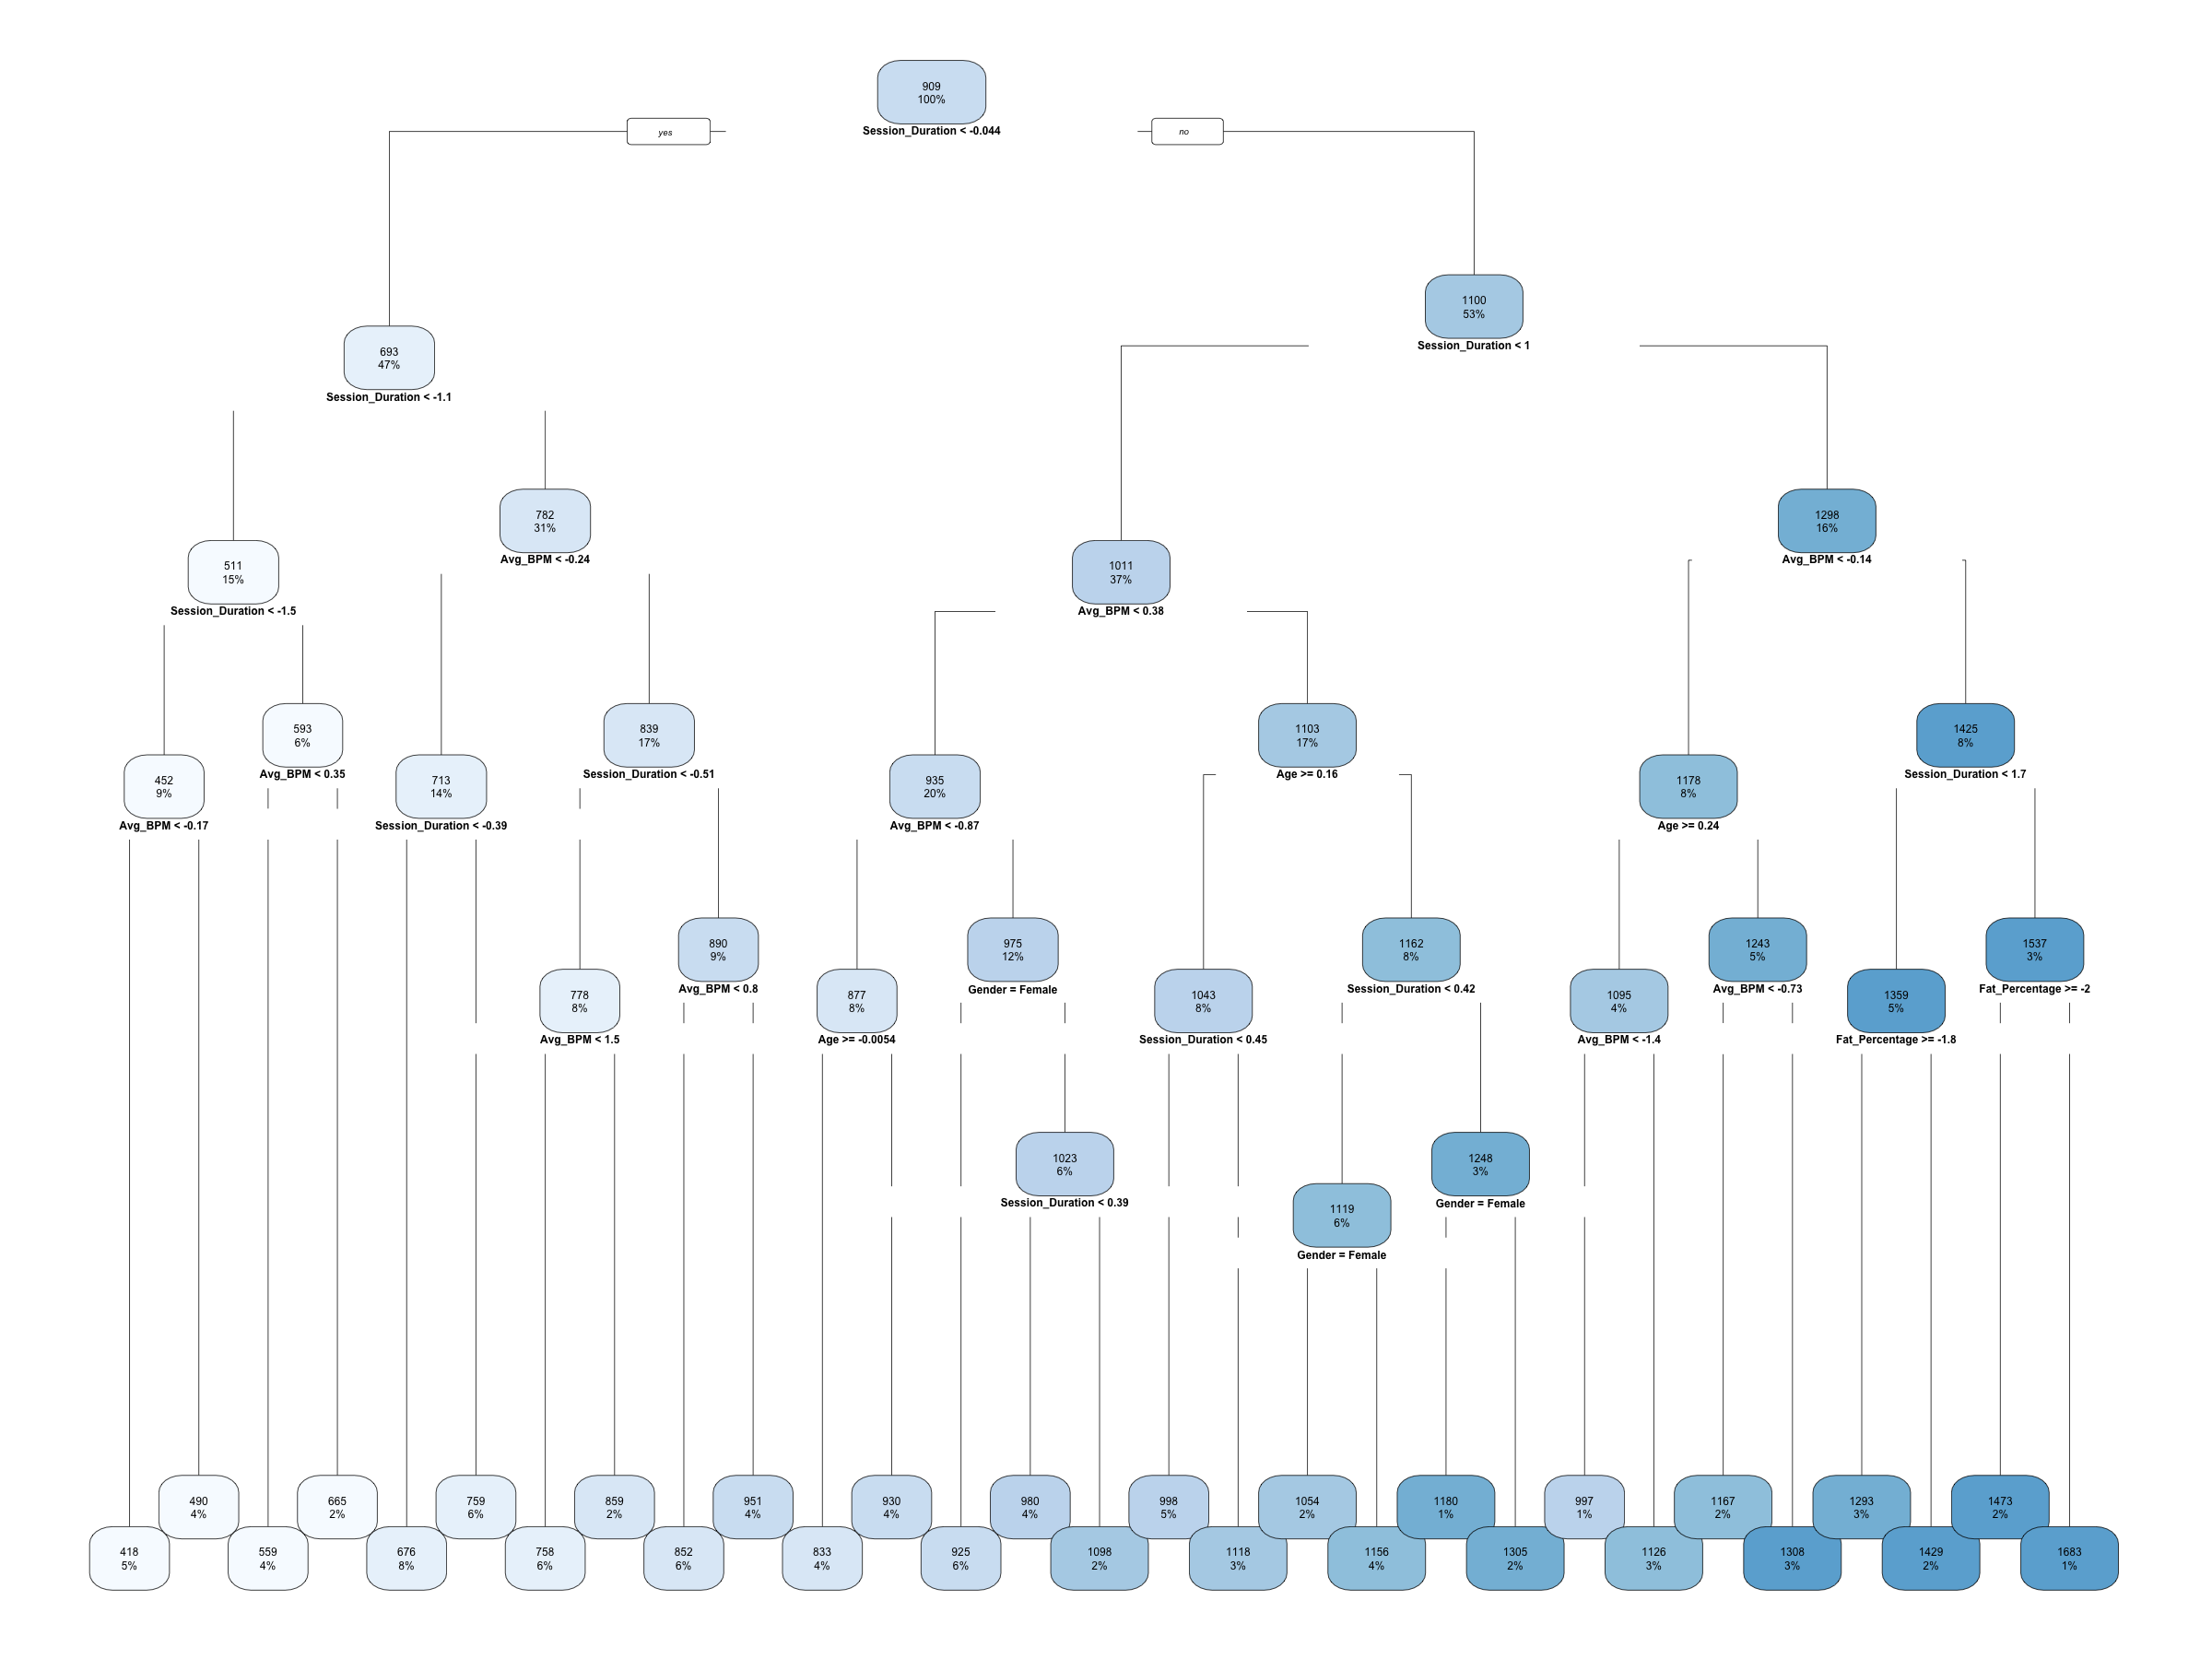

In [46]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.0014))
rpart.plot(tree.reg, cex=0.6)

### Prévision de l'échantillon test

In [47]:
library(yardstick)
library(dplyr)
library(tibble)

Warning message:
“le package ‘yardstick’ a été compilé avec la version R 4.4.1”

Attachement du package : ‘yardstick’


Les objets suivants sont masqués depuis ‘package:Metrics’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape


L'objet suivant est masqué depuis ‘package:readr’:

    spec




In [48]:
pred.treer=predict(tree.reg,newdata=datestr)

results <- tibble(
  truth = datestr[["Calories_Burned"]],
  prediction = pred.treer
)

mse <- results %>%
  summarise(mse = mean((prediction - truth)^2)) %>%
  pull(mse)

conf_matrix <- results %>%
  mutate(
    truth_class = factor(truth > 890, levels = c(FALSE, TRUE)),
    pred_class  = factor(prediction > 890, levels = c(FALSE, TRUE))
  ) %>%
  conf_mat(truth = truth_class, estimate = pred_class)

print(mse)
print(conf_matrix)

[1] 5916.91
          Truth
Prediction FALSE TRUE
     FALSE    89    8
     TRUE     13   85


Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_point()`).”


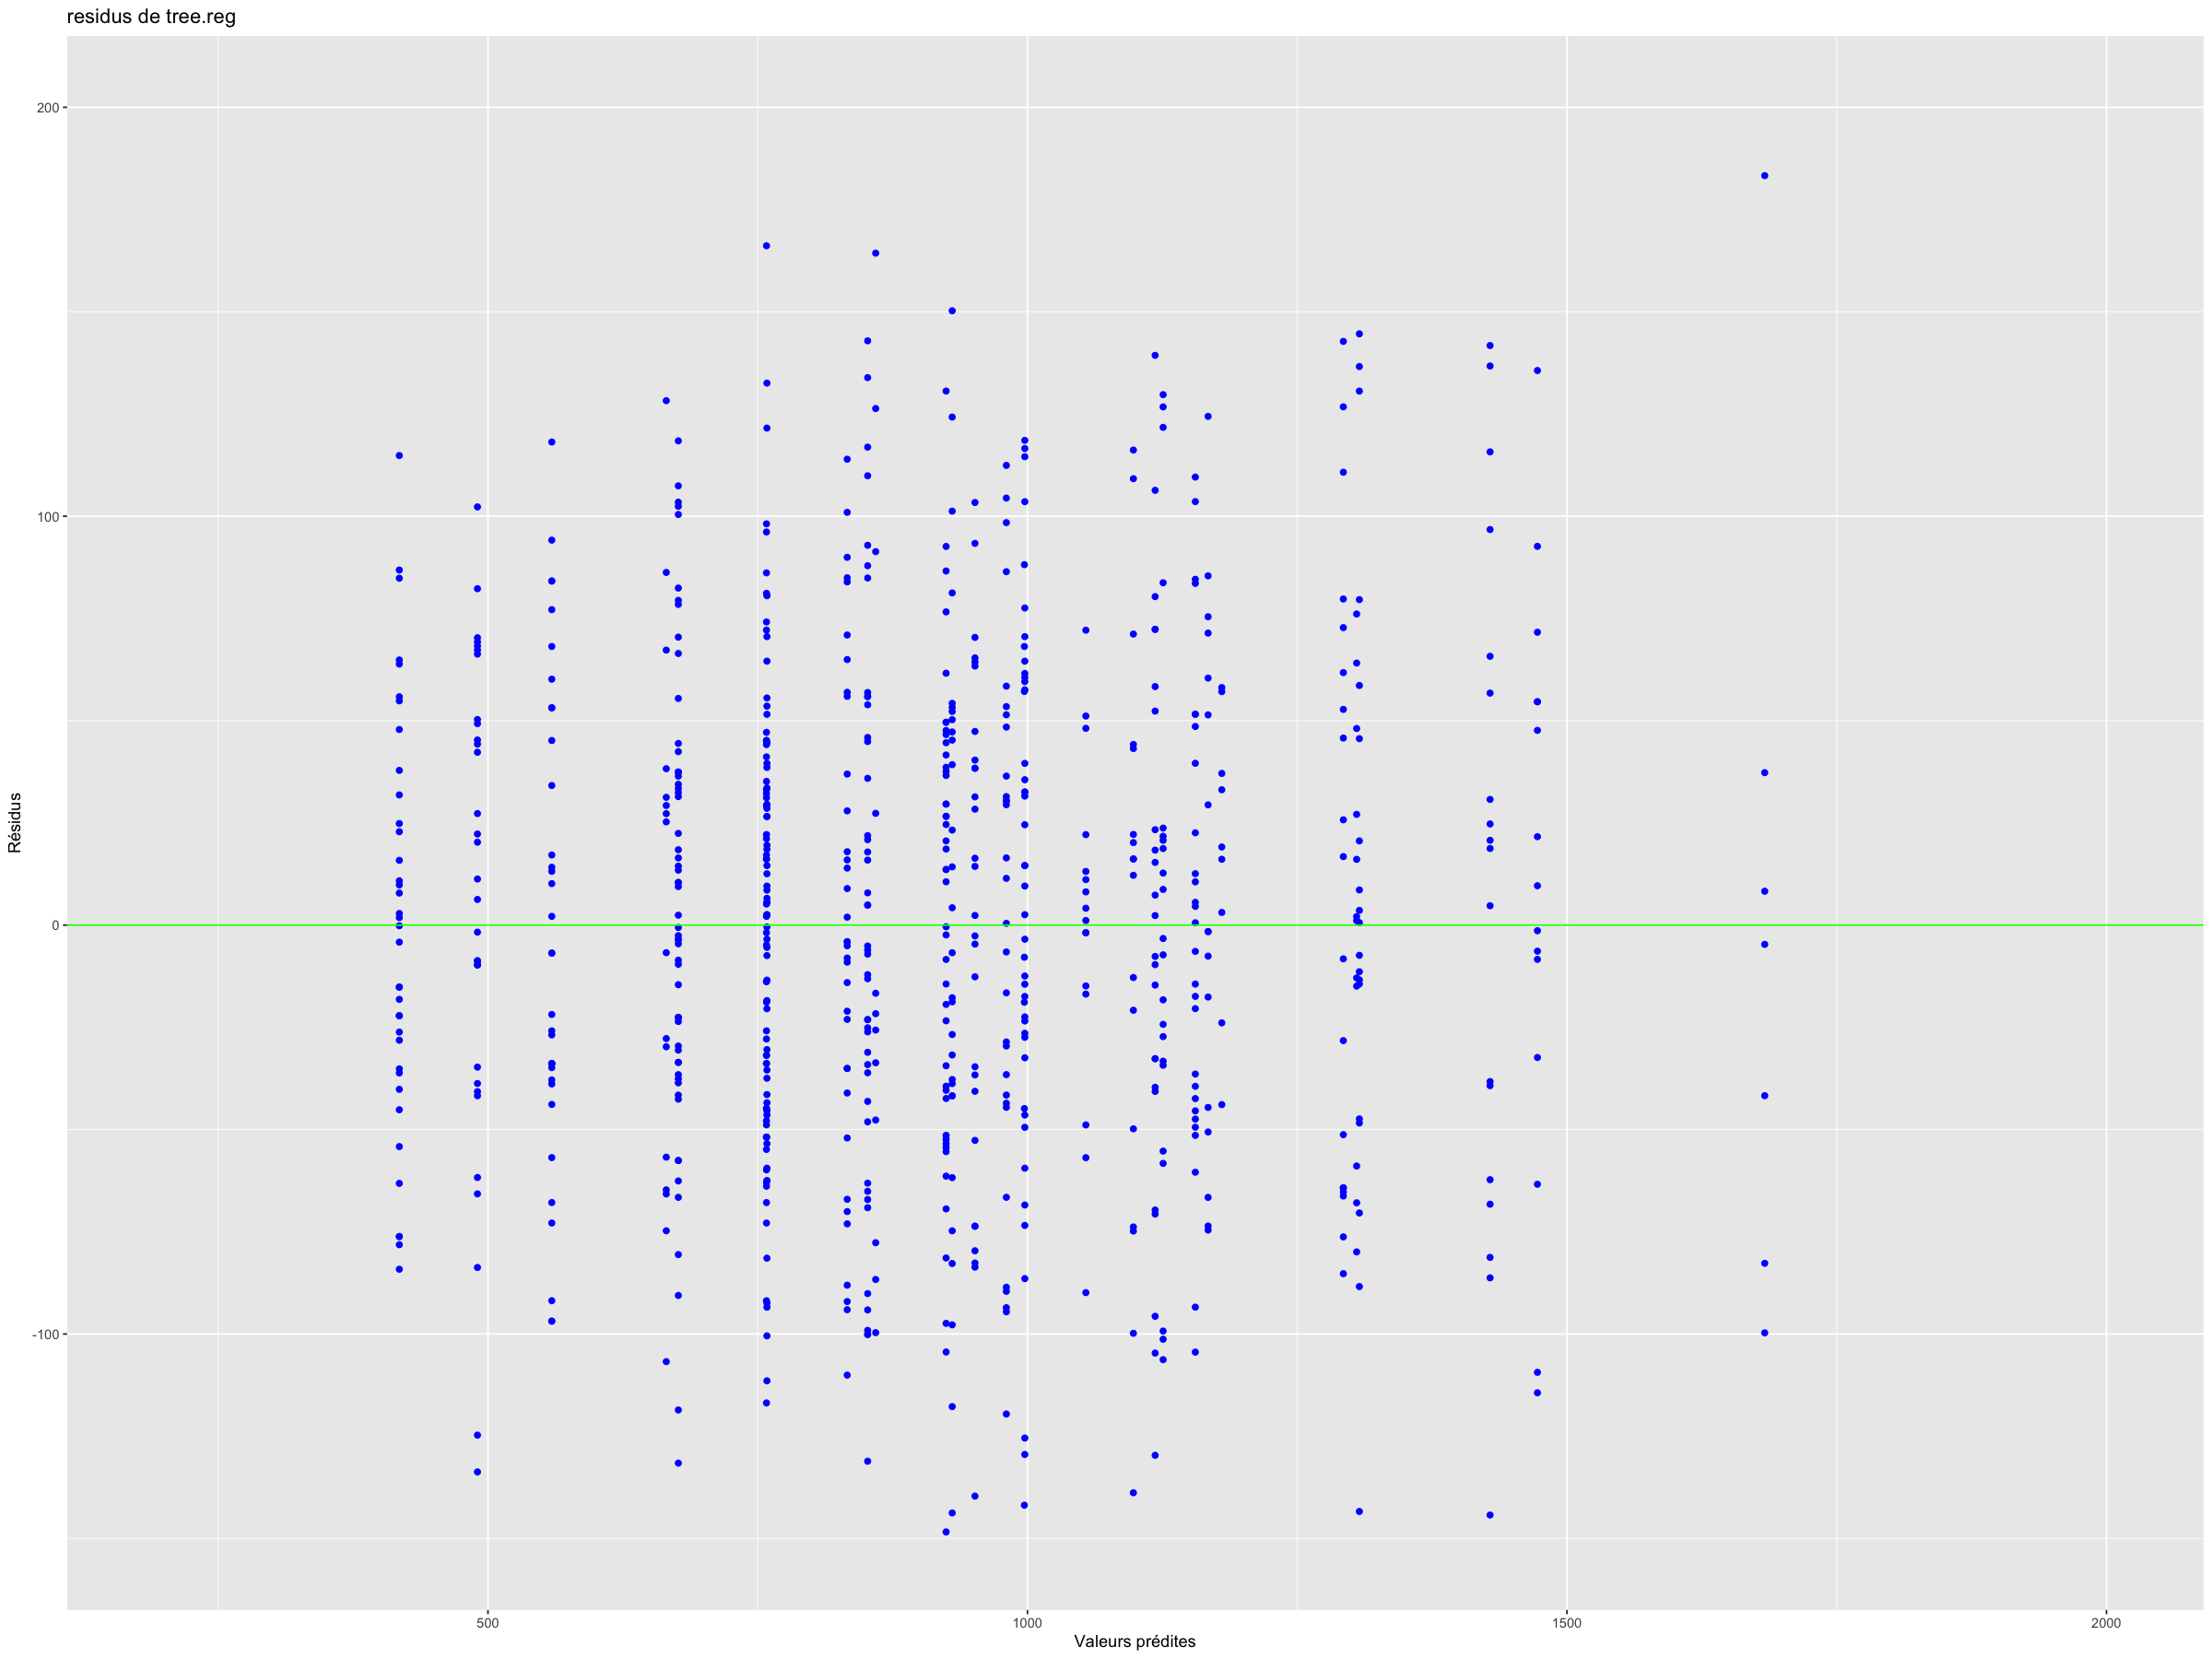

In [49]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

## Forêt aléatoire

### Régression

In [50]:


library(randomForest)
library(e1071)

Warning message:
“le package ‘randomForest’ a été compilé avec la version R 4.4.1”
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




In [51]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-2],ytest=datestr[,"Calories_Burned"],
   ntree=500,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     5054     6.71 | 1.436e+04    20.56 |
 100 |     4525     6.01 | 1.45e+04    20.76 |
 150 |     4361     5.79 | 1.444e+04    20.68 |
 200 |     4341     5.77 | 1.444e+04    20.67 |
 250 |     4202     5.58 | 1.451e+04    20.77 |
 300 |     4104     5.45 | 1.438e+04    20.59 |
 350 |     4118     5.47 | 1.448e+04    20.72 |
 400 |     4063     5.40 | 1.457e+04    20.86 |
 450 |     4068     5.40 | 1.451e+04    20.77 |
 500 |     4024     5.35 | 1.449e+04    20.75 |


In [ ]:
rf.reg.tune1=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 200, mtry = c(6,7,8,9,10,11,12,13,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune1) 
plot(rf.reg.tune1$performances$mtry, rf.reg.tune1$performances$error, type = 'b')







In [ ]:
rf.reg.tune2=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 300, mtry = c(6,7,8,9,10,11,12,13,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune2) 
plot(rf.reg.tune2$performances$mtry, rf.reg.tune2$performances$error, type = 'b')


In [ ]:
rf.reg.tune3=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 400, mtry = c(6,7,8,9,10,11,12,13,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune3) 
plot(rf.reg.tune3$performances$mtry, rf.reg.tune3$performances$error, type = 'b')


In [ ]:
rf.reg.tune4=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 500, mtry = c(6,7,8,9,10,11,12,13,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune4) 
plot(rf.reg.tune4$performances$mtry, rf.reg.tune4$performances$error, type = 'b')


In [ ]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-2],ytest=datestr[,"Calories_Burned"],
   ntree=200,do.trace=50,importance=TRUE, mtry=12)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


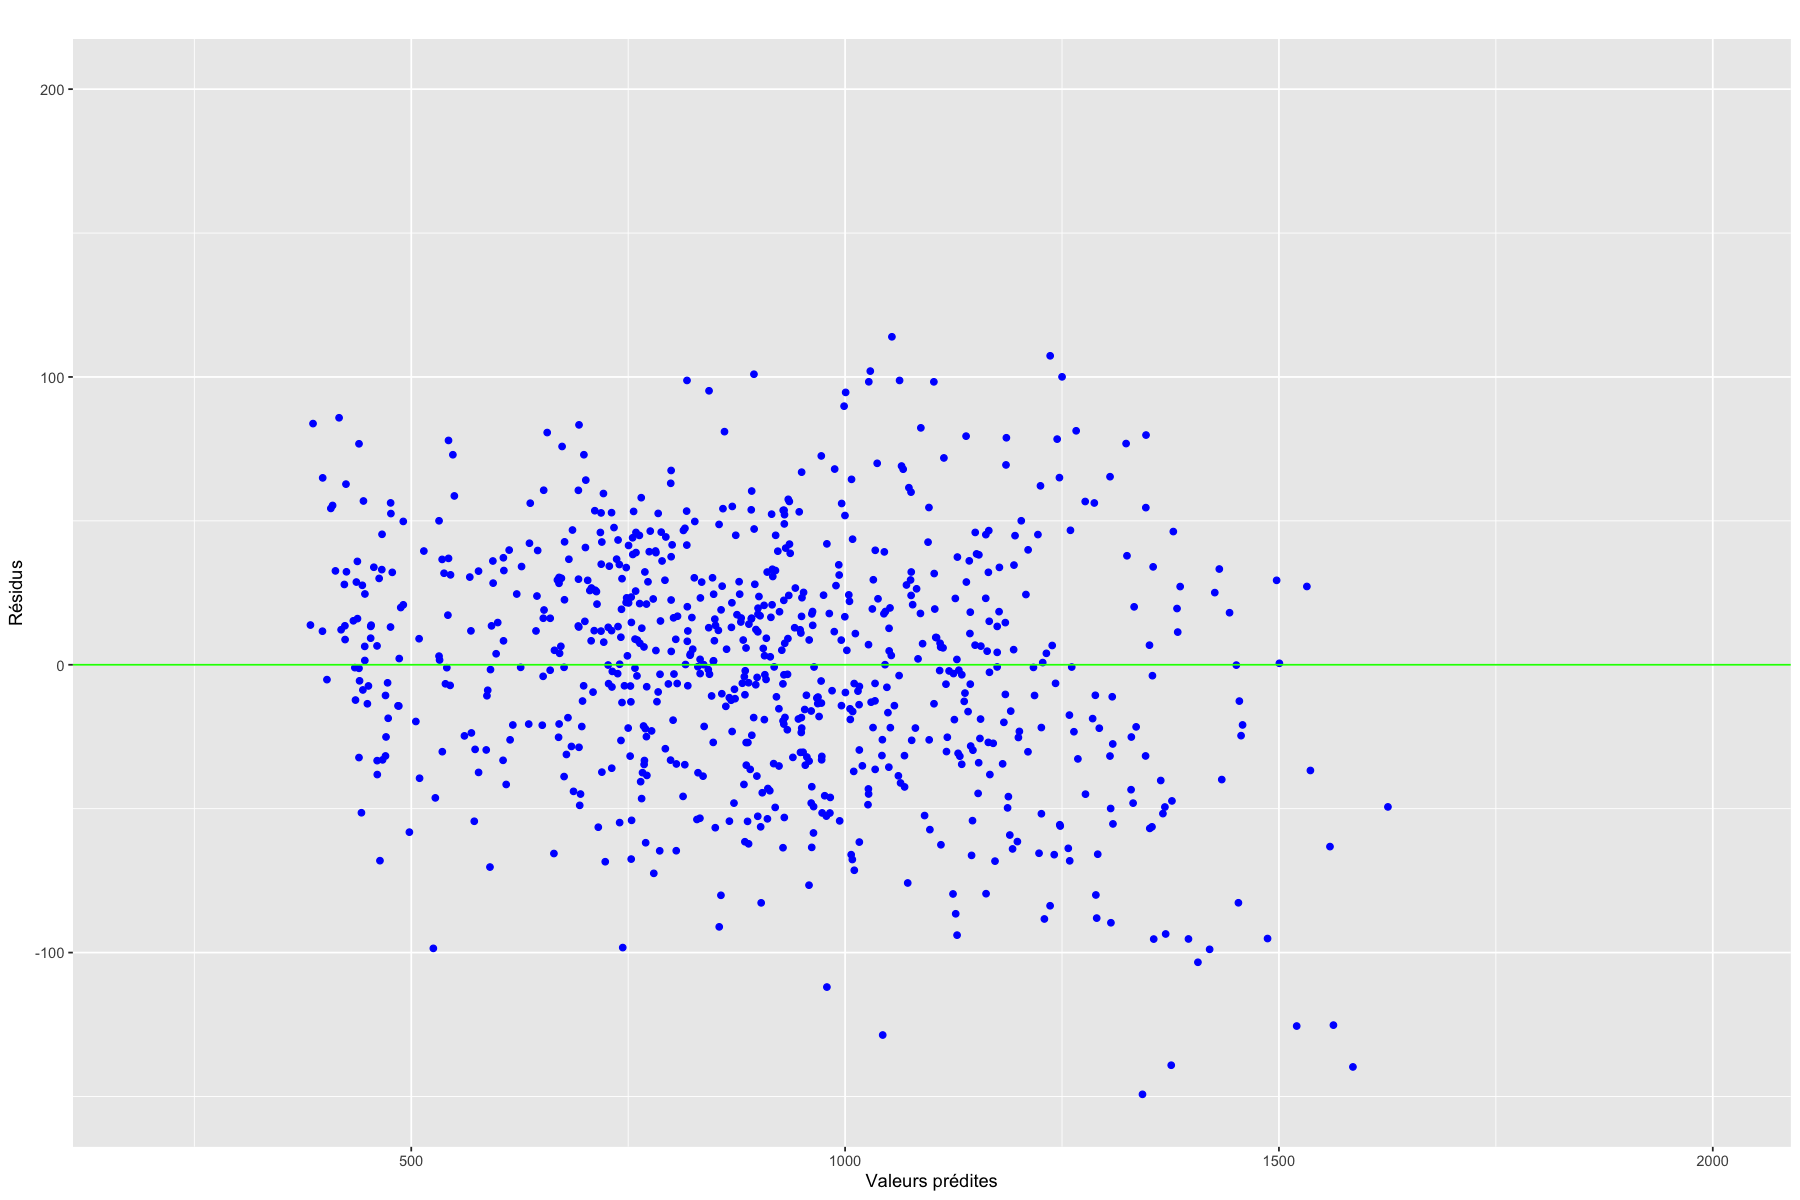

In [55]:
options(repr.plot.width = 15, repr.plot.height = 10)
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

In [56]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)

Avg_BPM  Session_Duration               Age            Gender 
            89.62             50.92             41.84             23.75 
      Weight..kg.      Water_Intake    Fat_Percentage  Experience_Level 
             9.56              9.37              9.08              7.56 
       Height..m.               BMI Workout_Frequency       Resting_BPM 
             6.97              4.41              1.96              1.47 
     Workout_Type           Max_BPM 
             0.57             -1.91

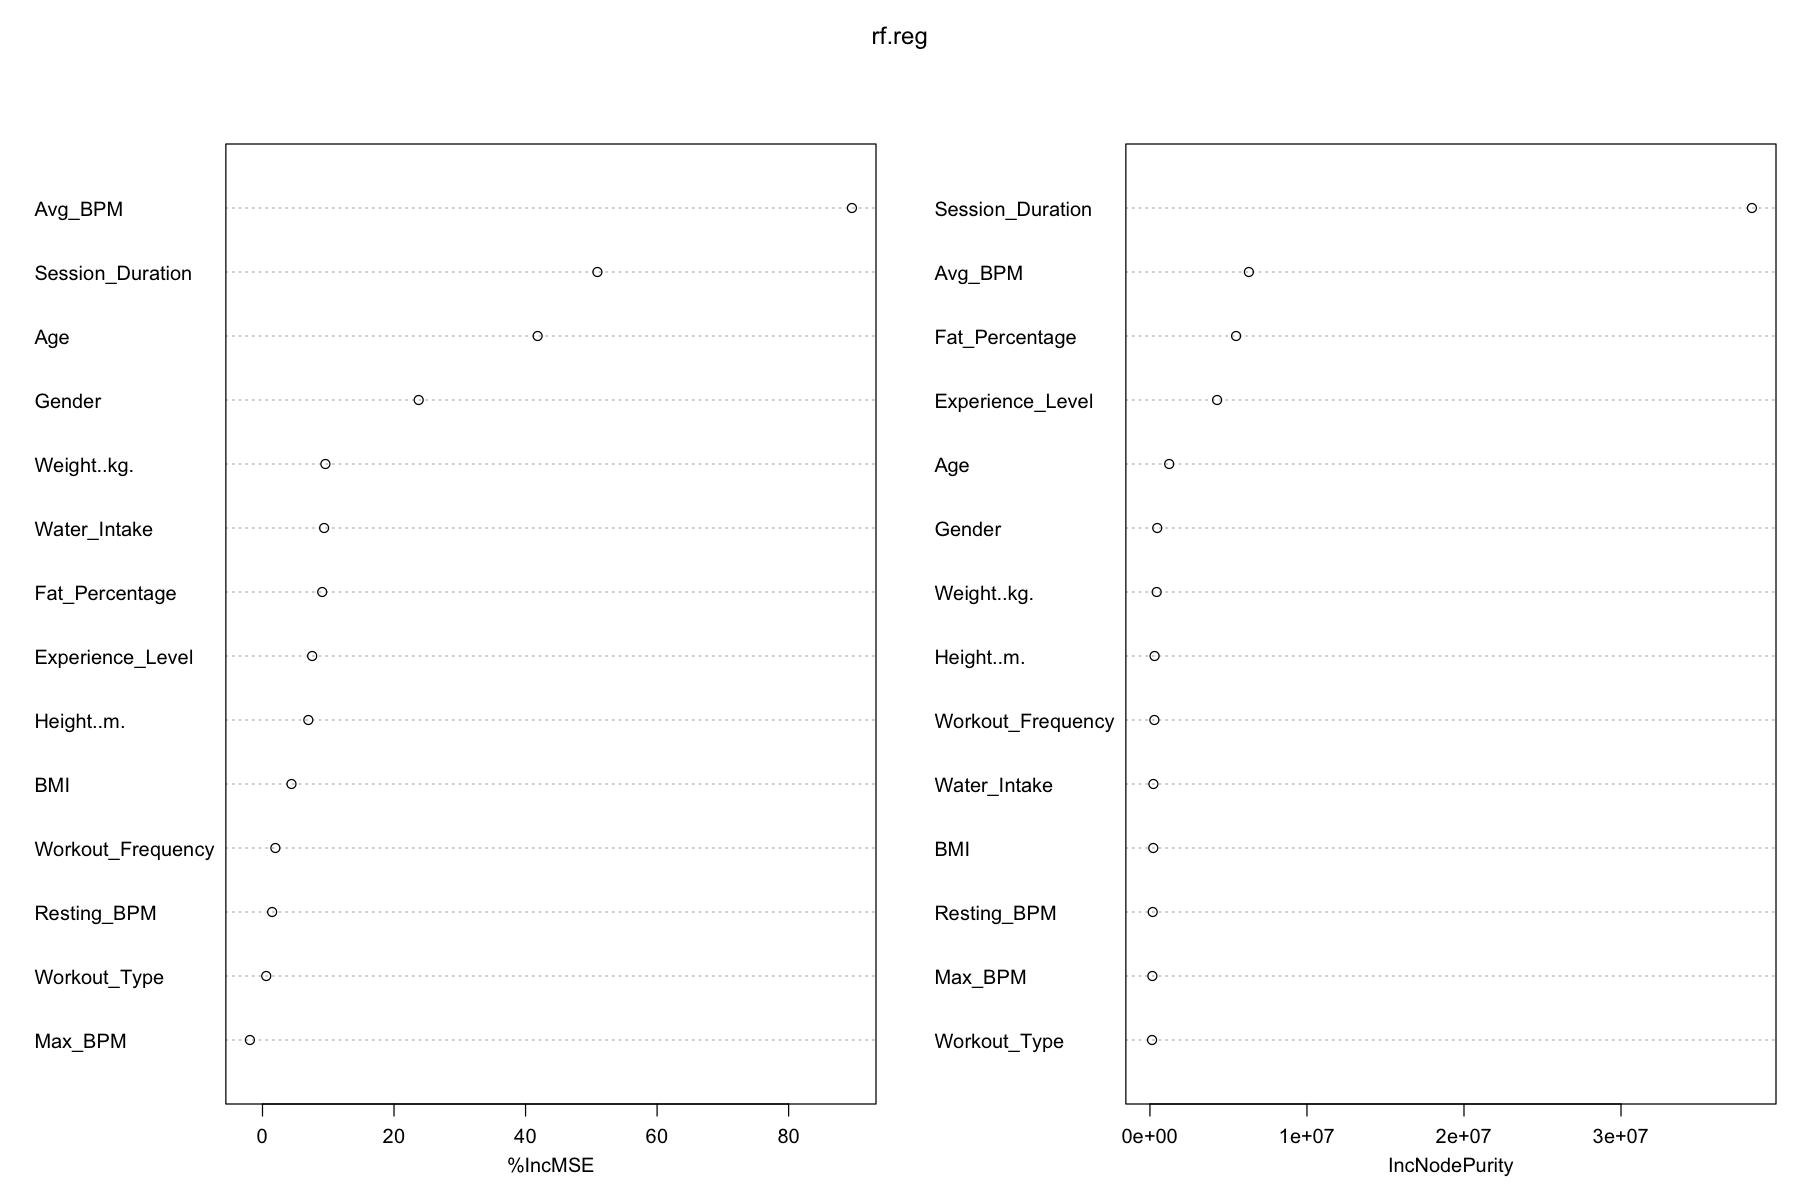

In [57]:
varImpPlot(rf.reg)

### Echantillon Test

In [58]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)

table(pred.rfr>890,datestr[,"Calories_Burned"]>890)

[1] 18517.04

       
        FALSE TRUE
  FALSE    84   12
  TRUE     18   81

## Boosting

In [59]:

library(gbm)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 1000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



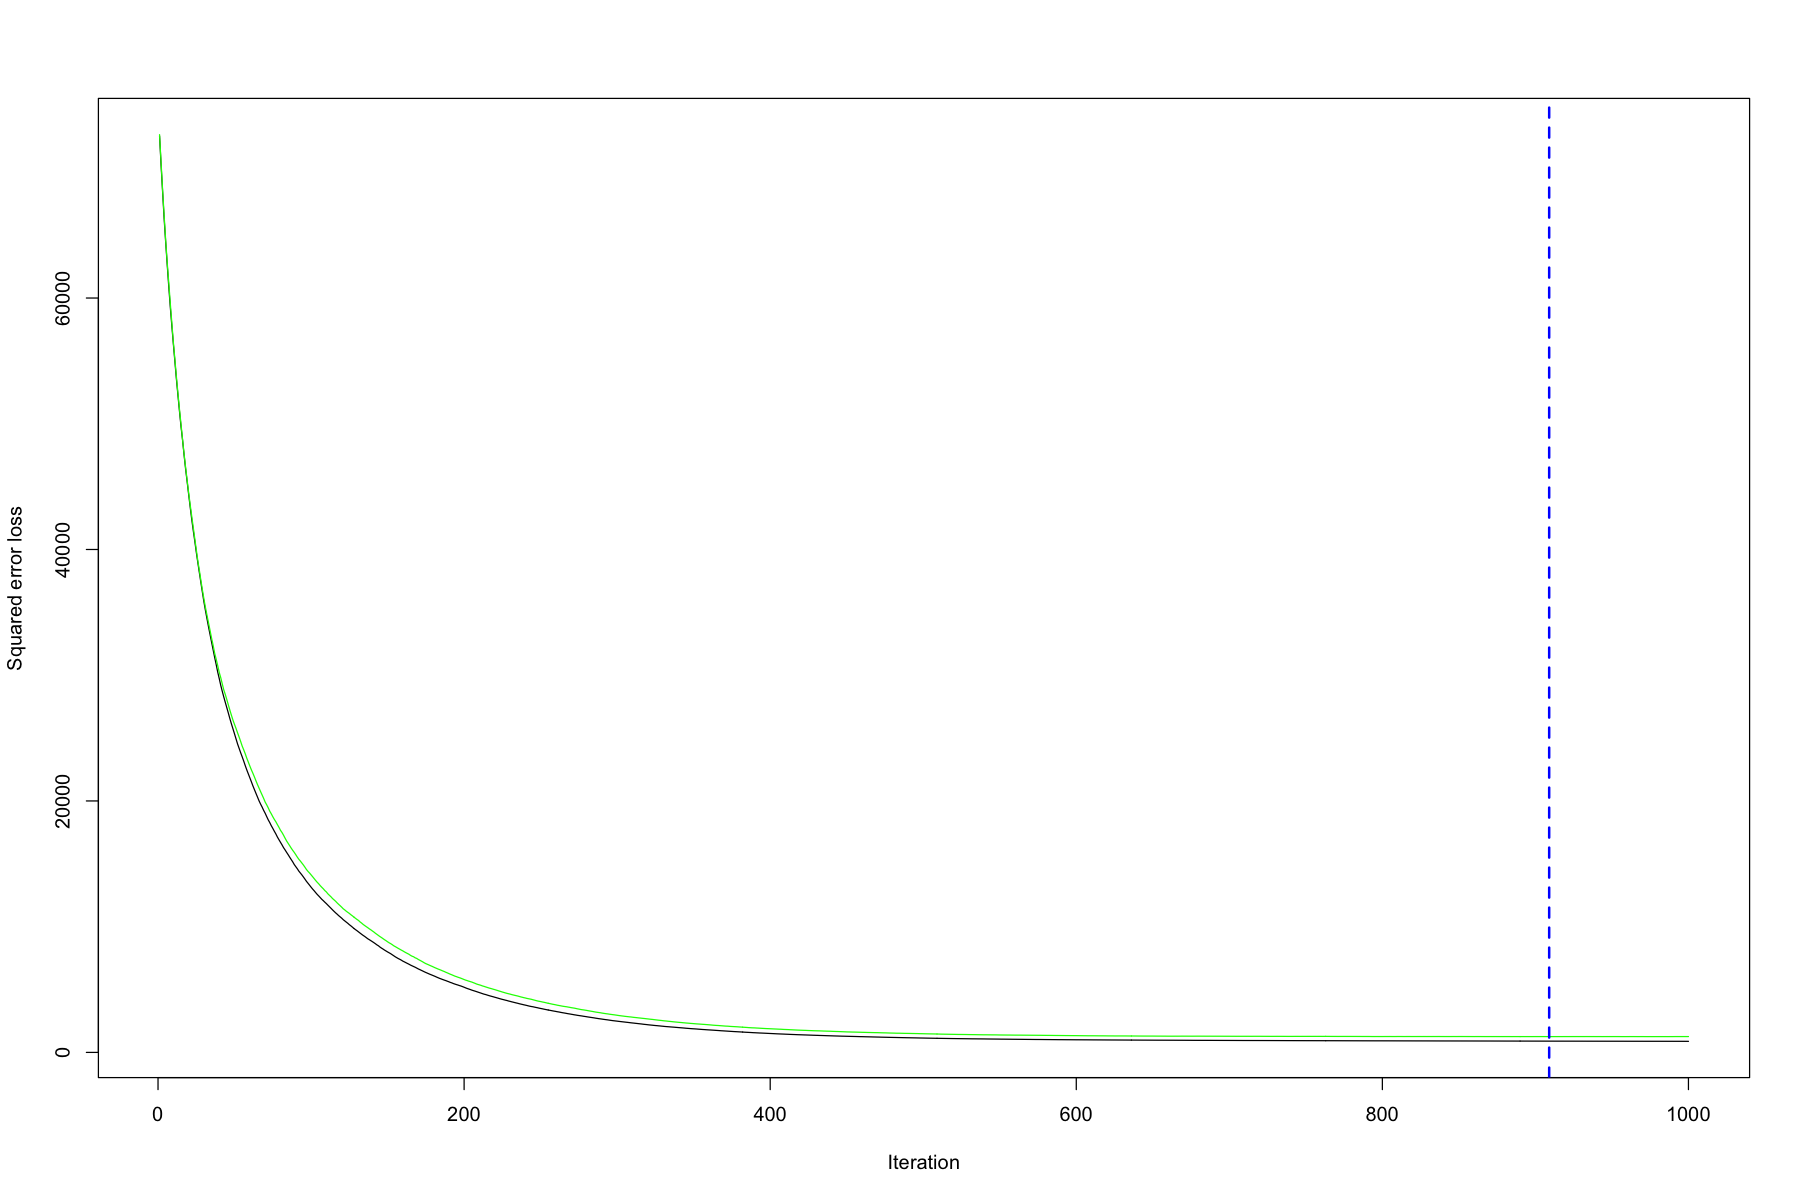

In [60]:
best.iter=gbm.perf(boost.reg,method="cv")

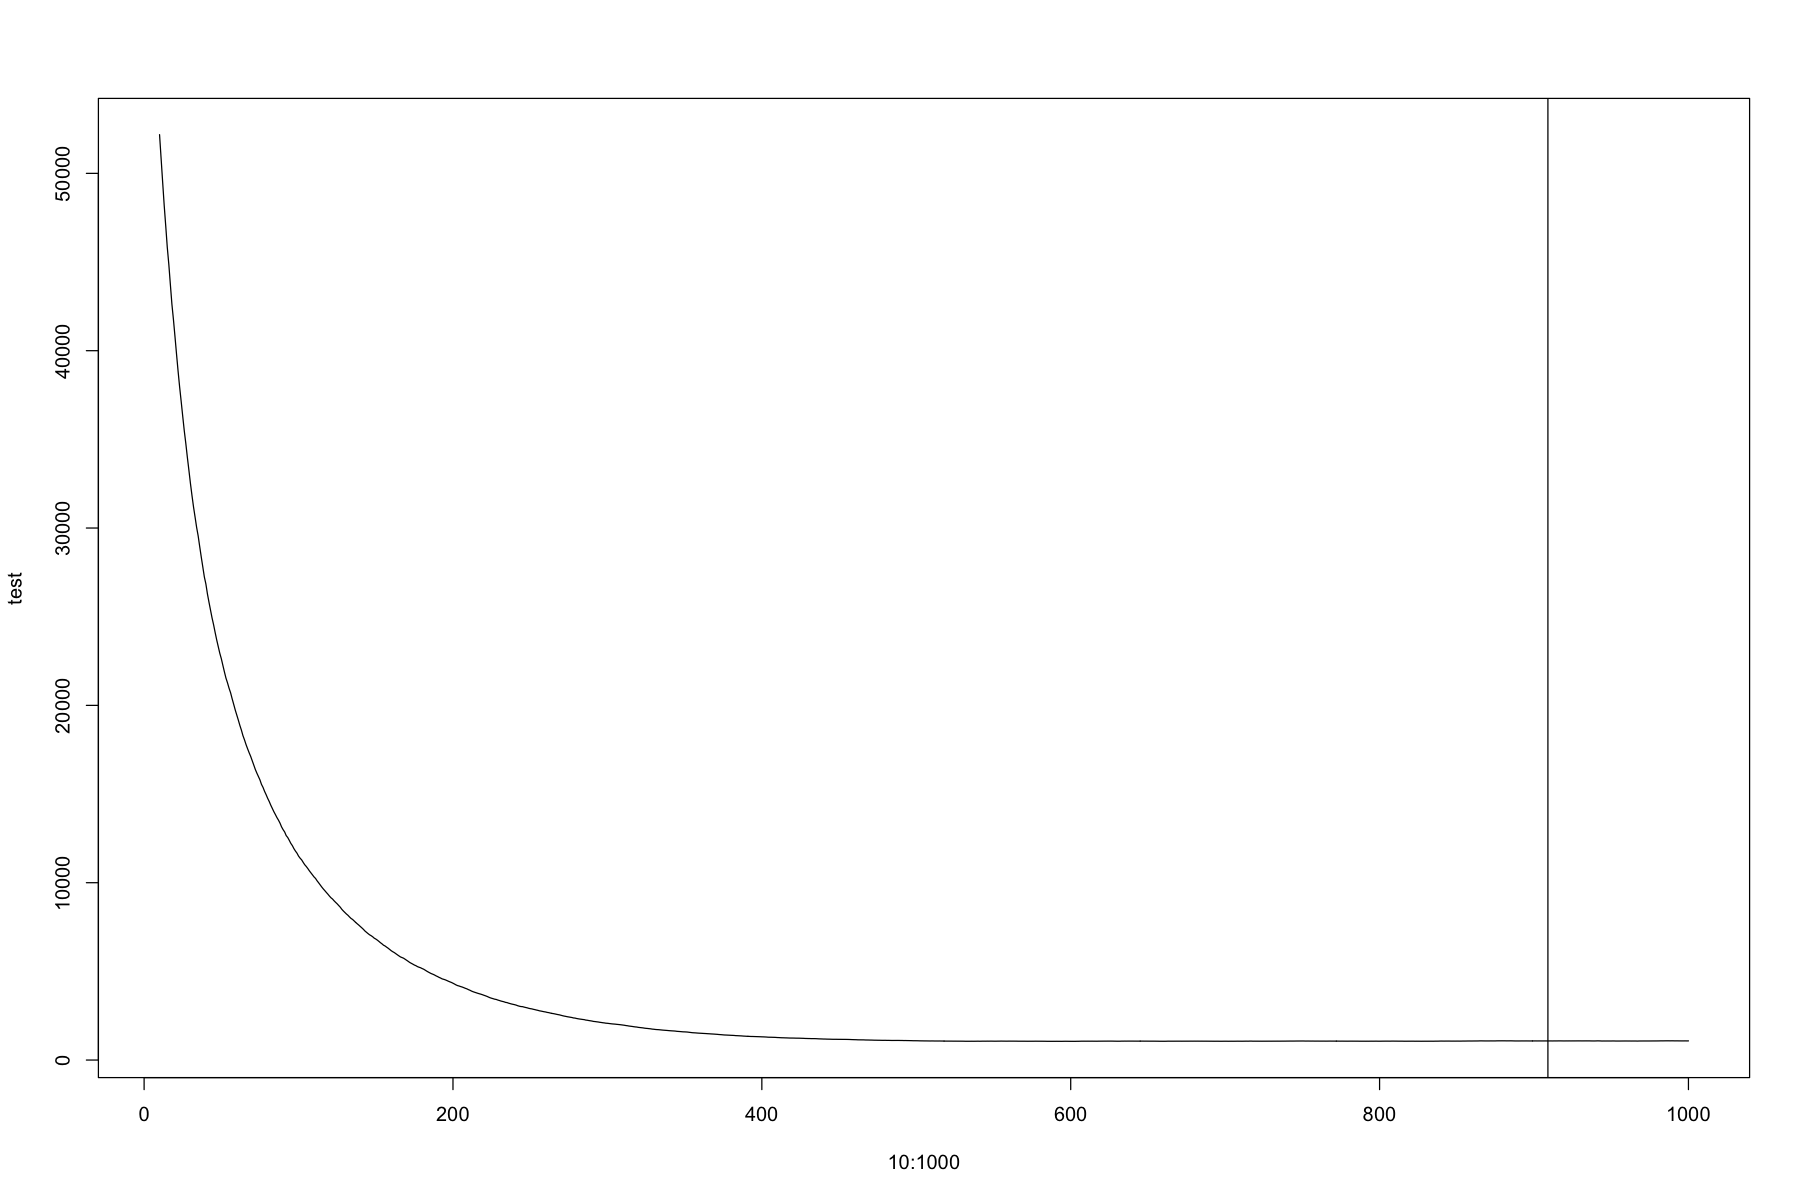

In [61]:
test=numeric()
for (i in 10:1000){
    pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
    err=sum((pred.test-datestr[,"Calories_Burned"])^2)/nrow(datestr)
    test=c(test,err)}

plot(10:1000,test,type="l")
abline(v=best.iter)

In [62]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
mse.boostr <- mean(res.boostr^2)
print(mse.boostr)

[1] 880.6154


### Echantillon Test

In [63]:
pred.test <- predict(boost.reg, newdata = datestr, n.trees = best.iter)
res.test <- pred.test - datestr$Calories_Burned
mse.test <- mean(res.test^2)
print(mse.test)

[1] 1077.031


## Réseau de neurones

In [64]:
library(MASS)
library(nnet)

In [65]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

# weights:  106
initial  value 701681117.974222 
iter  10 value 25798112.916481
iter  20 value 20144778.163199
iter  30 value 15413136.101183
iter  40 value 14382615.718668
iter  50 value 13868848.093342
iter  60 value 13143561.564467
iter  70 value 12528812.077460
iter  80 value 11492931.639194
iter  90 value 11214166.245106
iter 100 value 11033567.680857
iter 110 value 10979180.848714
iter 120 value 10895575.131482
iter 130 value 9789147.409877
iter 140 value 9313814.197665
iter 150 value 9059159.521146
iter 160 value 8641675.661335
iter 170 value 8522619.648718
iter 180 value 8483785.538758
iter 190 value 8423038.592908
iter 200 value 8183010.846058
iter 210 value 7930942.365293
iter 220 value 7689993.050900
iter 230 value 7532104.842861
iter 240 value 7406870.675442
iter 250 value 7188896.140202
iter 260 value 6974990.013610
iter 270 value 6862964.014780
iter 280 value 6787859.128744
iter 290 value 6742256.359748
iter 300 value 6698522.853522
iter 310 value 6679439.568034
iter 320 

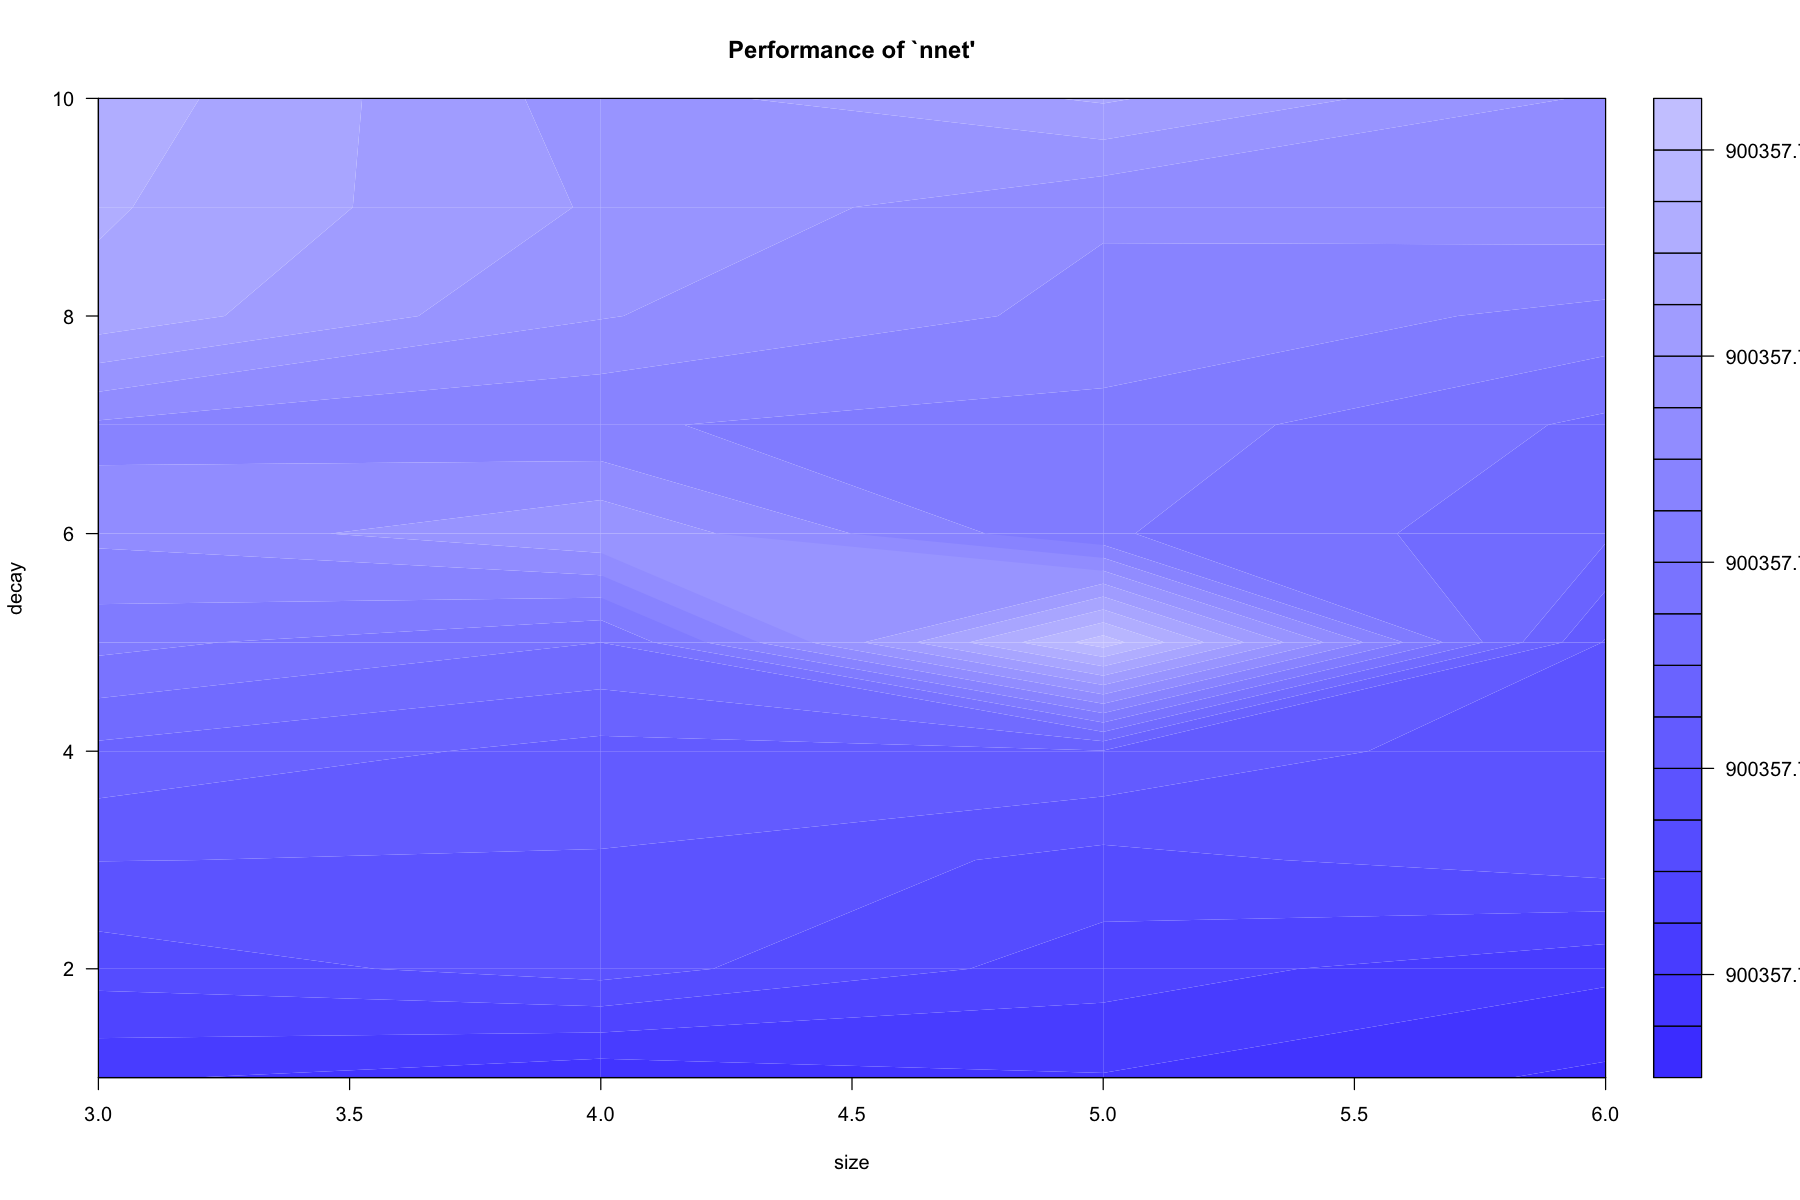

In [66]:
plot(tune.nnet(Calories_Burned~.,data=datappr,size=3:6,decay=1:10))

Meilleurs paramètres trouvés :
   size decay      mse
18    8     3 1300.916


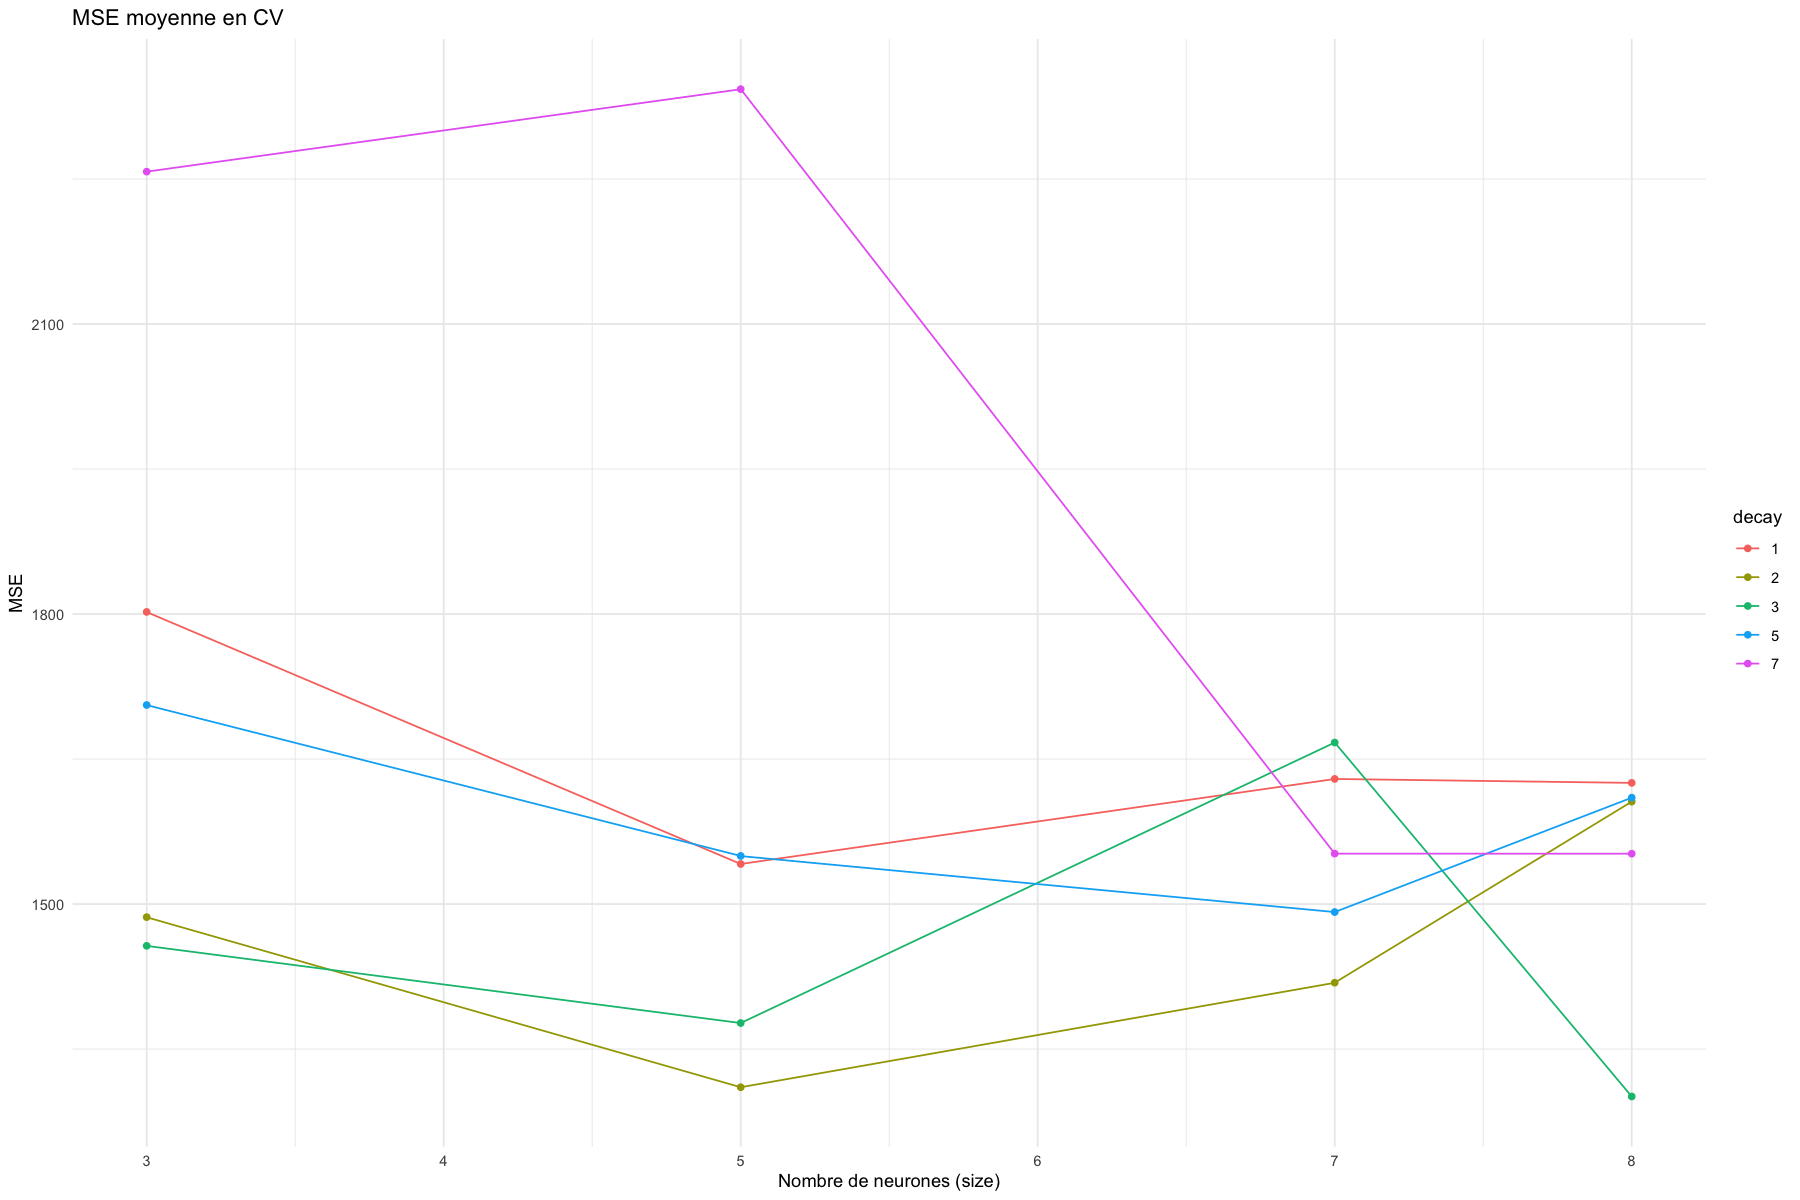

In [67]:
size_vals <- c(3, 5, 7, 8)
decay_vals <- c(1, 2, 3, 5,7)
k <- 5  # nombre de plis CV

datappr_RN <- datappr[sample(nrow(datappr)), ]

# Découper en k plis
folds <- cut(seq(1, nrow(datappr_RN)), breaks = k, labels = FALSE)

# Stocker les résultats
results <- data.frame(size = integer(), decay = numeric(), mse = numeric())

# Boucle sur les combinaisons de paramètres
for (s in size_vals) {
  for (d in decay_vals) {
    mse_folds <- c()
    
    for (i in 1:k) {
      # Créer train/test pour le pli i
      test_idx <- which(folds == i)
      test_data <- datappr_RN[test_idx, ]
      train_data <- datappr_RN[-test_idx, ]
      
      # Entraîner le réseau
      model <- nnet(Calories_Burned ~ ., data = train_data,
                    size = s, decay = d, linout = TRUE,
                    maxit = 2000, trace = FALSE)
      
      # Prédire
      pred <- predict(model, newdata = test_data)
      
      # MSE
      mse <- mean((pred - test_data$Calories_Burned)^2)
      mse_folds <- c(mse_folds, mse)
    }
    
    # MSE moyenne sur les k plis
    avg_mse <- mean(mse_folds)
    results <- rbind(results, data.frame(size = s, decay = d, mse = avg_mse))
  }
}

# 🔍 Meilleurs paramètres
best_params <- results[which.min(results$mse), ]
cat("Meilleurs paramètres trouvés :\n")
print(best_params)

# 📈 Graphe optionnel
library(ggplot2)
ggplot(results, aes(x = size, y = mse, color = as.factor(decay))) +
  geom_line() + geom_point() +
  labs(title = "MSE moyenne en CV", x = "Nombre de neurones (size)", y = "MSE", color = "decay") +
  theme_minimal()

In [68]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=8,decay=5,linout=TRUE,maxit=1000) 

# weights:  169
initial  value 698669258.364780 
iter  10 value 26579225.477745
iter  20 value 24569162.491027
iter  30 value 23043757.249910
iter  40 value 22432055.998899
iter  50 value 22106540.969119
iter  60 value 21920669.273367
iter  70 value 21654392.847308
iter  80 value 21215389.698725
iter  90 value 20587542.847808
iter 100 value 19834077.475761
iter 110 value 18449238.304911
iter 120 value 16966840.787440
iter 130 value 16371029.203198
iter 140 value 14913737.165887
iter 150 value 13756784.981302
iter 160 value 13182242.279157
iter 170 value 12913184.708328
iter 180 value 12690814.670315
iter 190 value 12142854.782240
iter 200 value 11902995.712680
iter 210 value 11424880.968752
iter 220 value 11159519.388873
iter 230 value 10698085.286796
iter 240 value 10159865.566198
iter 250 value 9990365.814757
iter 260 value 9829021.033463
iter 270 value 9702201.301118
iter 280 value 9532815.655538
iter 290 value 8989134.582956
iter 300 value 8781994.162628
iter 310 value 8657059.4970

[1] 680.3091


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


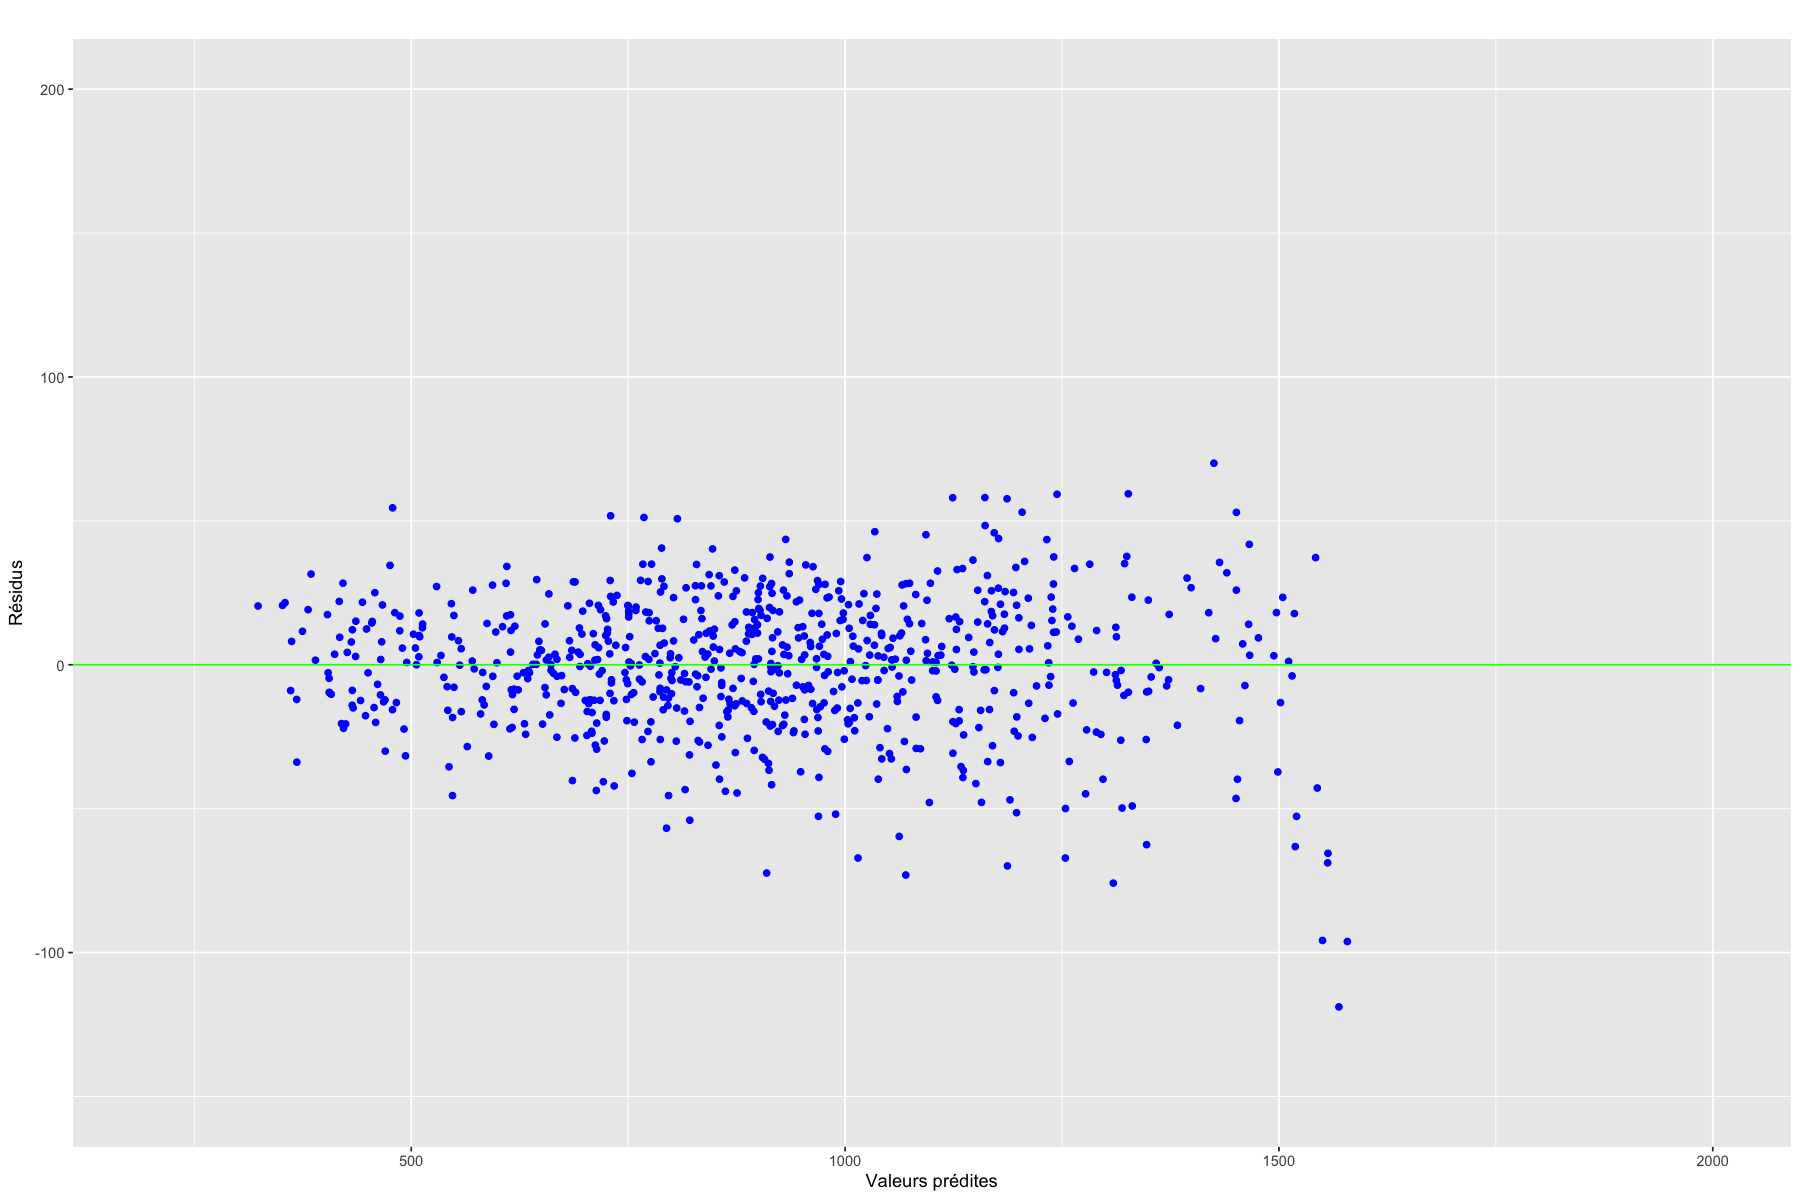

In [69]:
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

[1] 935.6258


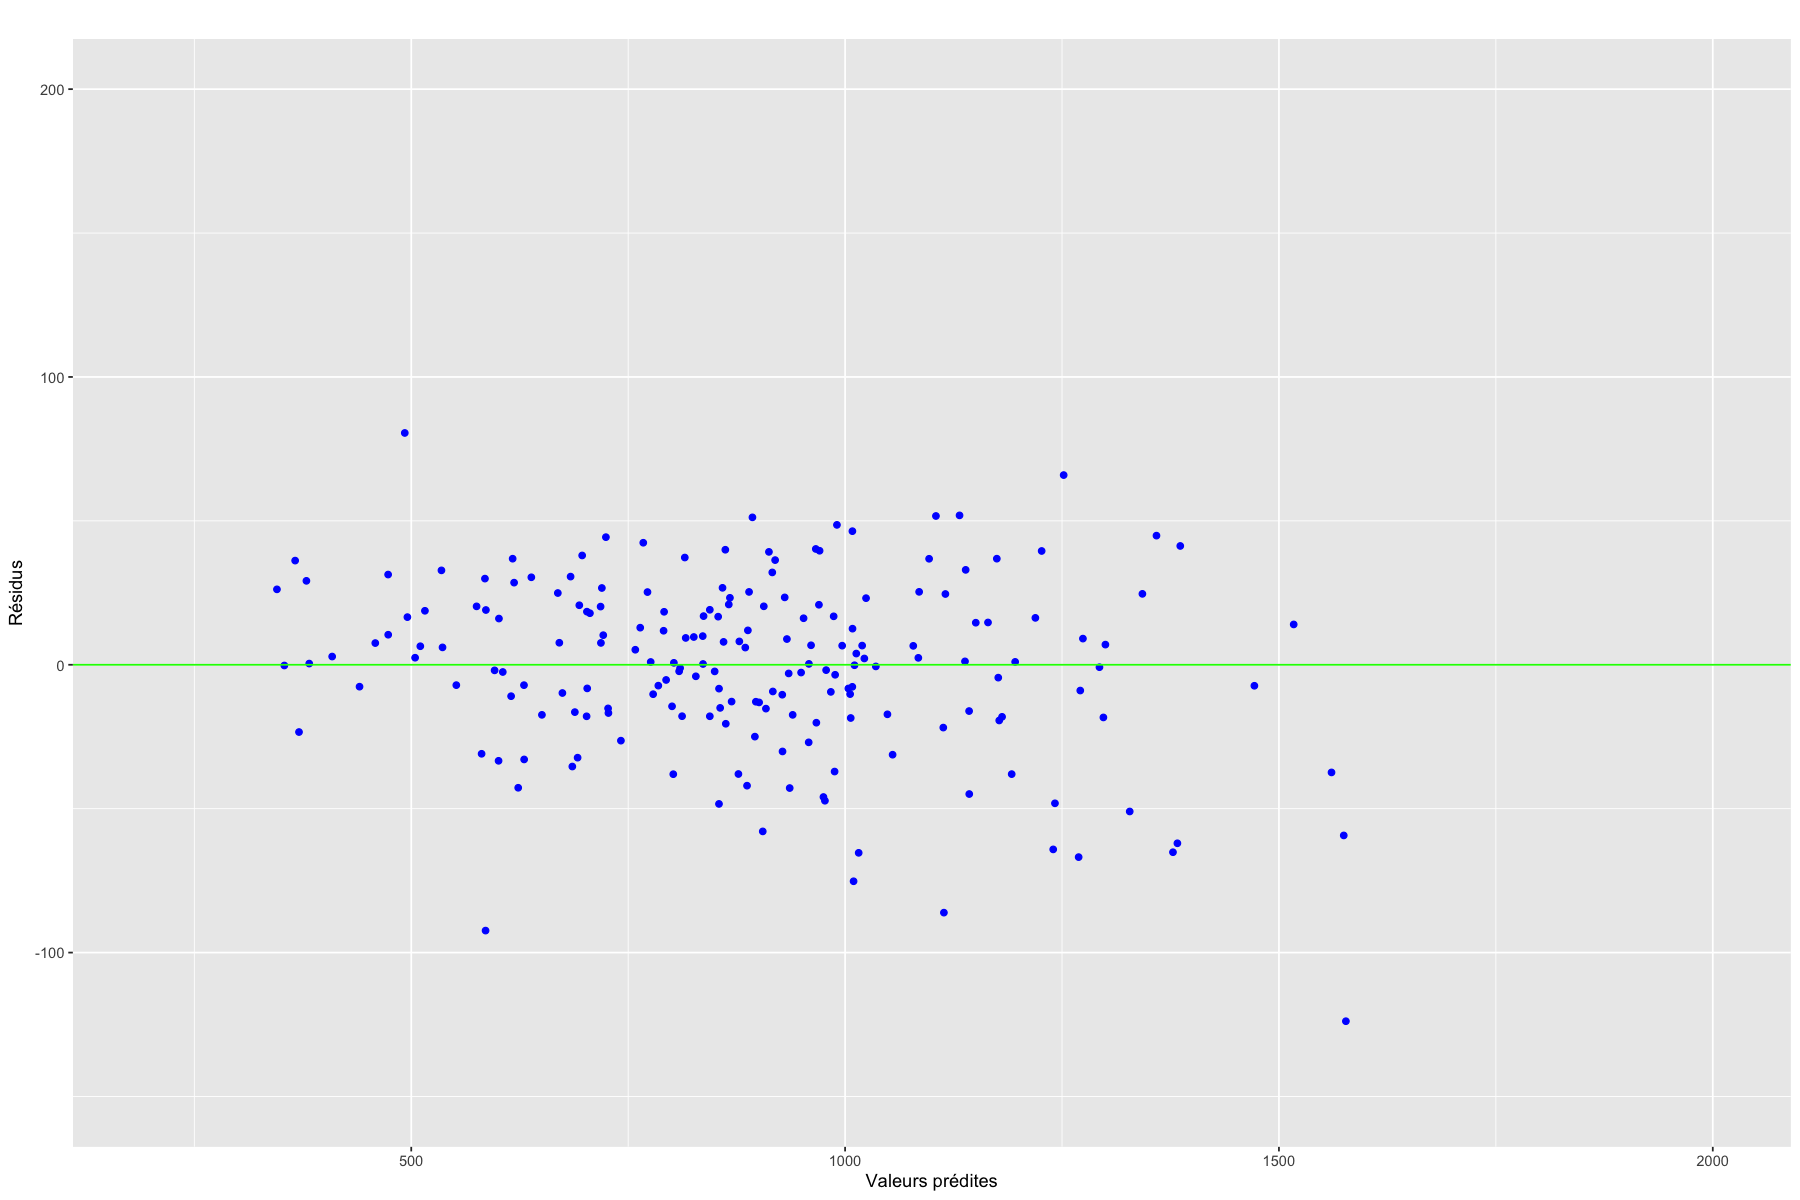

In [70]:
fit.nnetr=predict(nnet.reg,newdata=datestr)
res.nnetr=fit.nnetr-datestr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

## Comparaison des méthodes de régression

# Prédiction du niveau d'expérience

## Séparation de la base en train/test

In [71]:
library(fastDummies)
library(dplyr)

Warning message:
“le package ‘fastDummies’ a été compilé avec la version R 4.4.1”


In [72]:
Gym <- dummy_cols(Gym, select_columns = "Experience_Level", 
                  remove_first_dummy = FALSE, remove_selected_columns = TRUE)

In [73]:
set.seed(140) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [88]:
# construction de l'échantillon d'apprentissage

datapprq <- Gym[appri,] 


datappr1 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_2", "Experience_Level_3"))]
datappr2 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_1", "Experience_Level_3"))]
datappr3 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_1", "Experience_Level_2"))]
# construction de l'échantillon test

datestrq <- Gym[testi,]
datestr1 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_2", "Experience_Level_3"))]
datestr2 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_1", "Experience_Level_3"))]
datestr3 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_1", "Experience_Level_2"))]

summary(datappr2)
summary(datestr2)


# on normalise l'échantillon d'apprentissage

datappr1[,-c(2,9,12,15)]=scale(datappr1[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr1[,-c(2,9,12,15)]=scale(datestr1[,-c(2,9,12,15)],
                            center=sapply(datappr1[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr1[,-c(2,9,12,15)],sd))

datappr2[,-c(2,9,12,15)]=scale(datappr2[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr2[,-c(2,9,12,15)]=scale(datestr2[,-c(2,9,12,15)],
                            center=sapply(datappr2[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr2[,-c(2,9,12,15)],sd))

datappr3[,-c(2,9,12,15)]=scale(datappr3[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr3[,-c(2,9,12,15)]=scale(datestr3[,-c(2,9,12,15)],
                            center=sapply(datappr3[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr3[,-c(2,9,12,15)],sd))

datapprq[,-c(2,9,12,15,16,17)]=scale(datapprq[,-c(2,9,12,15,16,17)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestrq[,-c(2,9,12,15,16,17)]=scale(datestrq[,-c(2,9,12,15,16,17)],
                            center=sapply(datapprq[,-c(2,9,12,15,16,17)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datapprq[,-c(2,9,12,15,16,17)],sd))


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:376   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :402   1st Qu.: 58.20   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.88                Mean   : 73.91   Mean   :1.721   Mean   :179.9  
 3rd Qu.:50.00                3rd Qu.: 85.97   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :215  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :182  
 Median :143.0   Median :62.00   Median : 886.0   Strength:193  
 Mean   :143.7   Mean   :62.28   Mean   : 900.3   Yoga    :188  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1077.5                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female: 86   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :109   1st Qu.: 58.00   1st Qu.:1.630   1st Qu.:171.5  
 Median :38.00                Median : 71.00   Median :1.710   Median :180.0  
 Mean   :37.88                Mean   : 73.63   Mean   :1.728   Mean   :179.7  
 3rd Qu.:48.00                3rd Qu.: 85.70   3rd Qu.:1.810   3rd Qu.:189.5  
 Max.   :59.00                Max.   :128.20   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 380.0   Cardio  :40    Min.   :10.10  
 1st Qu.:132   1st Qu.:55.00   1st Qu.: 722.0   HIIT    :39    1st Qu.:21.20  
 Median :143   Median :63.00   Median : 917.0   Strength:65    Median :25.90  
 Mean   :144   Mean   :62.02   Mean   : 925.7   Yoga    :51    Mean   :24.61  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1071.5       

## Modèle linéaire

### Regression logistique

#### Niveau 1 d'Expérience Level

In [79]:
# estimation du modèle complet
log.lm1 <- glm(Experience_Level_1 ~. , data = datappr1, family = binomial)
summary(log.lm1)$coefficients

# significativité des paramètres
anova(log.lm1, test = "Chisq")

Estimate     Std. Error   z value     Pr(>|z|) 
(Intercept)           20.61484513 1249.6312891  0.01649674 0.9868381
Age                    0.06760750    0.2233932  0.30263897 0.7621650
GenderMale            -0.91202471    0.7055576 -1.29262969 0.1961392
Weight..kg.            0.43142325    1.1224552  0.38435675 0.7007141
Height..m.            -0.06566150    0.6097510 -0.10768577 0.9142450
Max_BPM               -0.09208004    0.1345949 -0.68412731 0.4938948
Avg_BPM                0.10831716    0.4243496  0.25525454 0.7985265
Resting_BPM           -0.07505664    0.1407516 -0.53325617 0.5938563
Calories_Burned       -0.56119928    1.3203068 -0.42505219 0.6707986
Workout_TypeHIIT       0.07105741    0.3775723  0.18819550 0.8507234
Workout_TypeStrength   0.26622721    0.3758311  0.70836920 0.4787160
Workout_TypeYoga      -0.18985289    0.3878735 -0.48947116 0.6245082
Fat_Percentage        -0.09800563    0.2928808 -0.33462629 0.7379070
BMI                   -0.39736990    1.0674900 -0.37224696 0.7097090
Workout_Frequency3   -20.61702705 1249.6311954 -0.01649849 0.9868367
Workout_Frequency4   -40.61098003 1652.0857772 -0.02458164 0.9803887
Workout_Frequency5   -39.05121002 2282.4339668 -0.01710946 0.9863493
Session_Duration      -1.03649006    1.2052348 -0.85999018 0.3897945
Water_Intake           0.27446535    0.1980057  1.38614869 0.1657015

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1044.5563            NA
Age                1   0.13556746 776       1044.4207  7.127279e-01
Gender             1   0.01318252 775       1044.4075  9.085916e-01
Weight..kg.        1   0.29602895 774       1044.1115  5.863827e-01
Height..m.         1   0.36407991 773       1043.7474  5.462490e-01
Max_BPM            1   0.32794789 772       1043.4195  5.668699e-01
Avg_BPM            1   0.01142338 771       1043.4080  9.148840e-01
Resting_BPM        1   0.01045511 770       1043.3976  9.185581e-01
Calories_Burned    1 295.74490781 769        747.6527  2.785059e-66
Workout_Type       3   1.73561385 766        745.9171  6.290453e-01
Fat_Percentage     1   8.35083488 765        737.5662  3.855102e-03
BMI                1   3.71013428 764        733.8561  5.408304e-02
Workout_Frequency  3 396.65250615 761        337.2036  1.175543e-85
Session_Duration   1   0.54572551 760        336.6579  4.600695e-01
Water_Intake       1   1.93898035 759        334.7189  1.637793e-01

In [80]:
log.lm.step1 <- step(log.lm1, direction = "backward")

Start:  AIC=372.72
Experience_Level_1 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df Deviance    AIC
- Workout_Type       3   336.18 368.18
- Height..m.         1   334.73 370.73
- Avg_BPM            1   334.78 370.78
- Age                1   334.81 370.81
- Fat_Percentage     1   334.83 370.83
- BMI                1   334.86 370.86
- Weight..kg.        1   334.87 370.87
- Calories_Burned    1   334.90 370.90
- Resting_BPM        1   335.00 371.00
- Max_BPM            1   335.19 371.19
- Session_Duration   1   335.46 371.46
- Gender             1   336.40 372.40
- Water_Intake       1   336.66 372.66
<none>                   334.72 372.72
- Workout_Frequency  3   728.24 760.24

Step:  AIC=368.18
Experience_Level_1 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned

In [81]:
anova(log.lm.step1, test = "Chisq")

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)     
NULL              NA           NA 777       1044.5563             NA
Gender             1   0.01567738 776       1044.5406   9.003578e-01
Workout_Frequency  3 634.41329789 773        410.1273  3.489088e-137
Session_Duration   1  68.54427564 772        341.5830   1.240607e-16
Water_Intake       1   2.16327147 771        339.4197   1.413435e-01

In [82]:
preds1 <- log.lm1$fitted.values
conf_matrixr1 <- table(Prediction = preds1 > 0.5,
                     Réalité = datappr1$Experience_Level_1)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr1)) / sum(conf_matrixr1)
print(conf_matrixr1)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test1 <- predict(log.lm1, newdata = datestr1, type = "response")

conf_matrix1 <- table(Prediction = preds_test1 > 0.5,
                     Réalité = datestr1$Experience_Level_1)
accuracy_test <- sum(diag(conf_matrix1)) / sum(conf_matrix1)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix1)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 432  56
     TRUE   38 252
Accuracy train = 87.92%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 127  68
Accuracy test= 65.13%


DEMANDER SUR QUOI FAIRE LA MATRICE DE VALIDATION

s1           
(Intercept)            4.821179947
Age                    0.070267907
GenderMale            -0.614289795
Weight..kg.            0.000000000
Height..m.             0.091151642
Max_BPM               -0.070009079
Avg_BPM                0.040059544
Resting_BPM           -0.055650117
Calories_Burned       -0.350548185
Workout_TypeHIIT       0.030446586
Workout_TypeStrength   0.185841984
Workout_TypeYoga      -0.156394251
Fat_Percentage         0.000000000
BMI                   -0.009160262
Workout_Frequency3    -4.975220521
Workout_Frequency4   -10.633409038
Workout_Frequency5    -8.202203475
Session_Duration      -1.157182363
Water_Intake           0.194777864

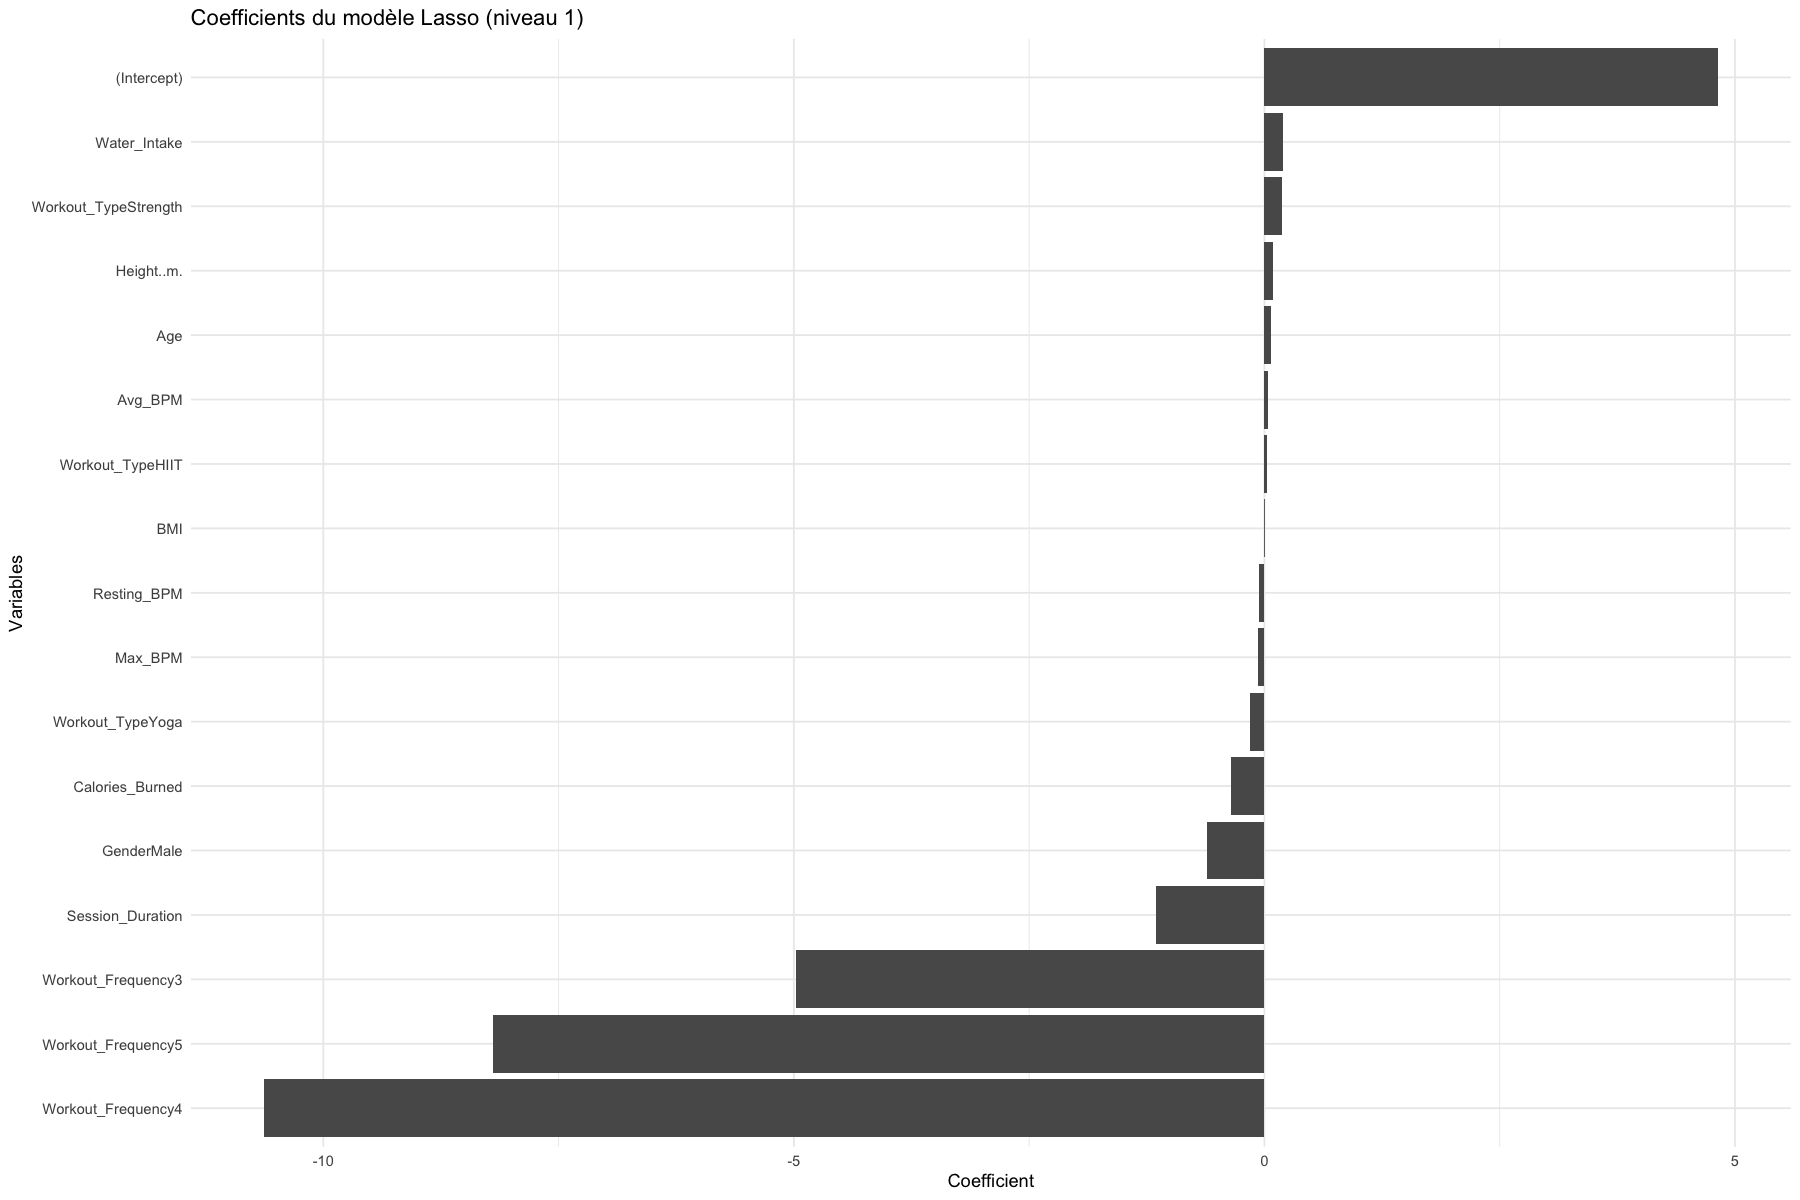

In [85]:
Xb1_train_mat <- model.matrix(Experience_Level_1 ~ . , data = datappr1)[, -1]  # enlever l’intercept
Y1_train_vec <- datappr1$Experience_Level_1
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)
coef_lasso <- coef(cv_lasso, s = "lambda.min")

as.matrix(coef_lasso)

# Convertir en data frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef <- subset(df_coef, Coefficient != 0)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 1)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Niveau 2 d'Expérience Level

In [84]:
# estimation du modèle complet
log.lm2 <- glm(Experience_Level_2 ~. , data = datappr2, family = binomial)
summary(log.lm2)$coefficients

# significativité des paramètres
anova(log.lm2, test = "Chisq")

Estimate      Std. Error   z value      Pr(>|z|)    
(Intercept)          -22.344986845  742.0837134 -0.030111140 9.759784e-01
Age                   -0.084850051    0.1693649 -0.500989688 6.163784e-01
GenderMale             3.498248941    0.5431261  6.440952139 1.187263e-10
Weight..kg.            0.826746873    1.0021980  0.824933644 4.094093e-01
Height..m.            -0.582719353    0.5438283 -1.071513563 2.839386e-01
Max_BPM                0.016666748    0.1119830  0.148832843 8.816855e-01
Avg_BPM                0.205877373    0.3014396  0.682980521 4.946192e-01
Resting_BPM           -0.034129169    0.1149781 -0.296831795 7.665949e-01
Calories_Burned       -0.218444743    0.8403050 -0.259958890 7.948955e-01
Workout_TypeHIIT       0.006234467    0.3154998  0.019760605 9.842343e-01
Workout_TypeStrength  -0.465556642    0.3208466 -1.451025457 1.467728e-01
Workout_TypeYoga       0.012532532    0.3178747  0.039426008 9.685507e-01
Fat_Percentage         2.082822130    0.2193981  9.493345682 2.237356e-21
BMI                   -0.744442264    0.9476131 -0.785597251 4.321035e-01
Workout_Frequency3    19.961306676  742.0835911  0.026899000 9.785403e-01
Workout_Frequency4    22.464238593  742.0836672  0.030271841 9.758503e-01
Workout_Frequency5     4.021735626 1375.9716581  0.002922833 9.976679e-01
Session_Duration       0.944878395    0.7777323  1.214914675 2.243986e-01
Water_Intake          -0.901264413    0.1755749 -5.133218791 2.848285e-07

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1053.9289            NA
Age                1   0.09175345 776       1053.8371  7.619597e-01
Gender             1   0.04206083 775       1053.7950  8.375039e-01
Weight..kg.        1   1.13589800 774       1052.6591  2.865208e-01
Height..m.         1   0.48095870 773       1052.1782  4.879884e-01
Max_BPM            1   0.51445079 772       1051.6637  4.732185e-01
Avg_BPM            1   0.45983578 771       1051.2039  4.977007e-01
Resting_BPM        1   0.40769352 770       1050.7962  5.231425e-01
Calories_Burned    1   0.05208635 769       1050.7441  8.194718e-01
Workout_Type       3   0.05646244 766       1050.6877  9.964916e-01
Fat_Percentage     1 157.42968464 765        893.2580  4.123433e-36
BMI                1   0.05290381 764        893.2051  8.180853e-01
Workout_Frequency  3 364.10709329 761        529.0980  1.314897e-78
Session_Duration   1   0.70242688 760        528.3956  4.019694e-01
Water_Intake       1  28.83182622 759        499.5637  7.894317e-08

In [86]:
log.lm.step2 <- step(log.lm2, direction = "backward")

Start:  AIC=537.56
Experience_Level_2 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df Deviance    AIC
- Workout_Type       3   502.80 534.80
- Max_BPM            1   499.59 535.59
- Calories_Burned    1   499.63 535.63
- Resting_BPM        1   499.65 535.65
- Age                1   499.82 535.82
- Avg_BPM            1   500.03 536.03
- BMI                1   500.19 536.19
- Weight..kg.        1   500.25 536.25
- Height..m.         1   500.72 536.72
- Session_Duration   1   501.05 537.05
<none>                   499.56 537.56
- Water_Intake       1   528.40 564.40
- Gender             1   549.16 585.16
- Fat_Percentage     1   630.03 666.03
- Workout_Frequency  3   863.97 895.97

Step:  AIC=534.8
Experience_Level_2 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned 

In [221]:
anova(log.lm.step2, test = "Chisq")

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1053.9289            NA
Gender             1   0.03857024 776       1053.8903  8.443025e-01
Fat_Percentage     1 100.80875105 775        953.0815  1.013077e-23
Workout_Frequency  3 402.21789196 772        550.8636  7.323876e-87
Session_Duration   1  16.20856312 771        534.6551  5.673707e-05
Water_Intake       1  28.20318630 770        506.4519  1.092246e-07

In [87]:
preds2 <- log.lm2$fitted.values
conf_matrixr2 <- table(Prediction = preds2 > 0.5,
                     Réalité = datappr2$Experience_Level_2)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr2)) / sum(conf_matrixr2)
print(conf_matrixr2)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test2 <- predict(log.lm2, newdata = datestr2, type = "response")

conf_matrix2 <- table(Prediction = preds_test2 > 0.5,
                     Réalité = datestr2$Experience_Level_2)
accuracy_test <- sum(diag(conf_matrix2)) / sum(conf_matrix2)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix2)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 392  58
     TRUE   66 262
Accuracy train = 84.06%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction  0  1
     FALSE 90 84
     TRUE  19  2
Accuracy test= 47.18%


s1           
(Intercept)          -1.254627e+01
Age                   0.000000e+00
GenderMale            2.821713e+00
Weight..kg.           0.000000e+00
Height..m.           -6.807056e-01
Max_BPM               0.000000e+00
Avg_BPM               9.371372e-04
Resting_BPM          -9.799278e-04
Calories_Burned       9.638721e-04
Workout_TypeHIIT      0.000000e+00
Workout_TypeStrength -3.548269e-01
Workout_TypeYoga      6.697473e-03
Fat_Percentage        2.994991e-01
BMI                   5.357057e-02
Workout_Frequency3    5.015038e+00
Workout_Frequency4    7.295002e+00
Workout_Frequency5    0.000000e+00
Session_Duration      1.104927e+00
Water_Intake         -1.297241e+00

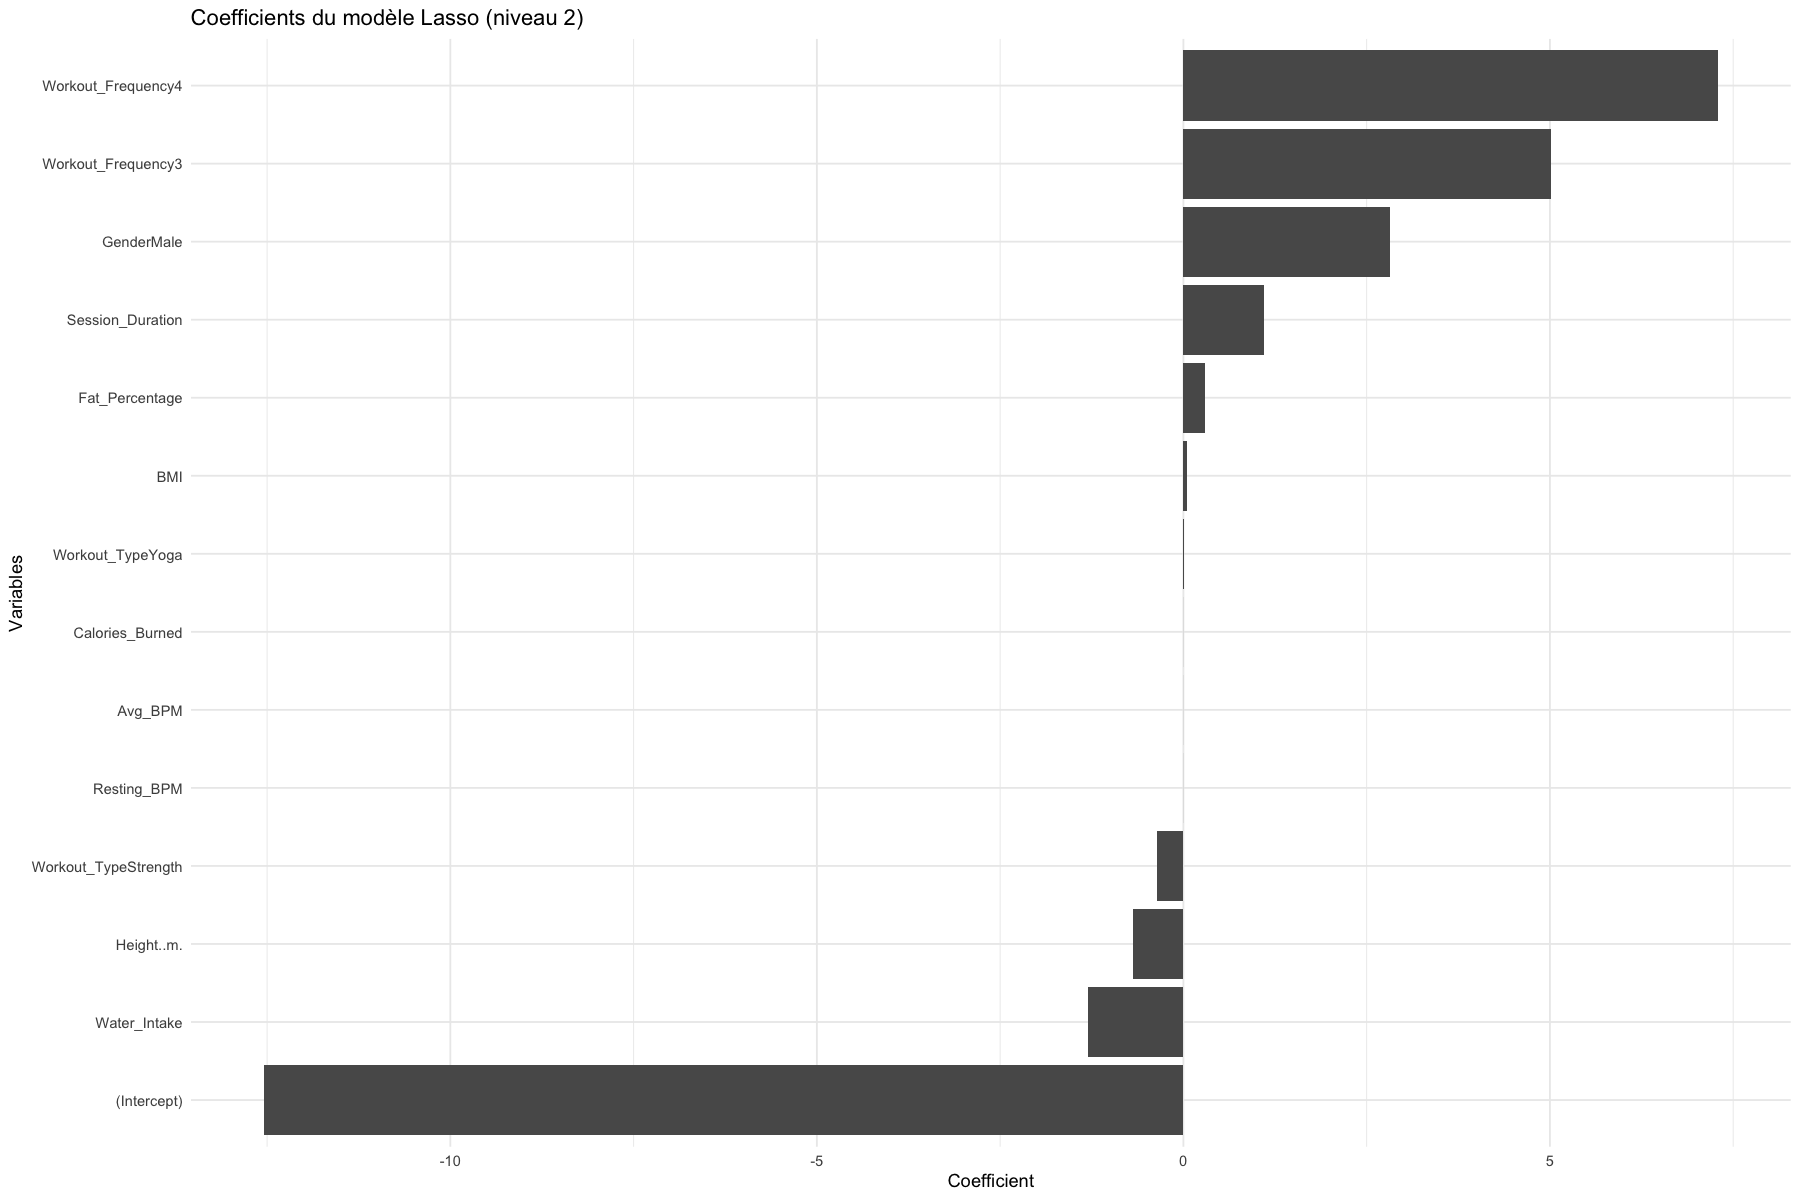

In [224]:
Xb2_train_mat <- model.matrix(Experience_Level_2 ~ . , data = datappr2)[, -1]  # enlever l’intercept
Y2_train_vec <- datappr2$Experience_Level_2
cv_lasso2 <- cv.glmnet(Xb2_train_mat, Y2_train_vec, family = "binomial", alpha = 1)
coef_lasso2 <- coef(cv_lasso2, s = "lambda.min")

as.matrix(coef_lasso2)

# Convertir en data frame
df_coef2 <- as.data.frame(as.matrix(coef_lasso2))
df_coef2$Variable <- rownames(df_coef2)
colnames(df_coef2)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef2 <- subset(df_coef2, Coefficient != 0)
ggplot(df_coef2, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 2)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Niveau 3 d'Experience Level

In [234]:

install.packages("brglm")
library(brglm)
# Ajustement avec la méthode de biais réduits pour gérer la séparation
log.lm3_br <- brglm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
summary(log.lm3_br)

log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm.step3 <- step(log.lm3, direction = "backward")


Les packages binaires téléchargés sont dans
	/var/folders/hd/j35cgpld27n726tf6dxlhggm0000gn/T//RtmpDzoVWP/downloaded_packages



Call:
brglm(formula = Experience_Level_3 ~ ., family = binomial, data = datappr3)


Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.515e+01  3.859e+01   0.911  0.36230    
Age                  -9.593e-04  4.049e-02  -0.024  0.98110    
GenderMale           -4.692e+00  1.622e+00  -2.892  0.00383 ** 
Weight..kg.           8.735e-02  1.517e-01   0.576  0.56474    
Height..m.           -7.823e+00  1.406e+01  -0.557  0.57781    
Max_BPM              -5.292e-03  3.084e-02  -0.172  0.86378    
Avg_BPM              -4.873e-03  5.862e-02  -0.083  0.93375    
Resting_BPM           3.052e-02  5.022e-02   0.608  0.54335    
Calories_Burned      -1.982e-05  8.301e-03  -0.002  0.99810    
Workout_TypeHIIT     -3.712e-01  1.017e+00  -0.365  0.71507    
Workout_TypeStrength  1.450e-01  1.001e+00   0.145  0.88474    
Workout_TypeYoga      2.385e-01  9.264e-01   0.257  0.79682    
Fat_Percentage       -8.290e-01  1.610e-01  -5.151  2.6e-07 ***
BMI  

Start:  AIC=38
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df   Deviance AIC
- Workout_Type       3 1.9318e-08  32
- Workout_Frequency  3 2.0850e-08  32
- Avg_BPM            1 1.9160e-08  36
- Max_BPM            1 1.9205e-08  36
- Calories_Burned    1 1.9223e-08  36
- Height..m.         1 1.9247e-08  36
- Weight..kg.        1 1.9265e-08  36
- Water_Intake       1 1.9280e-08  36
- BMI                1 1.9299e-08  36
- Resting_BPM        1 1.9304e-08  36
- Age                1 1.9372e-08  36
- Session_Duration   1 1.9476e-08  36
- Gender             1 3.0468e-08  36
- Fat_Percentage     1 2.0481e-07  36
<none>                 1.9161e-08  38

Step:  AIC=32
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
   

In [236]:
log.lm.step3 <- step(log.lm3, direction = "backward")

Start:  AIC=38
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df   Deviance AIC
- Workout_Type       3 1.9318e-08  32
- Workout_Frequency  3 2.0850e-08  32
- Avg_BPM            1 1.9160e-08  36
- Max_BPM            1 1.9205e-08  36
- Calories_Burned    1 1.9223e-08  36
- Height..m.         1 1.9247e-08  36
- Weight..kg.        1 1.9265e-08  36
- Water_Intake       1 1.9280e-08  36
- BMI                1 1.9299e-08  36
- Resting_BPM        1 1.9304e-08  36
- Age                1 1.9372e-08  36
- Session_Duration   1 1.9476e-08  36
- Gender             1 3.0468e-08  36
- Fat_Percentage     1 2.0481e-07  36
<none>                 1.9161e-08  38

Step:  AIC=32
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
   

In [237]:
preds3 <- log.lm3$fitted.values
conf_matrixr3 <- table(Prediction = preds3 > 0.5,
                     Réalité = datappr3$Experience_Level_3)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr3)) / sum(conf_matrixr3)
print(conf_matrixr3)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test3 <- predict(log.lm3, newdata = datestr3, type = "response")

conf_matrix3 <- table(Prediction = preds_test3 > 0.5,
                     Réalité = datestr3$Experience_Level_3)
accuracy_test <- sum(diag(conf_matrix3)) / sum(conf_matrix3)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix3)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 628   0
     TRUE    0 150
Accuracy train = 100.00%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 154   0
     TRUE    0  41
Accuracy test= 100.00%


s1        
(Intercept)          13.0031151
Age                   0.0000000
GenderMale           -5.2824409
Weight..kg.           0.0000000
Height..m.            0.0000000
Max_BPM               0.0000000
Avg_BPM               0.0000000
Resting_BPM           0.0000000
Calories_Burned       0.0000000
Workout_TypeHIIT      0.0000000
Workout_TypeStrength  0.0000000
Workout_TypeYoga      0.0000000
Fat_Percentage       -1.2105133
BMI                   0.0000000
Workout_Frequency3   -0.9803876
Workout_Frequency4    0.0000000
Workout_Frequency5    0.8260775
Session_Duration      9.0064282
Water_Intake          0.0000000

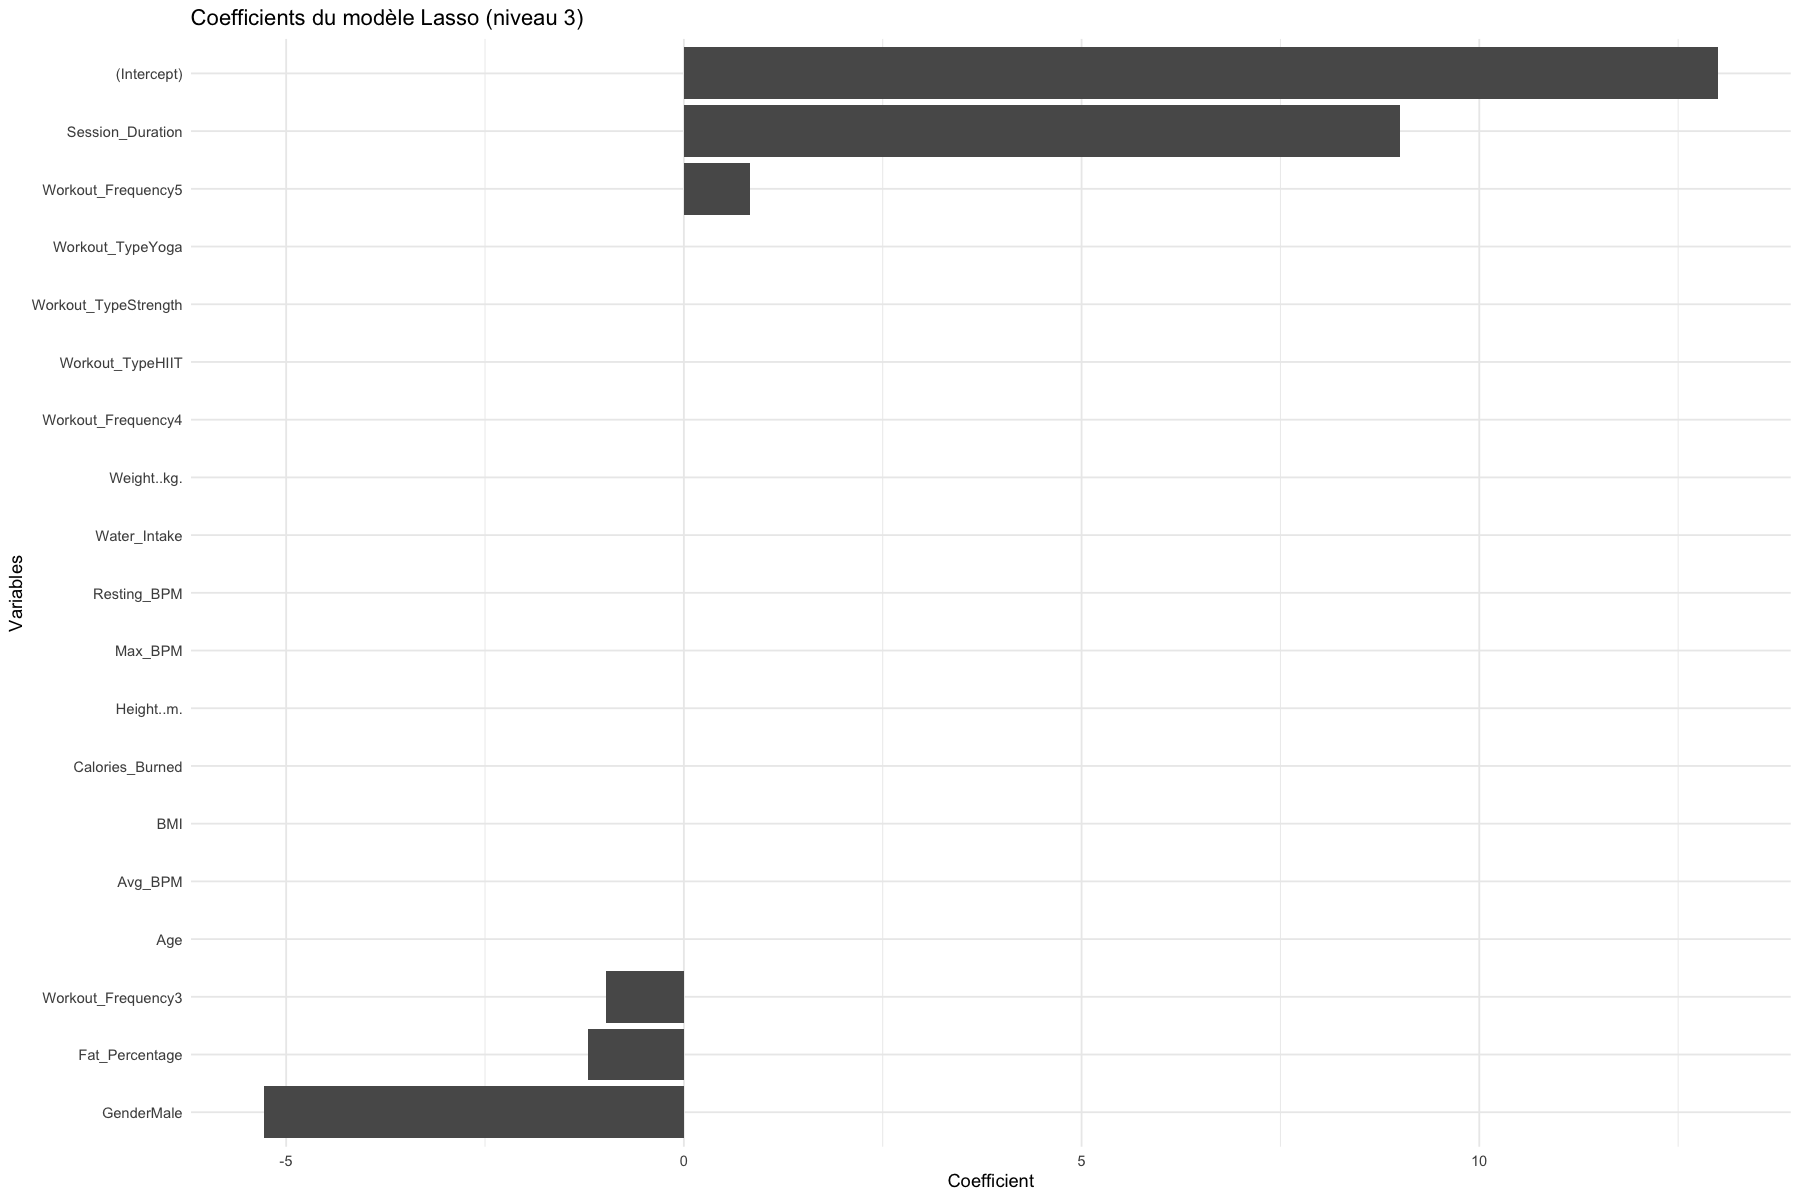

In [241]:
Xb3_train_mat <- model.matrix(Experience_Level_3 ~ . , data = datappr3)[, -1]  # enlever l’intercept
Y3_train_vec <- datappr3$Experience_Level_3
cv_lasso3 <- cv.glmnet(Xb3_train_mat, Y3_train_vec, family = "binomial", alpha = 1)
coef_lasso3 <- coef(cv_lasso3, s = "lambda.min")

as.matrix(coef_lasso3)

# Convertir en data frame
df_coef3 <- as.data.frame(as.matrix(coef_lasso3))
df_coef3$Variable <- rownames(df_coef3)
colnames(df_coef3)[1] <- "Coefficient"

# Supprimer les coefficients nuls
#df_coef3 <- subset(df_coef3, Coefficient != 0)
ggplot(df_coef3, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 3)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Comparaison des trois niveaux d'expérience

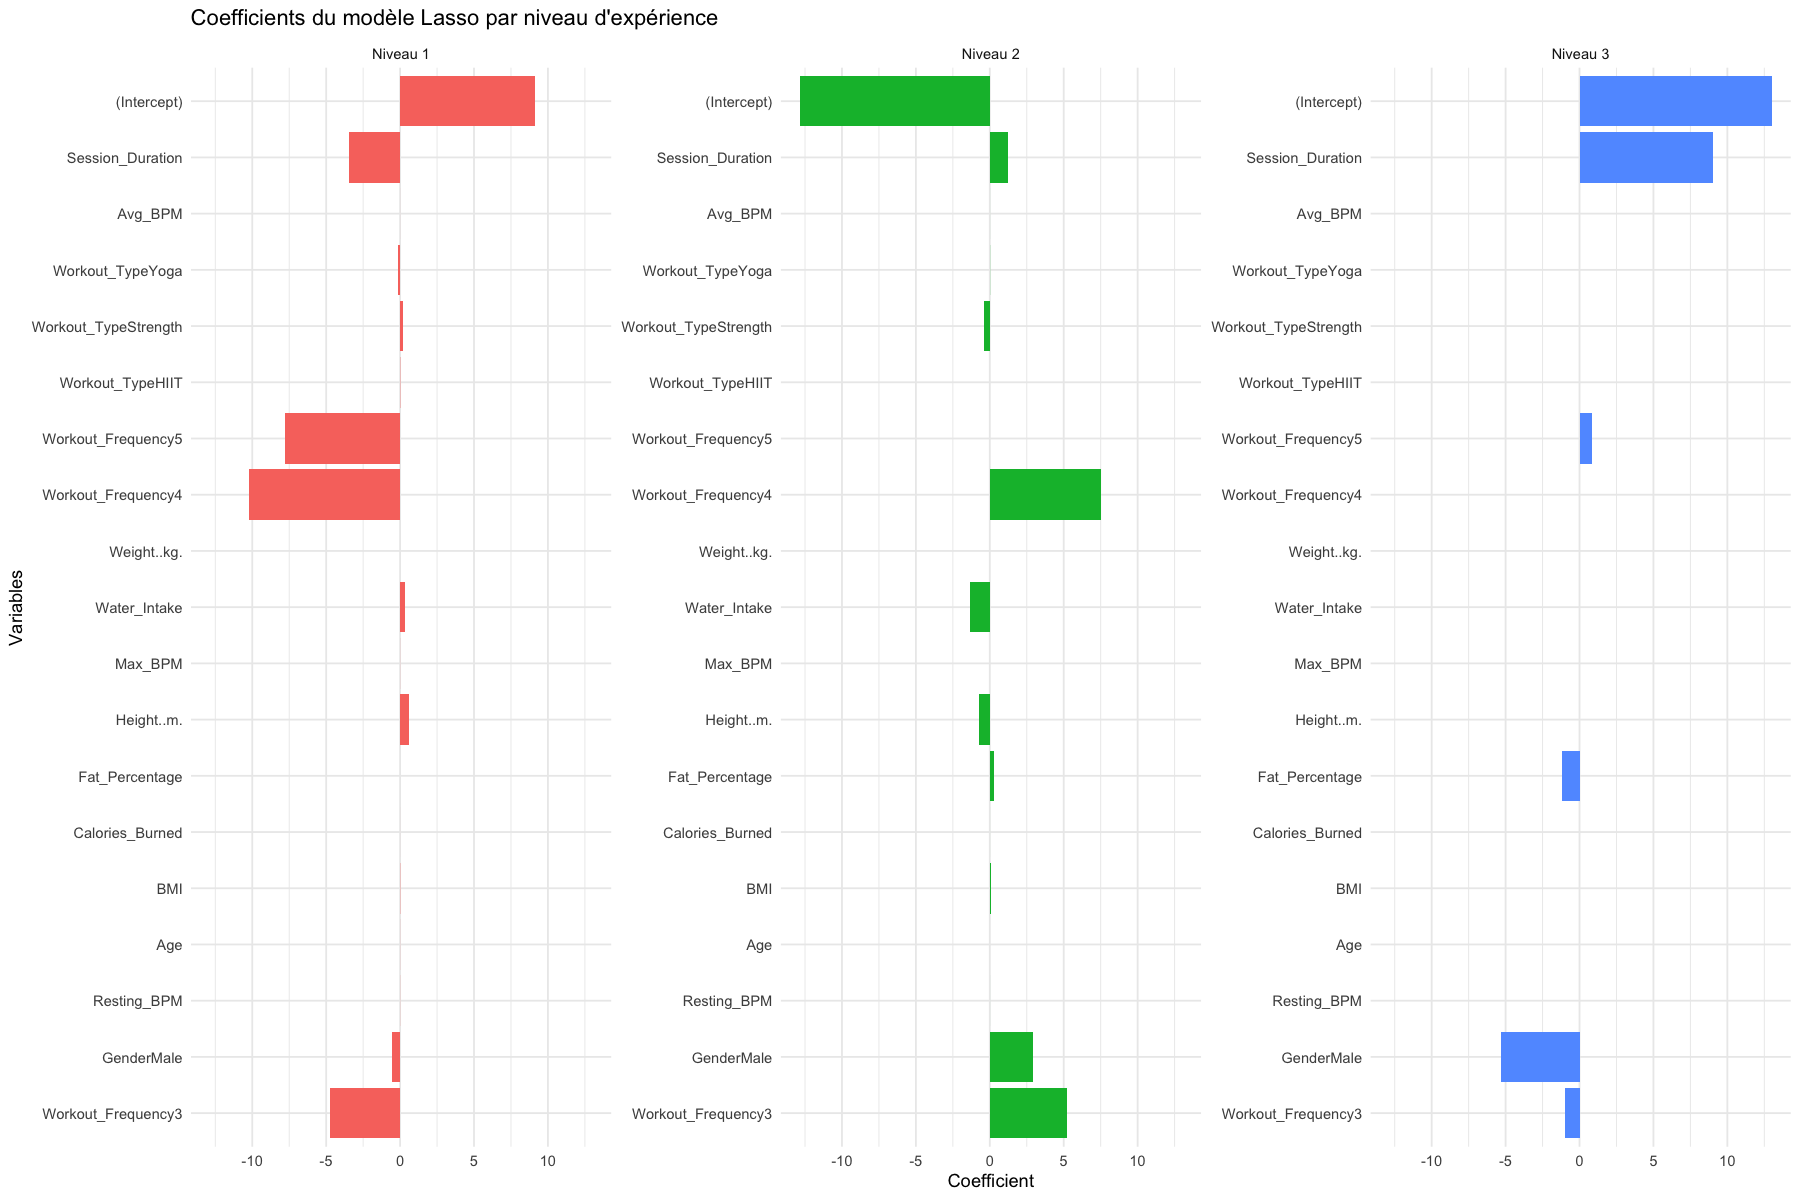

In [242]:
extract_coef_df <- function(data, response_var, level_label) {
  X_mat <- model.matrix(as.formula(paste(response_var, "~ .")), data = data)[, -1]
  Y_vec <- data[[response_var]]
  cv_lasso <- cv.glmnet(X_mat, Y_vec, family = "binomial", alpha = 1)
  coef_lasso <- coef(cv_lasso, s = "lambda.min")
  
  df <- as.data.frame(as.matrix(coef_lasso))
  df$Variable <- rownames(df)
  colnames(df)[1] <- "Coefficient"
  df$Level <- level_label
  return(df)
}


df_coef1 <- extract_coef_df(datappr1, "Experience_Level_1", "Niveau 1")
df_coef2 <- extract_coef_df(datappr2, "Experience_Level_2", "Niveau 2")
df_coef3 <- extract_coef_df(datappr3, "Experience_Level_3", "Niveau 3")

# Combiner en un seul data frame
df_all <- rbind(df_coef1, df_coef2, df_coef3)

# Pour éviter que la variable 'Variable' soit réordonnée différemment dans chaque facette, on fixe un ordre global :
library(dplyr)
var_order <- df_all %>%
  group_by(Variable) %>%
  summarize(med_coef = median(Coefficient)) %>%
  arrange(med_coef) %>%
  pull(Variable)

df_all$Variable <- factor(df_all$Variable, levels = var_order)

# Plot avec facettes côte à côte
ggplot(df_all, aes(x = Variable, y = Coefficient, fill = Level)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~ Level, scales = "free_y") +  # un graphique par niveau, échelles y indépendantes
  labs(title = "Coefficients du modèle Lasso par niveau d'expérience",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal() +
  theme(legend.position = "none")


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



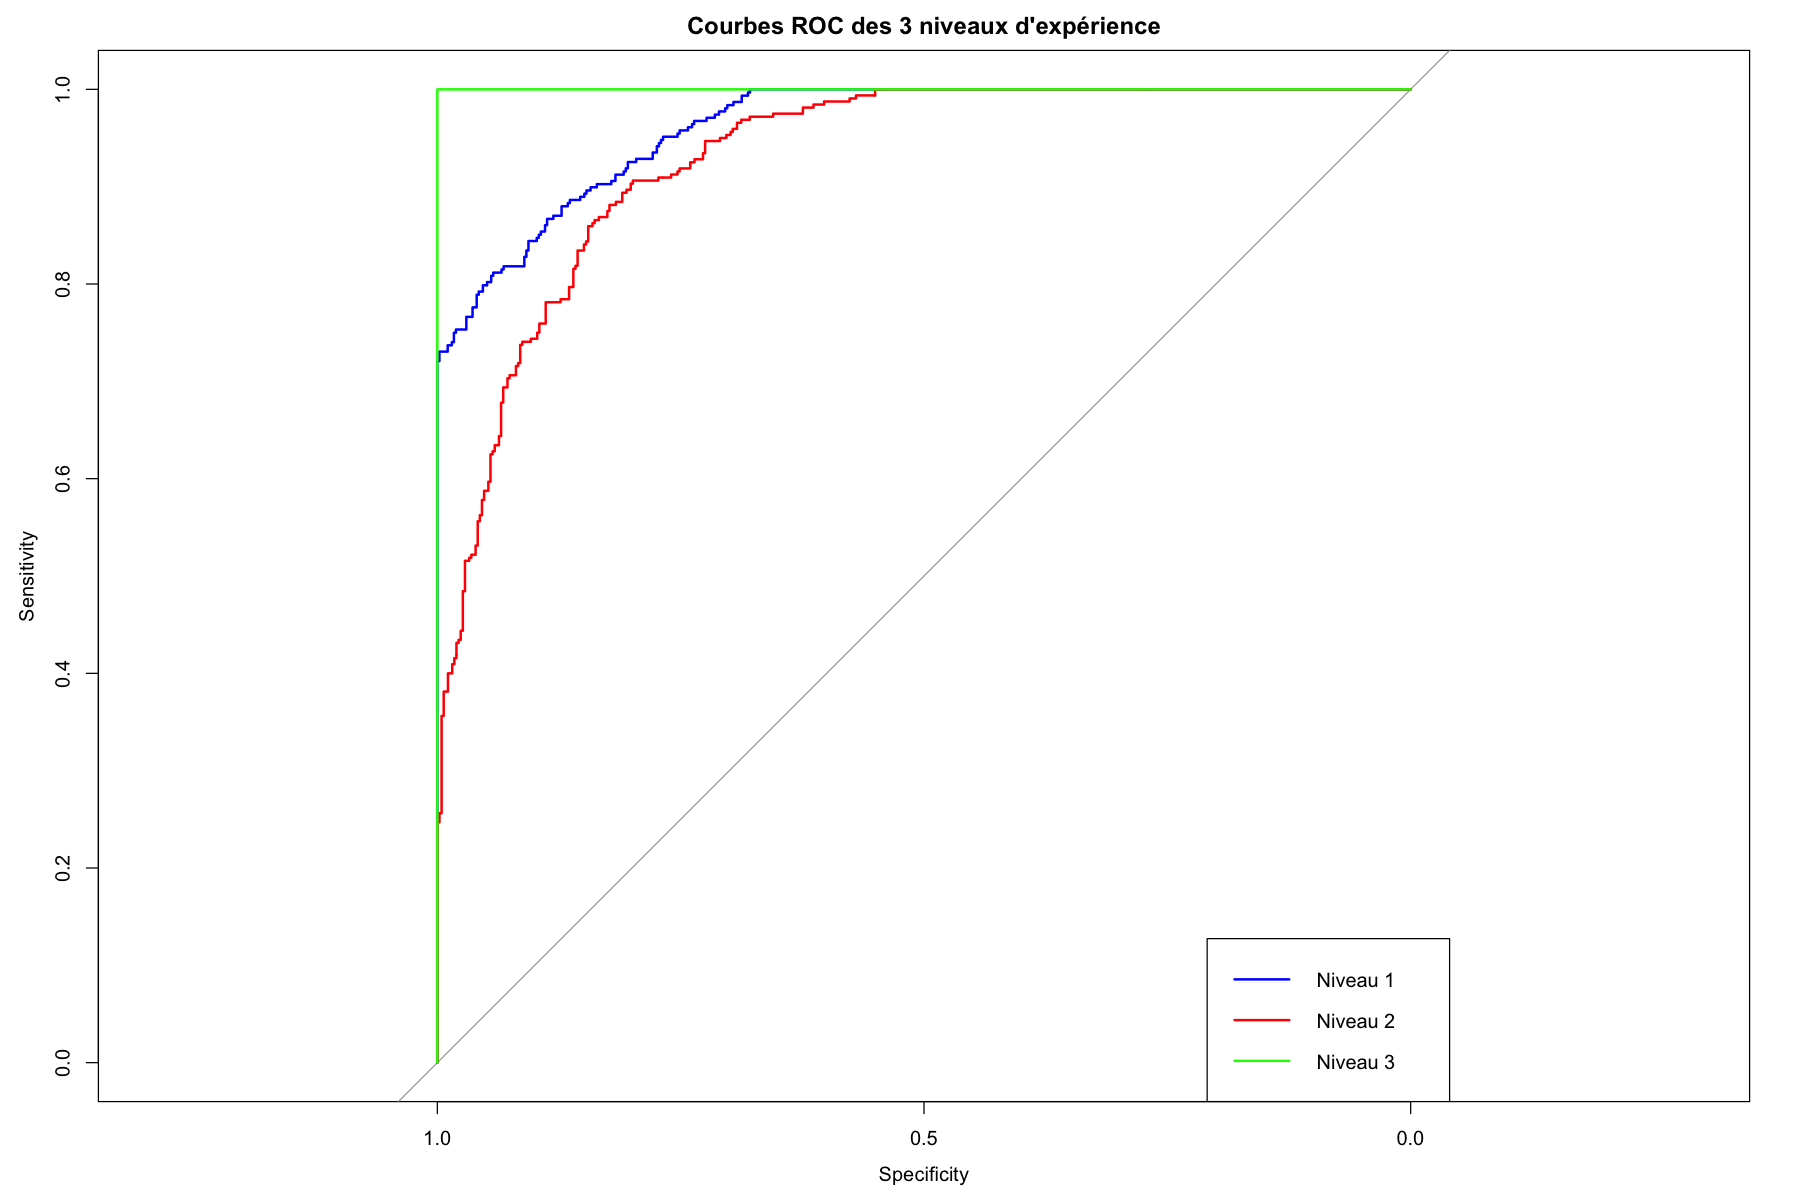

In [243]:
pred1 <- predict(log.lm1, type = "response")
pred2 <- predict(log.lm2, type = "response")
pred3 <- predict(log.lm3, type = "response")

# Les vraies classes
true1 <- datappr1$Experience_Level_1
true2 <- datappr2$Experience_Level_2
true3 <- datappr3$Experience_Level_3

# Calcul des objets ROC
roc1 <- roc(true1, pred1)
roc2 <- roc(true2, pred2)
roc3 <- roc(true3, pred3)

# Tracer les 3 courbes ROC sur un même graphique
plot(roc1, col = "blue", lwd = 2, main = "Courbes ROC des 3 niveaux d'expérience")
plot(roc2, col = "red", lwd = 2, add = TRUE)
plot(roc3, col = "green", lwd = 2, add = TRUE)

legend("bottomright",
       legend = c("Niveau 1", "Niveau 2", "Niveau 3"),
       col = c("blue", "red", "green"),
       lwd = 2)

### LSVM

## SVR/SVM

## Arbre optimal CART

## Forêt aléatoire

## Boosting

## Réseaux de neurones